# MIE1624 Assignment 2 - Salary Prediction

# Francis Cruz - 999539227

### Section Headers: 

#### 0.0. Introduction and Importing Libraries
- 0.1. Importing Libraries

- 1.0. Data Cleaning
- 1.1. Import Dataset
- 1.2. Data Cleaning and Preparation
- 1.2.1. Cleaning Numerical Entries in Dataframe
- 1.2.2. Missing Data Cleaning
- 1.3. Feature Engineering (Countries to Continents)
- 1.4. Encoding Categorical Data

#### 2.0 Exploratory Analysis
- 2.1 Graphical Figures Depicting Trends in the Data
- 2.1.a. Trends on Yearly Salaries vs Continent of Residence and Age
- 2.1.b. Trends on Yearly Salaries vs Education and Years of Experience
- 2.1.c. Trends on Yearly Salaries vs Programming Proficiency
- 2.1. Summary
- 2.2. Feature Importance

#### 3.0. Feature Engineering and Selection
- 3.1. Feature Engineering
- 3.1.a. Continent of Residence
- 3.1.b. Combine Part Questions
- 3.1.c. Target Variable Manipulation (Remove Outliers and SQRT Transform)
- 3.1 d. Scaling Features
- 3.2. Feature Selection
- 3.2.1. Feature Selection: Lasso Regularization
- 3.3. Modifying Dataset with Selected Features
- 3.3.1. Feature Importance of Selected Features
- 3.0 Summary

#### 4.0 Model Implementation
- 4.1. Lasso Linear Regression
- 4.1.1. Model Description, Pros, Cons, and Justification
- 4.1.2. Bias-Variance Trade-off
- 4.2. Gradient Boosting Regression
- 4.2.1. Model Description, Pros, Cons, and Justification
- 4.2.2. Bias-Variance Trade-off
- 4.3. Random Forest Regression
- 4.3.1. Model Description, Pros, Cons, and Justification
- 4.3.2. Bias-Variance Trade-off
- 4.4. Epsilon-Support Vector Regression
- 4.4.1. Model Description, Pros, Cons, and Justification
- 4.4.2. Bias-Variance Trade-off
- 4.5. Comparison

#### 5.0. Model Tuning
- 5.1. Lasso Linear Regression Tuning
- 5.2. Gradient Boosting Regression Tuning
- 5.3. Random Forest Regression Tuning
- 5.4. Epsilon-Support Vector Regression Tuning
- 5.5. Selecting Optimal Model

#### 6.0 Testing & Discussion
- 6.1. Conclusion and Summary

# 0.0 Introduction and Importing Libraries

The objective of this assignment is to solve an income related regresion problem using the provided data set extracted from a Kaggle survey conducted in 2018. Hence, in this assignment, we will look into understanding and exploring employment particularly in the field of data science, as well as to estimate one's salary based on an individual's skills, background, education, etc. 

For the purposes of this assignment, the following machine learning models were used:
- Lasso Linear Regression
- Gradient Boosting Regressor
- Random Forest Regressor
- Suport Vector Machine Regressor

# 0.1 Importing Libraries

In [1]:
# Import Libraries
import seaborn as sns
import numpy as np            
import pandas as pd            
from pandas import read_csv
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 1.0 Data Cleaning

In this section, we will first look into the raw data set to see any issues with the data. Based on our observations, we will proceed to clean the data by either checking the numerical values of certain columns, fill in missing data, or removing columns that are nearly empty.  

## 1.1 Import Dataset

In [2]:
# Import dataset from Kaggle competition
raw_data = pd.read_csv("Kaggle_Salary.csv", header=0) 

C:\Users\cruzfran\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,3,9,11,13,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Take a look at the dataset
raw_data.head(n=5)

Unnamed: 0 Time from Start to Finish (seconds)  \
0           0               Duration (in seconds)   
1           2                                 434   
2           3                                 718   
3           5                                 731   
4           7                                 959   

                                       Q1  \
0  What is your gender? - Selected Choice   
1                                    Male   
2                                  Female   
3                                    Male   
4                                    Male   

                                       Q1_OTHER_TEXT  \
0  What is your gender? - Prefer to self-describe...   
1                                                 -1   
2                                                 -1   
3                                                 -1   
4                                                 -1   

                            Q2                                         Q3  \
0  What is your age (# years)?  In which country do you currently reside?   
1                        30-34                                  Indonesia   
2                        30-34                   United States of America   
3                        22-24                                      India   
4                        35-39                                      Chile   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                  Bachelor’s degree   
2                                    Master’s degree   
3                                    Master’s degree   
4                                    Doctoral degree   

                                                  Q5  \
0  Which best describes your undergraduate major?...   
1                 Engineering (non-computer focused)   
2      Computer science (software engineering, etc.)   
3                          Mathematics or statistics   
4  Information technology, networking, or system ...   

                                                  Q6  \
0  Select the title most similar to your current ...   
1                                              Other   
2                                     Data Scientist   
3                                       Data Analyst   
4                                              Other   

                                       Q6_OTHER_TEXT  ...   \
0  Select the title most similar to your current ...  ...    
1                                                  0  ...    
2                                                 -1  ...    
3                                                 -1  ...    
4                                                  1  ...    

                                          Q50_Part_1  \
0  What barriers prevent you from making your wor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                      Too expensive   

                                          Q50_Part_2  \
0  What barriers prevent you from making your wor...   
1                                                NaN   
2                                 Too time-consuming   
3                                 Too time-consuming   
4                                                NaN   

                                          Q50_Part_3  \
0  What barriers prevent you from making your wor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Q50_Part_4  \
0  What barriers prevent you from making your wor...   
1                                                NaN   
2                                                N

## 1.2 Data Cleaning and Preparation 

Based on the above dataset, the first row contains the question in the Kaggle survey. We will store these questions in case we need this information again. Additionally, there are entries that contain text answers, typically for "Others" questions. For ease of data analysis and to reduce the model complexity by including a count  vectorizer of these words, we will drop these columns and focus on the fixed selections in the survey (i.e. drop down questions, multiple choice, etc.). Text responses in this survey will likely be very different from one another even if CountVectorization was used. Moreover, implementing text features in the model will increase the computational complexity of the model, thus making it difficult to train and test multiple times, particularly when performing k-fold cross validation. 

### Provide insight on why you think missing values are missing and how your approach might impact the overall analysis: 
Missing information in the form of NaNs were seen particularly for questions that required a fixed response (i.e. multiple choice or drop down questions). These missing values appeared when the user did not select this choice as their response in the survey (specific choice did not apply to them). Apart from this instance, NaNs may also appear if the user did not enter any answer to optional questions or even in the provided text boxes in the survey. The answers of fixed selection questions appear as new columns per option. Despite missing values, these values need to be replaced with an integer or fixed categorical variable to be useful for data analysis. When fixing the data is complete, these columns may become useful for the modelling aspect of this problem depending on its feature importance level. Moreover, some missing values were also replaced with the mode of the column. While this is not ideal, it would allow us to have a larger sample set to use to model the data with the assumption that the most common answer would most likely be the answer for those missing values in the same column. 

In [4]:
# Print what are the column names
list(raw_data.columns.values)

['Unnamed: 0',
 'Time from Start to Finish (seconds)',
 'Q1',
 'Q1_OTHER_TEXT',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q6_OTHER_TEXT',
 'Q7',
 'Q7_OTHER_TEXT',
 'Q8',
 'Q9',
 'Q10',
 'Q11_Part_1',
 'Q11_Part_2',
 'Q11_Part_3',
 'Q11_Part_4',
 'Q11_Part_5',
 'Q11_Part_6',
 'Q11_Part_7',
 'Q11_OTHER_TEXT',
 'Q12_MULTIPLE_CHOICE',
 'Q12_Part_1_TEXT',
 'Q12_Part_2_TEXT',
 'Q12_Part_3_TEXT',
 'Q12_Part_4_TEXT',
 'Q12_Part_5_TEXT',
 'Q12_OTHER_TEXT',
 'Q13_Part_1',
 'Q13_Part_2',
 'Q13_Part_3',
 'Q13_Part_4',
 'Q13_Part_5',
 'Q13_Part_6',
 'Q13_Part_7',
 'Q13_Part_8',
 'Q13_Part_9',
 'Q13_Part_10',
 'Q13_Part_11',
 'Q13_Part_12',
 'Q13_Part_13',
 'Q13_Part_14',
 'Q13_Part_15',
 'Q13_OTHER_TEXT',
 'Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q14_OTHER_TEXT',
 'Q15_Part_1',
 'Q15_Part_2',
 'Q15_Part_3',
 'Q15_Part_4',
 'Q15_Part_5',
 'Q15_Part_6',
 'Q15_Part_7',
 'Q15_OTHER_

In [5]:
# Drop entries containing free text
colsToDrop = ['Unnamed: 0',
 'Time from Start to Finish (seconds)',
 'Q1_OTHER_TEXT',
 'Q6_OTHER_TEXT',
 'Q7_OTHER_TEXT',
 'Q11_OTHER_TEXT',
 'Q12_OTHER_TEXT',
 'Q13_OTHER_TEXT',
 'Q14_OTHER_TEXT',
 'Q15_OTHER_TEXT',
 'Q16_OTHER_TEXT',
 'Q17_OTHER_TEXT',
 'Q18_OTHER_TEXT',
 'Q19_OTHER_TEXT',
 'Q20_OTHER_TEXT',
 'Q21_OTHER_TEXT',
 'Q22_OTHER_TEXT',
 'Q27_OTHER_TEXT',
 'Q28_OTHER_TEXT',
 'Q29_OTHER_TEXT',
 'Q30_OTHER_TEXT',
 'Q31_OTHER_TEXT',
 'Q32_OTHER',
 'Q33_OTHER_TEXT',
 'Q34_OTHER_TEXT',
 'Q35_OTHER_TEXT',
 'Q36_OTHER_TEXT',
 'Q37_OTHER_TEXT',
 'Q38_OTHER_TEXT',
 'Q42_OTHER_TEXT',
 'Q49_OTHER_TEXT',
 'Q50_OTHER_TEXT', 
 'index']

raw_data = raw_data.drop(colsToDrop, axis=1)

In [6]:
# Drop first row but keep to properly label columns later
question_column_labels = raw_data.index[0]
raw_data=raw_data.drop(raw_data.index[0])
raw_data=raw_data.reset_index(drop=True)
raw_data.head(5)

Q1     Q2                        Q3                 Q4  \
0    Male  30-34                 Indonesia  Bachelor’s degree   
1  Female  30-34  United States of America    Master’s degree   
2    Male  22-24                     India    Master’s degree   
3    Male  35-39                     Chile    Doctoral degree   
4    Male  18-21                     India    Master’s degree   

                                                  Q5              Q6  \
0                 Engineering (non-computer focused)           Other   
1      Computer science (software engineering, etc.)  Data Scientist   
2                          Mathematics or statistics    Data Analyst   
3  Information technology, networking, or system ...           Other   
4  Information technology, networking, or system ...           Other   

                          Q7     Q8     Q9  \
0  Manufacturing/Fabrication   5-10  18668   
1             I am a student    0-1   2726   
2             I am a student    0-1    682   
3        Academics/Education  10-15  11957   
4                      Other    0-1   2696   

                                                 Q10    ...     Q49_Part_11  \
0                      No (we do not use ML methods)    ...             NaN   
1                                      I do not know    ...             NaN   
2                                      I do not know    ...             NaN   
3                      No (we do not use ML methods)    ...             NaN   
4  We recently started using ML methods (i.e., mo...    ...             NaN   

  Q49_Part_12     Q50_Part_1          Q50_Part_2 Q50_Part_3 Q50_Part_4  \
0         NaN            NaN                 NaN        NaN        NaN   
1         NaN            NaN  Too time-consuming        NaN        NaN   
2         NaN            NaN  Too time-consuming        NaN        NaN   
3         NaN  Too expensive                 NaN        NaN        NaN   
4         NaN            NaN                 NaN        NaN        NaN   

                               Q50_Part_5  \
0                                     NaN   
1                                     NaN   
2  Not enough incentives to share my work   
3                                     NaN   
4  Not enough incentives to share my work   

                                          Q50_Part_6 Q50_Part_7 Q50_Part_8  
0                                                NaN        NaN        NaN  
1                                                NaN        NaN        NaN  
2                                                NaN        NaN        NaN  
3  I had never considered making my work easier f...        NaN        NaN  
4                                                NaN        NaN        NaN  

[5 rows x 364 columns]

In [7]:
# Check data types in each columns
print(raw_data.dtypes)

Q1                     object
Q2                     object
Q3                     object
Q4                     object
Q5                     object
Q6                     object
Q7                     object
Q8                     object
Q9                     object
Q10                    object
Q11_Part_1             object
Q11_Part_2             object
Q11_Part_3             object
Q11_Part_4             object
Q11_Part_5             object
Q11_Part_6             object
Q11_Part_7             object
Q12_MULTIPLE_CHOICE    object
Q12_Part_1_TEXT        object
Q12_Part_2_TEXT        object
Q12_Part_3_TEXT        object
Q12_Part_4_TEXT        object
Q12_Part_5_TEXT        object
Q13_Part_1             object
Q13_Part_2             object
Q13_Part_3             object
Q13_Part_4             object
Q13_Part_5             object
Q13_Part_6             object
Q13_Part_7             object
                        ...  
Q47_Part_8             object
Q47_Part_9             object
Q47_Part_1

## 1.2.1 Cleaning Numerical Entries in Dataframe

By inspecting the dataframe, questions 9, 34, and 35 contain numerical entries but are currently object types. Question 9 contains the salary information, Q34 the percent of time spent in a data science project, and Q35 the percent of time spent in data science training. We will convert these columns into numerical types. 

In [8]:
print(len(raw_data))

15429


In [9]:
# Question 9, 34, and 35 contain numbers but are currently object types
# Question 9 - Salary
# Question 34 - % of time spent in a data science project 
# Question 35 - % of time spent in data science training

for column in raw_data.columns.values:
    if "Q9" in column or "Q34" in column or "Q35" in column:
        raw_data[column] = pd.to_numeric(raw_data[column])
# raw_data['Q9'] = pd.to_numeric(raw_data['Q9'])
raw_data.head()

Q1     Q2                        Q3                 Q4  \
0    Male  30-34                 Indonesia  Bachelor’s degree   
1  Female  30-34  United States of America    Master’s degree   
2    Male  22-24                     India    Master’s degree   
3    Male  35-39                     Chile    Doctoral degree   
4    Male  18-21                     India    Master’s degree   

                                                  Q5              Q6  \
0                 Engineering (non-computer focused)           Other   
1      Computer science (software engineering, etc.)  Data Scientist   
2                          Mathematics or statistics    Data Analyst   
3  Information technology, networking, or system ...           Other   
4  Information technology, networking, or system ...           Other   

                          Q7     Q8     Q9  \
0  Manufacturing/Fabrication   5-10  18668   
1             I am a student    0-1   2726   
2             I am a student    0-1    682   
3        Academics/Education  10-15  11957   
4                      Other    0-1   2696   

                                                 Q10    ...     Q49_Part_11  \
0                      No (we do not use ML methods)    ...             NaN   
1                                      I do not know    ...             NaN   
2                                      I do not know    ...             NaN   
3                      No (we do not use ML methods)    ...             NaN   
4  We recently started using ML methods (i.e., mo...    ...             NaN   

  Q49_Part_12     Q50_Part_1          Q50_Part_2 Q50_Part_3 Q50_Part_4  \
0         NaN            NaN                 NaN        NaN        NaN   
1         NaN            NaN  Too time-consuming        NaN        NaN   
2         NaN            NaN  Too time-consuming        NaN        NaN   
3         NaN  Too expensive                 NaN        NaN        NaN   
4         NaN            NaN                 NaN        NaN        NaN   

                               Q50_Part_5  \
0                                     NaN   
1                                     NaN   
2  Not enough incentives to share my work   
3                                     NaN   
4  Not enough incentives to share my work   

                                          Q50_Part_6 Q50_Part_7 Q50_Part_8  
0                                                NaN        NaN        NaN  
1                                                NaN        NaN        NaN  
2                                                NaN        NaN        NaN  
3  I had never considered making my work easier f...        NaN        NaN  
4                                                NaN        NaN        NaN  

[5 rows x 364 columns]

In [10]:
# Print data types
print(raw_data.dtypes)

Q1                     object
Q2                     object
Q3                     object
Q4                     object
Q5                     object
Q6                     object
Q7                     object
Q8                     object
Q9                      int64
Q10                    object
Q11_Part_1             object
Q11_Part_2             object
Q11_Part_3             object
Q11_Part_4             object
Q11_Part_5             object
Q11_Part_6             object
Q11_Part_7             object
Q12_MULTIPLE_CHOICE    object
Q12_Part_1_TEXT        object
Q12_Part_2_TEXT        object
Q12_Part_3_TEXT        object
Q12_Part_4_TEXT        object
Q12_Part_5_TEXT        object
Q13_Part_1             object
Q13_Part_2             object
Q13_Part_3             object
Q13_Part_4             object
Q13_Part_5             object
Q13_Part_6             object
Q13_Part_7             object
                        ...  
Q47_Part_8             object
Q47_Part_9             object
Q47_Part_1

We need to ensure that all the numerical values in Q34 and Q35 makes sense. We will first look into Q34 to see if all the percentages provided sums to a total of 100%. A similar approach will be performed for Q35. 

In [11]:
# store all current columns pertaining to both Q34 and Q35
Q34_parts = []
Q35_parts = []
for column in raw_data.columns.values:
    if "Q34" in column:
        Q34_parts.append(column)
    elif "Q35" in column:
        Q35_parts.append(column)
    else:
        continue
print(Q34_parts)
print(Q35_parts)

['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6']
['Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6']


In [12]:
# let's add all of the columns for each row pertaining to Q34 and Q35
raw_data['Sum_Q34'] = raw_data[Q34_parts].sum(axis=1)
raw_data['Sum_Q35'] = raw_data[Q35_parts].sum(axis=1)

In [13]:
raw_data

Q1     Q2  \
0                   Male  30-34   
1                 Female  30-34   
2                   Male  22-24   
3                   Male  35-39   
4                   Male  18-21   
5                   Male  30-34   
6                   Male  40-44   
7                   Male  25-29   
8                   Male  25-29   
9                 Female  25-29   
10                  Male  25-29   
11                  Male  40-44   
12                  Male  25-29   
13                  Male  35-39   
14                  Male  55-59   
15                Female  30-34   
16                  Male  30-34   
17                Female  25-29   
18                  Male  30-34   
19                  Male  25-29   
20                  Male  30-34   
21                Female  30-34   
22                Female  40-44   
23                Female  25-29   
24                  Male  30-34   
25                  Male  35-39   
26                Female  25-29   
27                  Male  30-34   
28                  Male  22-24   
29                  Male  30-34   
...                  ...    ...   
15399               Male  35-39   
15400               Male  25-29   
15401               Male  25-29   
15402               Male  18-21   
15403               Male  30-34   
15404             Female  40-44   
15405               Male  35-39   
15406               Male  30-34   
15407             Female  25-29   
15408               Male  30-34   
15409  Prefer not to say  35-39   
15410               Male  25-29   
15411               Male  35-39   
15412               Male  30-34   
15413               Male  25-29   
15414               Male  40-44   
15415               Male  22-24   
15416               Male  25-29   
15417               Male  35-39   
15418               Male  25-29   
15419               Male  18-21   
15420               Male  25-29   
15421               Male  22-24   
15422             Female  22-24   
15423               Male  18-21   
15424               Male  30-34   
15425               Male  22-24   
15426               Male  30-34   
15427               Male  45-49   
15428               Male  22-24   

                                                      Q3  \
0                                              Indonesia   
1                               United States of America   
2                                                  India   
3                                                  Chile   
4                                                  India   
5                                                Hungary   
6                               United States of America   
7                                                 France   
8                               United States of America   
9                                              Argentina   
10                                                 Japan   
11                                              Colombia   
12                                               Nigeria   
13                              United States of America   
14                                                 Spain   
15                                                 Other   
16                              United States of America   
17                          Iran, Islamic Republic of...   
18     United Kingdom of Great Britain and Northern I...   
19                                                Turkey   
20                                                 India   
21                              United States of America   
22                                                Poland   
23                                                 Kenya   
24                                               Denmark   
25                                           Netherlands   
26                                                Sweden   
27                                               Ukraine   
28                                                Canada   
29                                             Aust

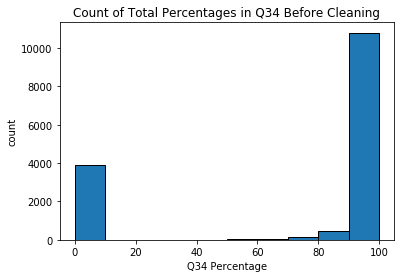

In [14]:
plt.hist(raw_data['Sum_Q34'], edgecolor='black')
plt.title('Count of Total Percentages in Q34 Before Cleaning')
plt.ylabel('count')
plt.xlabel('Q34 Percentage')
plt.show()

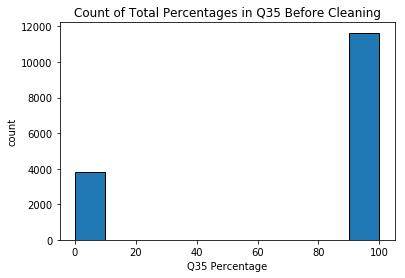

In [15]:
plt.hist(raw_data['Sum_Q35'], edgecolor='black')
plt.title('Count of Total Percentages in Q35 Before Cleaning')
plt.ylabel('count')
plt.xlabel('Q35 Percentage')
plt.show()

We can see that not all of them summed to 100% and some did not even fill in an answer for Q34 and Q35. A potential reason for not having them close to 100% is to due to the optional answers for each question (i.e. 'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT'). Some individuals may enter a value in these columns. However, these columns were dropped as it contained text answers and may complicate the model. Hence, we will renormalize the existing percentages for Q34 and Q35 and drop all rows that contained a sum less than 60%. 

In [16]:
# Drop colums if sum < 60 or is nan
raw_data = raw_data[raw_data['Sum_Q34'] > 60]
raw_data = raw_data[raw_data['Sum_Q35'] > 60]

In [17]:
raw_data

Q1     Q2  \
1                 Female  30-34   
2                   Male  22-24   
3                   Male  35-39   
4                   Male  18-21   
5                   Male  30-34   
6                   Male  40-44   
7                   Male  25-29   
8                   Male  25-29   
9                 Female  25-29   
10                  Male  25-29   
11                  Male  40-44   
12                  Male  25-29   
13                  Male  35-39   
14                  Male  55-59   
15                Female  30-34   
16                  Male  30-34   
17                Female  25-29   
18                  Male  30-34   
19                  Male  25-29   
21                Female  30-34   
22                Female  40-44   
23                Female  25-29   
25                  Male  35-39   
26                Female  25-29   
28                  Male  22-24   
29                  Male  30-34   
30                  Male  22-24   
32                  Male  25-29   
33                  Male  22-24   
34                  Male  30-34   
...                  ...    ...   
15323               Male  30-34   
15325               Male  45-49   
15326             Female  25-29   
15329               Male  30-34   
15332               Male  25-29   
15336               Male  18-21   
15339               Male  50-54   
15349               Male  55-59   
15352               Male  35-39   
15358             Female  18-21   
15359               Male  40-44   
15362               Male  45-49   
15363             Female  25-29   
15367               Male  25-29   
15369               Male  40-44   
15375               Male  25-29   
15378               Male  35-39   
15379               Male  30-34   
15384               Male  25-29   
15387             Female  25-29   
15394               Male  22-24   
15398               Male  22-24   
15403               Male  30-34   
15409  Prefer not to say  35-39   
15410               Male  25-29   
15414               Male  40-44   
15416               Male  25-29   
15417               Male  35-39   
15420               Male  25-29   
15422             Female  22-24   

                                                      Q3  \
1                               United States of America   
2                                                  India   
3                                                  Chile   
4                                                  India   
5                                                Hungary   
6                               United States of America   
7                                                 France   
8                               United States of America   
9                                              Argentina   
10                                                 Japan   
11                                              Colombia   
12                                               Nigeria   
13                              United States of America   
14                                                 Spain   
15                                                 Other   
16                              United States of America   
17                          Iran, Islamic Republic of...   
18     United Kingdom of Great Britain and Northern I...   
19                                                Turkey   
21                              United States of America   
22                                                Poland   
23                                                 Kenya   
25                                           Netherlands   
26                                                Sweden   
28                                                Canada   
29                                             Australia   
30                              United States of America   
32                                                 Japan   
33                                                 Other   
34                                                R

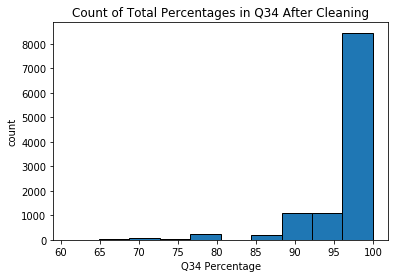

In [18]:
plt.hist(raw_data['Sum_Q34'], edgecolor='black')
plt.title('Count of Total Percentages in Q34 After Cleaning')
plt.ylabel('count')
plt.xlabel('Q34 Percentage')
plt.show()

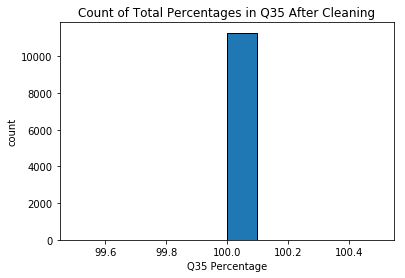

In [19]:
plt.hist(raw_data['Sum_Q35'], edgecolor='black')
plt.title('Count of Total Percentages in Q35 After Cleaning')
plt.ylabel('count')
plt.xlabel('Q35 Percentage')
plt.show()

Now that all of the summed percentages are non-zero and are not NaN, we can renormalize the parts column for both Q34 and Q35 so that adding each of them will result in 100%. 

In [20]:
# print original percentages per part for Q34
raw_data[Q34_parts].head(5)

Q34_Part_1  Q34_Part_2  Q34_Part_3  Q34_Part_4  Q34_Part_5  Q34_Part_6
1         2.0         3.0        20.0        50.0        20.0         0.0
2        10.0        10.0        20.0        10.0        20.0        23.0
3         0.0        30.0        50.0         0.0         0.0        20.0
4        20.0        30.0        20.0        20.0         5.0         5.0
5        55.0        10.0        20.0         5.0         0.0        10.0

In [21]:
# print normalized percentages for Q34
raw_data[Q34_parts] = raw_data[Q34_parts].div(raw_data.Sum_Q34, axis=0)
raw_data[Q34_parts] = raw_data[Q34_parts].multiply(100)
raw_data[Q34_parts].head(5)

Q34_Part_1  Q34_Part_2  Q34_Part_3  Q34_Part_4  Q34_Part_5  Q34_Part_6
1    2.105263    3.157895   21.052632   52.631579   21.052632    0.000000
2   10.752688   10.752688   21.505376   10.752688   21.505376   24.731183
3    0.000000   30.000000   50.000000    0.000000    0.000000   20.000000
4   20.000000   30.000000   20.000000   20.000000    5.000000    5.000000
5   55.000000   10.000000   20.000000    5.000000    0.000000   10.000000

In [22]:
# print original percentages per part for Q35
raw_data[Q35_parts].head(5)

Q35_Part_1  Q35_Part_2  Q35_Part_3  Q35_Part_4  Q35_Part_5  Q35_Part_6
1         0.0         0.0         0.0       100.0         0.0         0.0
2        20.0        40.0        20.0        20.0         0.0         0.0
3        50.0        20.0        30.0         0.0         0.0         0.0
4        75.0         5.0        20.0         0.0         0.0         0.0
5        70.0        30.0         0.0         0.0         0.0         0.0

In [23]:
# print normalized percentages for Q35
raw_data[Q35_parts] = raw_data[Q35_parts].div(raw_data.Sum_Q35, axis=0)
raw_data[Q35_parts] = raw_data[Q35_parts].multiply(100)
raw_data[Q35_parts].head(5)

Q35_Part_1  Q35_Part_2  Q35_Part_3  Q35_Part_4  Q35_Part_5  Q35_Part_6
1         0.0         0.0         0.0       100.0         0.0         0.0
2        20.0        40.0        20.0        20.0         0.0         0.0
3        50.0        20.0        30.0         0.0         0.0         0.0
4        75.0         5.0        20.0         0.0         0.0         0.0
5        70.0        30.0         0.0         0.0         0.0         0.0

We need to double check each of the entries of the parts for Q34 and Q35 to ensure that there were no negative numbers entered. 

In [24]:
raw_data[Q34_parts].describe()

Q34_Part_1    Q34_Part_2    Q34_Part_3    Q34_Part_4    Q34_Part_5  \
count  11288.000000  11288.000000  11288.000000  11288.000000  11288.000000   
mean      17.786180     24.475392     14.272642     21.776692      9.396631   
std       14.771627     15.483446     10.194638     15.231968      9.781835   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       10.000000     11.111111     10.000000     10.000000      0.000000   
50%       14.642857     21.052632     10.526316     20.000000     10.000000   
75%       22.222222     30.000000     20.000000     30.000000     12.500000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

         Q34_Part_6  
count  11288.000000  
mean      12.292463  
std       11.154514  
min        0.000000  
25%        5.000000  
50%       10.000000  
75%       20.000000  
max      100.000000

In [25]:
raw_data[Q35_parts].describe()

Q35_Part_1    Q35_Part_2    Q35_Part_3    Q35_Part_4    Q35_Part_5  \
count  11288.000000  11288.000000  11288.000000  11288.000000  11288.000000   
mean      28.769017     24.207536     18.719141     17.805118      8.696595   
std       25.919578     25.822959     24.149232     25.707398     15.189501   
min        0.000000      0.000000      0.000000      0.000000    -10.000000   
25%       10.000000      0.000000      0.000000      0.000000      0.000000   
50%       20.000000     20.000000     10.000000      2.000000      0.000000   
75%       40.500000     40.000000     30.000000     30.000000     10.000000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

         Q35_Part_6  
count  11288.000000  
mean       1.802593  
std        9.919601  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      100.000000

We can see that there was a negative entry in Q35_Part_5, we will remove this row as it does not contain any reasonable data. 

In [26]:
raw_data = raw_data[raw_data['Q35_Part_5'] >= 0]

In [27]:
raw_data[Q35_parts].describe()

Q35_Part_1    Q35_Part_2    Q35_Part_3    Q35_Part_4    Q35_Part_5  \
count  11287.000000  11287.000000  11287.000000  11287.000000  11287.000000   
mean      28.767136     24.209681     18.719914     17.802265      8.698252   
std       25.919956     25.823097     24.150162     25.706751     15.189155   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       10.000000      0.000000      0.000000      0.000000      0.000000   
50%       20.000000     20.000000     10.000000      2.000000      0.000000   
75%       40.000000     40.000000     30.000000     30.000000     10.000000   
max      100.000000    100.000000    100.000000    100.000000    100.000000   

         Q35_Part_6  
count  11287.000000  
mean       1.802752  
std        9.920026  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      100.000000

In a similar manner, we will perform a quick sanity check on the salary entries in the remaining data set. 

In [28]:
# Print quick statistics on the salary information in the dataset
raw_data['Q9'].describe()

count     11287.000000
mean      52650.419598
std       59671.113849
min           3.000000
25%        9829.500000
50%       34437.000000
75%       75056.000000
max      500000.000000
Name: Q9, dtype: float64

A quick check on the data revealed that someone entered 16 USD as their annual salary! Let's sort through the values by salary to see if other people earned similar amounts and if it seems reasonable. 

In [29]:
salary_check = raw_data.sort_values(by='Q9')
salary_check.head(10)

Q1     Q2        Q3                   Q4  \
12024  Male  22-24    France      Master’s degree   
2026   Male  25-29    Russia    Bachelor’s degree   
6160   Male  22-24   Germany      Master’s degree   
10173  Male  25-29     India      Master’s degree   
625    Male  18-21     India    Bachelor’s degree   
9463   Male  18-21   Germany    Bachelor’s degree   
6760   Male  18-21  Viet Nam    Bachelor’s degree   
5787   Male  25-29     India      Master’s degree   
2589   Male  22-24    Brazil      Master’s degree   
6804   Male  40-44   Ukraine  Professional degree   

                                                      Q5                  Q6  \
12024      Computer science (software engineering, etc.)             Student   
2026                                               Other             Student   
6160                  Engineering (non-computer focused)   Software Engineer   
10173                          Mathematics or statistics       Data Engineer   
625    A business discipline (accounting, economics, ...        Data Analyst   
9463                  Engineering (non-computer focused)  Research Assistant   
6760                                               Other             Student   
5787       Computer science (software engineering, etc.)      Data Scientist   
2589       Computer science (software engineering, etc.)  Research Assistant   
6804       Computer science (software engineering, etc.)  Research Scientist   

                                           Q7     Q8  Q9  \
12024                          I am a student    3-4   3   
2026                           I am a student    0-1   5   
6160                           I am a student    2-3   7   
10173                    Computers/Technology    1-2   9   
625                      Computers/Technology    0-1  10   
9463                            Energy/Mining    1-2  13   
6760                           I am a student    3-4  14   
5787   Online Service/Internet-based Services    0-1  14   
2589                      Academics/Education    2-3  16   
6804                      Academics/Education  10-15  19   

                                                     Q10   ...    \
12024                      No (we do not use ML methods)   ...     
2026                                       I do not know   ...     
6160   We recently started using ML methods (i.e., mo...   ...     
10173  We are exploring ML methods (and may one day p...   ...     
625                        No (we do not use ML methods)   ...     
9463   We recently started using ML methods (i.e., mo...   ...     
6760                       No (we do not use ML methods)   ...     
5787   We recently started using ML methods (i.e., mo...   ...     
2589   We have well established ML methods (i.e., mod...   ...     
6804                                       I do not know   ...     

          Q50_Part_1          Q50_Part_2  \
12024            NaN                 NaN   
2026             NaN                 NaN   
6160             NaN  Too time-consuming   
10173            NaN                 NaN   
625              NaN                 NaN   
9463             NaN                 NaN   
6760             NaN  Too time-consuming   
5787             NaN  Too time-consuming   
2589             NaN                 NaN   
6804   Too expensive                 NaN   

                                  Q50_Part_3  \
12024                                    NaN   
2026                                     NaN   
6160   Requires too much technical knowledge   
10173                                    NaN   
625                                      NaN   
9463                                     NaN   
6760   Requires too much technical knowledge   
5787                                     NaN   
2589                                     NaN   
6804                                     NaN   

                                              Q50_Part_4  \
12024                                                NaN   


A quick look showed that some individuals earned significantly less especially for those who reside in India, Brazil, China, etc. Some of these entries are unreasonable as an individual in the US only earned USD 25 for the entire year. Let's plot a histogram of salaries for those who earned less than USD 1000. 

In [30]:
salary_check = salary_check[salary_check['Q9'] < 1000]

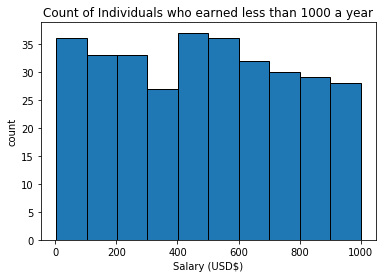

In [31]:
plt.hist(salary_check['Q9'], edgecolor='black')
plt.title('Count of Individuals who earned less than 1000 a year')
plt.ylabel('count')
plt.xlabel('Salary (USD$)')
plt.show()

While a smaller salary is expected for those living in developing countries, there are some outliers as indicated in the dataframe above (for those who live in the US and only earned $25). Hence, some entries such as salaries less than 500 dollars a year is unreasonable. We will remove these entries in the original dataset. 

In [32]:
raw_data = raw_data[raw_data['Q9'] > 500]
raw_data.describe()

Q9    Q34_Part_1    Q34_Part_2    Q34_Part_3    Q34_Part_4  \
count   11121.000000  11121.000000  11121.000000  11121.000000  11121.000000   
mean    53432.612445     17.768169     24.529052     14.247892     21.750484   
std     59767.807114     14.753754     15.510240     10.149078     15.230626   
min       504.000000      0.000000      0.000000      0.000000      0.000000   
25%     10583.000000     10.000000     11.111111     10.000000     10.000000   
50%     35472.000000     14.285714     21.052632     10.526316     20.000000   
75%     75934.000000     22.222222     30.612245     20.000000     30.000000   
max    500000.000000    100.000000    100.000000    100.000000    100.000000   

         Q34_Part_5    Q34_Part_6    Q35_Part_1   Q35_Part_2    Q35_Part_3  \
count  11121.000000  11121.000000  11121.000000  11121.00000  11121.000000   
mean       9.380593     12.323810     28.726164     24.16884     18.816443   
std        9.791521     11.176517     25.926525     25.77294     24.177614   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        0.000000      5.000000     10.000000      0.00000      0.000000   
50%       10.000000     10.000000     20.000000     20.00000     10.000000   
75%       12.500000     20.000000     40.000000     40.00000     30.000000   
max      100.000000    100.000000    100.000000    100.00000    100.000000   

         Q35_Part_4    Q35_Part_5    Q35_Part_6       Sum_Q34  Sum_Q35  
count  11121.000000  11121.000000  11121.000000  11121.000000  11121.0  
mean      17.798414      8.706471      1.783667     97.414622    100.0  
std       25.729225     15.210046      9.863884      5.446092      0.0  
min        0.000000      0.000000      0.000000     61.000000    100.0  
25%        0.000000      0.000000      0.000000     97.000000    100.0  
50%        1.000000      0.000000      0.000000    100.000000    100.0  
75%       30.000000     10.000000      0.000000    100.000000    100.0  
max      100.000000    100.000000    100.000000    100.000000    100.0

In [33]:
# lets drop the Sum_Q34 and Sum_Q35 columns as they are no longer needed. 
raw_data = raw_data.drop(['Sum_Q34', 'Sum_Q35'], axis=1)

In [34]:
# print remaining rows in the dataframe
len(raw_data)

11121

We are now ready to proceed with dealing with missing data, particularly in the categorical data columns. 

## 1.2.2 Missing Data Cleaning

In this section, we address the issue of missing data. Following the assignment's recommendation, we will use the mode of each column to fill the missing data. While this is not ideal, it is one method to address missing data by filling these voids will data that is common with the dataset. Doing so presents some inaccuracies but is required to have a sufficently high number of samples to train our models. 

In [35]:
# Determine which columns (i.e. questions) contain missing data
missing_data = raw_data.isnull().sum(axis=0)
missing_data[missing_data > 0]

Q5                61
Q8                51
Q11_Part_1      4947
Q11_Part_2      7588
Q11_Part_3      7707
Q11_Part_4      6273
Q11_Part_5      8227
Q11_Part_6      9574
Q11_Part_7     10680
Q13_Part_1      2479
Q13_Part_2      5653
Q13_Part_3      6807
Q13_Part_4      8129
Q13_Part_5     11029
Q13_Part_6      8670
Q13_Part_7      7911
Q13_Part_8      8274
Q13_Part_9      6462
Q13_Part_10     7441
Q13_Part_11     8408
Q13_Part_12     9066
Q13_Part_13     7844
Q13_Part_14    10977
Q13_Part_15    10366
Q14_Part_1      7410
Q14_Part_2      8933
Q14_Part_3     10309
Q14_Part_4     11034
Q14_Part_5     10336
Q14_Part_6     10816
               ...  
Q47_Part_8      5422
Q47_Part_9      8407
Q47_Part_10     8778
Q47_Part_11    10381
Q47_Part_12    10725
Q47_Part_13    10540
Q47_Part_14     9812
Q47_Part_15    10951
Q47_Part_16    11023
Q48             1491
Q49_Part_1      6867
Q49_Part_2      7740
Q49_Part_3      9013
Q49_Part_4      9036
Q49_Part_5     10032
Q49_Part_6      5033
Q49_Part_7   

If a column has more than 95% missing data, then this column does not present any useful information. Hence, this column is dropped. 

In [36]:
# type(missing_data)
colsToDrop = []
for index, value in missing_data.items():
    if value > 0.95*len(raw_data):
        colsToDrop.append(index)

In [37]:
# if the column had 95% of its entries with missing data, then drop the column
raw_data = raw_data.drop(colsToDrop, axis=1)

Multiple questions contained parts. Hence, we can create dummies to represent answers based on the number of unique available answers per question. This will aid in filling missing information, particularly for the fixed selection questions (as indicated before).  

In [38]:
# Create dummies for "Part" Questions
for column in raw_data.columns.values:
    num_unique_options = len(raw_data[column].unique())
    
    if "Part" in column:
        if num_unique_options <= 1:
            raw_data[column] = 0
        else:
            raw_data[column] = pd.get_dummies(raw_data[column])

In [39]:
# After creating dummy variables, print any other missing information columns
missing_data = raw_data.isnull().sum(axis=0)
missing_data[missing_data > 0]

Q5       61
Q8       51
Q17    1877
Q20    2701
Q22    3064
Q32    1705
Q37    4102
Q40     402
Q43    1636
Q46    1492
Q48    1491
dtype: int64

In [40]:
# A brief desciption of these questions are listed below: 
# Questions that containing missing information: 
# Question 5 asks about undergraduate major
# Question 8 asks about years of experience
# Question 17 programming language (cat)
# Question 18 recommended programming language to beginners (cat)
# Question 20 ML language used the most (cat)
# Q22 which data visualization do you use the most (cat)
# Q32 What type of data do you use (cat)
# Q37 Online platform (cat)
# Q40 Which better demonstrates experistise in data sci 
# Q43 Approx what tme of your projects involve exploring bias
# Q46 Approx what tme of your projects involve exploring insights
# Q48 Do you consider ML as blackboxes

In [41]:
# Fill missing information with modes instead. 
def fillNaNwithMode(dataframe, column):
    dataframe[column].fillna(dataframe[column].mode()[0],inplace=True)
    return dataframe

In [42]:
for element in np.arange(len(missing_data)):
    raw_data = fillNaNwithMode(raw_data, missing_data.index[element])

In [43]:
# Check if we still have any missing information: 
missing_data = raw_data.isnull().sum(axis=0)
missing_data[missing_data > 0]

Series([], dtype: int64)

No more missing information! 

In [44]:
raw_data.head(5)

Q1     Q2                        Q3               Q4  \
1  Female  30-34  United States of America  Master’s degree   
2    Male  22-24                     India  Master’s degree   
3    Male  35-39                     Chile  Doctoral degree   
4    Male  18-21                     India  Master’s degree   
5    Male  30-34                   Hungary  Master’s degree   

                                                  Q5                 Q6  \
1      Computer science (software engineering, etc.)     Data Scientist   
2                          Mathematics or statistics       Data Analyst   
3  Information technology, networking, or system ...              Other   
4  Information technology, networking, or system ...              Other   
5                 Engineering (non-computer focused)  Software Engineer   

                                       Q7     Q8     Q9  \
1                          I am a student    0-1   2726   
2                          I am a student    0-1    682   
3                     Academics/Education  10-15  11957   
4                                   Other    0-1   2696   
5  Online Service/Internet-based Services    3-4  21152   

                                                 Q10     ...      Q49_Part_9  \
1                                      I do not know     ...               0   
2                                      I do not know     ...               1   
3                      No (we do not use ML methods)     ...               0   
4  We recently started using ML methods (i.e., mo...     ...               1   
5  We have well established ML methods (i.e., mod...     ...               0   

   Q49_Part_10  Q49_Part_11  Q50_Part_1  Q50_Part_2  Q50_Part_3 Q50_Part_4  \
1            1            0           0           1           0          0   
2            0            0           0           1           0          0   
3            0            0           1           0           0          0   
4            0            0           0           0           0          0   
5            1            0           0           1           0          1   

   Q50_Part_5  Q50_Part_6  Q50_Part_7  
1           0           0           0  
2           1           0           0  
3           0           1           0  
4           1           0           0  
5           0           0           0  

[5 rows x 229 columns]

Noticeably, a lot of the entries in the data set contain categorical data. Thus, we need to use an encoder to convert text data into numbers, which predictive models can better understand. We will be encoding these categorical data after the following subsection. 

## 1.3 Feature Engineering (Countries to Continents)

Prior to encoding, a particular column of interest is Q3 - indicating the country of residence of the user. There are multiple unique countries listed in this column. To aid with this analysis, these countries were converted to continents of residence to reduce the unique entries in these columns. Feature Engineering was performed in this step prior to section 3.0 as performing the following tasks here will aid with visualization in the Exploratory Analysis in section 2.0.  

Entries such as "other" or "I do not wish to disclose my location" do not help with the model analysis. Hence, these rows were dropped. 

In [45]:
# Remove no useful information Q3 data
raw_data = raw_data[raw_data['Q3'] != 'Other']
raw_data = raw_data[raw_data['Q3'] != 'I do not wish to disclose my location']

In [46]:
# Country Dictionary Mapping to Continet
country_dict = {
 'United States of America':'North America',
 'India':'Asia',
 'Chile':'South America',
 'Hungary':'Europe',
 'France':'Europe',
 'Argentina':'South America',
 'Japan':'Asia',
 'Colombia':'South America',
 'Nigeria':'Africa',
 'Spain':'Europe',
 'Iran, Islamic Republic of...': 'Middle East',
 'United Kingdom of Great Britain and Northern Ireland': 'Europe',
 'Turkey': 'Middle East',
 'Poland':'Europe',
 'Kenya':'Africa',
 'Denmark':'Europe',
 'Netherlands':'Europe',
 'Sweden':'Europe',
 'Ukraine':'Europe',
 'Canada': 'North America',
 'Australia': 'Oceania',
 'Russia':'Europe',
 'Italy':'Europe',
 'Mexico':'North America',
 'Germany':'Europe',
 'Singapore':'Asia',
 'Indonesia':'Asia',
 'Brazil': 'South America',
 'China':'Asia',
 'South Africa':'Africa',
 'South Korea':'Asia',
 'Malaysia':'Asia',
 'Hong Kong (S.A.R.)':'Asia',
 'Portugal':'Europe',
 'Thailand':'Asia',
 'Morocco':'Africa',
 'Pakistan':'Asia',
 'Tunisia':'Africa',
 'Ireland':'Europe',
 'Israel': 'Middle East',
 'Switzerland':'Europe',
 'Bangladesh':'Asia',
 'Romania':'Europe',
 'Austria':'Europe',
 'Belarus':'Europe',
 'Viet Nam':'Asia',
 'Czech Republic':'Europe',
 'Philippines':'Asia',
 'Belgium':'Europe',
 'New Zealand':'Oceania',
 'Norway':'Europe',
 'Finland':'Europe',
 'Egypt':'Africa',
 'Greece':'Europe',
 'Peru': 'South America',
 'Republic of Korea':'Asia'
}

In [47]:
# Add continent to raw data dataframe
raw_data['Continent'] = raw_data['Q3'].replace(country_dict)

In [48]:
raw_data['Continent'].unique()

array(['North America', 'Asia', 'South America', 'Europe', 'Africa',
       'Middle East', 'Oceania'], dtype=object)

In [49]:
# Save a copy of the dataframe that contains text entries
raw_data_text = raw_data.copy()
raw_data_text.head(5)

Q1     Q2                        Q3               Q4  \
1  Female  30-34  United States of America  Master’s degree   
2    Male  22-24                     India  Master’s degree   
3    Male  35-39                     Chile  Doctoral degree   
4    Male  18-21                     India  Master’s degree   
5    Male  30-34                   Hungary  Master’s degree   

                                                  Q5                 Q6  \
1      Computer science (software engineering, etc.)     Data Scientist   
2                          Mathematics or statistics       Data Analyst   
3  Information technology, networking, or system ...              Other   
4  Information technology, networking, or system ...              Other   
5                 Engineering (non-computer focused)  Software Engineer   

                                       Q7     Q8     Q9  \
1                          I am a student    0-1   2726   
2                          I am a student    0-1    682   
3                     Academics/Education  10-15  11957   
4                                   Other    0-1   2696   
5  Online Service/Internet-based Services    3-4  21152   

                                                 Q10      ...        \
1                                      I do not know      ...         
2                                      I do not know      ...         
3                      No (we do not use ML methods)      ...         
4  We recently started using ML methods (i.e., mo...      ...         
5  We have well established ML methods (i.e., mod...      ...         

   Q49_Part_10  Q49_Part_11  Q50_Part_1  Q50_Part_2  Q50_Part_3  Q50_Part_4  \
1            1            0           0           1           0           0   
2            0            0           0           1           0           0   
3            0            0           1           0           0           0   
4            0            0           0           0           0           0   
5            1            0           0           1           0           1   

  Q50_Part_5  Q50_Part_6  Q50_Part_7      Continent  
1          0           0           0  North America  
2          1           0           0           Asia  
3          0           1           0  South America  
4          1           0           0           Asia  
5          0           0           0         Europe  

[5 rows x 230 columns]

# 1.4 Encoding Categorical Data

As previously mentioned, the dataframe above contains multiple categorical data which needs to be converted to text to be properly used with predictive models. 

There are two main types of encoders that can be used: Label Encoder and One Hot Encoding. 
- Label Encoding - will convert catrgorical data into numerical data representing each unique categorical answer. 
- One Hot Encoding - will take a column which has been label encoded and split it into multiple columns and replacing each with 1s and 0s depending on what the column may have. 

One Hot Encoding is preferred for predictive methods as label encoding alone may confuse the model. Since there could be different numbers in the same column after label encoding, the model may potentially misunderstand the data to be in some kind of order or hierarchy (i.e. 0 < 1 <2). One can use one hot encoding to create a separate column to avoid this confusion. However, the drawback to this would be the increase in columns (i.e. features of the model). Both types of encoding were utilized in this assignment. 

In this code, columns pertaining to age (Q2), continent of residence from feature engineering, education (Q4), undergraduate major (Q5) and job title (Q6) should be one hot encoded while the rest of the cateogorical data should be label encoded. The aforementioned questions to be one hot encoded should not be left label encoded as there may be an induced hierarchy/order as previously mentioned. 

In [50]:
cleaned_encoded_data = raw_data_text.copy()

In [51]:
cleaned_encoded_data.head(5)

Q1     Q2                        Q3               Q4  \
1  Female  30-34  United States of America  Master’s degree   
2    Male  22-24                     India  Master’s degree   
3    Male  35-39                     Chile  Doctoral degree   
4    Male  18-21                     India  Master’s degree   
5    Male  30-34                   Hungary  Master’s degree   

                                                  Q5                 Q6  \
1      Computer science (software engineering, etc.)     Data Scientist   
2                          Mathematics or statistics       Data Analyst   
3  Information technology, networking, or system ...              Other   
4  Information technology, networking, or system ...              Other   
5                 Engineering (non-computer focused)  Software Engineer   

                                       Q7     Q8     Q9  \
1                          I am a student    0-1   2726   
2                          I am a student    0-1    682   
3                     Academics/Education  10-15  11957   
4                                   Other    0-1   2696   
5  Online Service/Internet-based Services    3-4  21152   

                                                 Q10      ...        \
1                                      I do not know      ...         
2                                      I do not know      ...         
3                      No (we do not use ML methods)      ...         
4  We recently started using ML methods (i.e., mo...      ...         
5  We have well established ML methods (i.e., mod...      ...         

   Q49_Part_10  Q49_Part_11  Q50_Part_1  Q50_Part_2  Q50_Part_3  Q50_Part_4  \
1            1            0           0           1           0           0   
2            0            0           0           1           0           0   
3            0            0           1           0           0           0   
4            0            0           0           0           0           0   
5            1            0           0           1           0           1   

  Q50_Part_5  Q50_Part_6  Q50_Part_7      Continent  
1          0           0           0  North America  
2          1           0           0           Asia  
3          0           1           0  South America  
4          1           0           0           Asia  
5          0           0           0         Europe  

[5 rows x 230 columns]

By glancing over potential answers in some of the critical and base questions (handpicked in the context of this assignment) Q2, Q4, Q5, Q6, Q12, and Q17, it is observed that some of the answers did not provide any beneficial information. Hence, answers such as 'Other', 'I prefer not to answer', 'I never declared a major' will be dropped from the data set. The changes made to cleaned_encoded_data will also be applied to raw_data_text. 

In [52]:
print('Q2')
print(raw_data['Q2'].unique())
print('Q4')
print(raw_data['Q4'].unique())
print('Q5')
print(raw_data['Q5'].unique())
print('Q6')
print(raw_data['Q6'].unique())
print('Q12_MULTIPLE_CHOICE')
print(raw_data['Q12_MULTIPLE_CHOICE'].unique())
print('Q17')
print(raw_data['Q17'].unique())

Q2
['30-34' '22-24' '35-39' '18-21' '40-44' '25-29' '55-59' '60-69' '45-49'
 '50-54' '80+' '70-79']
Q4
['Master’s degree' 'Doctoral degree' 'Bachelor’s degree'
 'Professional degree'
 'Some college/university study without earning a bachelor’s degree'
 'I prefer not to answer' 'No formal education past high school']
Q5
['Computer science (software engineering, etc.)'
 'Mathematics or statistics'
 'Information technology, networking, or system administration'
 'Engineering (non-computer focused)'
 'A business discipline (accounting, economics, finance, etc.)'
 'Environmental science or geology'
 'Medical or life sciences (biology, chemistry, medicine, etc.)'
 'I never declared a major' 'Other' 'Physics or astronomy'
 'Social sciences (anthropology, psychology, sociology, etc.)'
 'Humanities (history, literature, philosophy, etc.)'
 'Fine arts or performing arts']
Q6
['Data Scientist' 'Data Analyst' 'Other' 'Software Engineer' 'Student'
 'Research Assistant' 'Manager' 'Research Scientist

In [53]:
# Remove no information rows (i.e. "Other" entries) in Q2, Q5, Q6, Q12, Q17, Q4
cleaned_encoded_data = cleaned_encoded_data[raw_data['Q2'] != 'Other']
cleaned_encoded_data = cleaned_encoded_data[raw_data['Q4'] != 'I prefer not to answer']
cleaned_encoded_data = cleaned_encoded_data[raw_data['Q5'] != 'I never declared a major']
cleaned_encoded_data = cleaned_encoded_data[raw_data['Q5'] != 'Other']
cleaned_encoded_data = cleaned_encoded_data[raw_data['Q6'] != 'Other']
cleaned_encoded_data = cleaned_encoded_data[raw_data['Q12_MULTIPLE_CHOICE'] != 'Other']
cleaned_encoded_data = cleaned_encoded_data[raw_data['Q17'] != 'Other']
print(cleaned_encoded_data.shape)

(8746, 230)


C:\Users\cruzfran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\cruzfran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\cruzfran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\cruzfran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\cruzfran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [54]:
raw_data_text = cleaned_encoded_data.copy()

In [55]:
# OneHotEncode Q2
one_hot_Q2 = pd.get_dummies(cleaned_encoded_data['Q2'])
cleaned_encoded_data = cleaned_encoded_data.drop('Q2', axis=1)
cleaned_encoded_data = cleaned_encoded_data.join(one_hot_Q2)

In [56]:
# OneHotEncode continents
one_hot_Continent = pd.get_dummies(cleaned_encoded_data['Continent'])
cleaned_encoded_data = cleaned_encoded_data.drop('Continent', axis=1)
cleaned_encoded_data = cleaned_encoded_data.join(one_hot_Continent)

In [57]:
# OneHotEncode Q5
one_hot_Q5 = pd.get_dummies(cleaned_encoded_data['Q5'])
cleaned_encoded_data = cleaned_encoded_data.drop('Q5', axis=1)
cleaned_encoded_data = cleaned_encoded_data.join(one_hot_Q5)

In [58]:
# OneHotEncode Q6
one_hot_Q6 = pd.get_dummies(cleaned_encoded_data['Q6'])
cleaned_encoded_data = cleaned_encoded_data.drop('Q6', axis=1)
cleaned_encoded_data = cleaned_encoded_data.join(one_hot_Q6)

In [59]:
cleaned_encoded_data.head(5)

Q1                        Q3               Q4  \
1  Female  United States of America  Master’s degree   
2    Male                     India  Master’s degree   
5    Male                   Hungary  Master’s degree   
6    Male  United States of America  Master’s degree   
7    Male                    France  Doctoral degree   

                                       Q7    Q8      Q9  \
1                          I am a student   0-1    2726   
2                          I am a student   0-1     682   
5  Online Service/Internet-based Services   3-4   21152   
6                                   Other  5-10  132826   
7                          I am a student   0-1   38246   

                                                 Q10  Q11_Part_1  Q11_Part_2  \
1                                      I do not know           1           0   
2                                      I do not know           0           0   
5  We have well established ML methods (i.e., mod...           0           1   
6  We recently started using ML methods (i.e., mo...           0           1   
7  We have well established ML methods (i.e., mod...           0           0   

   Q11_Part_3   ...     Manager  Marketing Analyst  Principal Investigator  \
1           0   ...           0                  0                       0   
2           0   ...           0                  0                       0   
5           1   ...           0                  0                       0   
6           0   ...           0                  0                       0   
7           0   ...           0                  0                       0   

  Product/Project Manager  Research Assistant  Research Scientist  \
1                       0                   0                   0   
2                       0                   0                   0   
5                       0                   0                   0   
6                       0                   0                   0   
7                       0                   0                   0   

   Salesperson  Software Engineer  Statistician  Student  
1            0                  0             0        0  
2            0                  0             0        0  
5            0                  1             0        0  
6            0                  0             0        0  
7            0                  0             0        1  

[5 rows x 275 columns]

In [60]:
cleaned_encoded_data.dtypes

Q1                                                               object
Q3                                                               object
Q4                                                               object
Q7                                                               object
Q8                                                               object
Q9                                                                int64
Q10                                                              object
Q11_Part_1                                                        uint8
Q11_Part_2                                                        uint8
Q11_Part_3                                                        uint8
Q11_Part_4                                                        uint8
Q11_Part_5                                                        uint8
Q11_Part_6                                                        uint8
Q12_MULTIPLE_CHOICE                                             

In [61]:
# Encode categorical data using label encoder
encoder = LabelEncoder()
for column in cleaned_encoded_data.columns:
    if cleaned_encoded_data[column].dtypes == 'object':
        data = cleaned_encoded_data[column]
        encoder.fit(data.values)
        cleaned_encoded_data[column] = encoder.transform(cleaned_encoded_data[column])
cleaned_encoded_data = cleaned_encoded_data # update table

In [62]:
cleaned_encoded_data.head(5)

Q1  Q3  Q4  Q7  Q8      Q9  Q10  Q11_Part_1  Q11_Part_2  Q11_Part_3  \
1   0  54   2   7   0    2726    0           1           0           0   
2   1  20   2   7   0     682    0           0           0           0   
5   1  19   2  15   7   21152    3           0           1           1   
6   1  54   2  16  10  132826    4           0           1           0   
7   1  15   1   7   0   38246    3           0           0           0   

    ...     Manager  Marketing Analyst  Principal Investigator  \
1   ...           0                  0                       0   
2   ...           0                  0                       0   
5   ...           0                  0                       0   
6   ...           0                  0                       0   
7   ...           0                  0                       0   

   Product/Project Manager  Research Assistant  Research Scientist  \
1                        0                   0                   0   
2                        0                   0                   0   
5                        0                   0                   0   
6                        0                   0                   0   
7                        0                   0                   0   

   Salesperson  Software Engineer  Statistician  Student  
1            0                  0             0        0  
2            0                  0             0        0  
5            0                  1             0        0  
6            0                  0             0        0  
7            0                  0             0        1  

[5 rows x 275 columns]

In [63]:
# Check if there's any column that contains purely zeros and remove it
cleaned_encoded_data = cleaned_encoded_data.loc[:, (cleaned_encoded_data != 0).any(axis=0)]
raw_data_text = raw_data_text.loc[:, (raw_data_text != 0).any(axis=0)]
len(cleaned_encoded_data.columns)

275

From the cleaning, there are 275 columns remaining with the cleaned data set named cleaned_encoded_data. Furthermore, the text version of this data set prior to encoding is called raw_data_text. Two version of the data set are kept as the latter makes it easier to plot the dataframe for the exploratory analysis section of this notebook. 

In [64]:
cleaned_encoded_data.head(5)

Q1  Q3  Q4  Q7  Q8      Q9  Q10  Q11_Part_1  Q11_Part_2  Q11_Part_3  \
1   0  54   2   7   0    2726    0           1           0           0   
2   1  20   2   7   0     682    0           0           0           0   
5   1  19   2  15   7   21152    3           0           1           1   
6   1  54   2  16  10  132826    4           0           1           0   
7   1  15   1   7   0   38246    3           0           0           0   

    ...     Manager  Marketing Analyst  Principal Investigator  \
1   ...           0                  0                       0   
2   ...           0                  0                       0   
5   ...           0                  0                       0   
6   ...           0                  0                       0   
7   ...           0                  0                       0   

   Product/Project Manager  Research Assistant  Research Scientist  \
1                        0                   0                   0   
2                        0                   0                   0   
5                        0                   0                   0   
6                        0                   0                   0   
7                        0                   0                   0   

   Salesperson  Software Engineer  Statistician  Student  
1            0                  0             0        0  
2            0                  0             0        0  
5            0                  1             0        0  
6            0                  0             0        0  
7            0                  0             0        1  

[5 rows x 275 columns]

# 2.0 Exploratory Analysis

This section is split mainly into two main parts. The first will present graphical figures that represent trends in the dataset. This will visually aid in determining trends between certain features available in the dataset with respect to the yearly salary of the individual. The second will show a visualization of feature importance using a correlation matrix. Because feature engineering will not be completed by this section, the correlation matrix will be large. Hence, the visualized heat map of the correlation matrix will not be quite clear. To aid with this, only the correlations between the salary and rest of the features were presented and ranked. Moreover, apart from the correlation matrix, a decision tree feature importance attribute was also presented to aid with the visualization of feature importance of this dataset. 

## 2.1 Graphical Figures Depicting Trends in the Data

To aid with visualization, the raw_data_text dataframe was used to easily filter out certain data from the dataframe. The cleaned_encoded_data is an encoded representation of the raw_data_text dataframe. For this section, we will present three main graphical figures and a few supporting figures to delve into greater detail from the main plots. 
- a) Trends on Annual Salaries vs Continent of Residence and Age
- b) Trends on Yearly Salaries vs Education and Years of Experience
- c) Trends on Yearly Salaries vs Programming Proficiencies and Skills

### 2.1a) Trends on Yearly Salaries vs Continent of Residence and Age

In this section, we will look into trends of salary with respect to continent of residence and age. This will provide any relationship or proportionality with respect to these variables. It is expected that developed countries in North America/Europe/Oceania would earn more than their counterparts in Asia. Moreover, individuals who are older may have more years of experience and hence, may also earn more money. 

In [65]:
# Use raw_data_text dataframe, which contains the pre-encoded data to easily sort through the continents
country_list = raw_data_text['Continent'].unique()

In [66]:
np.mean(raw_data_text['Q9'])

54310.821861422366

In [67]:
# Count and calculate average salary based on continent of residence
count_continent = []
mean_annual_salary_continent = []

for continent in country_list:
    count_continent.append(raw_data_text[raw_data_text['Continent'] == continent].describe()['Q9']['count'])
    mean_annual_salary_continent.append(raw_data_text[raw_data_text['Continent'] == continent].describe()['Q9']['mean'])
    

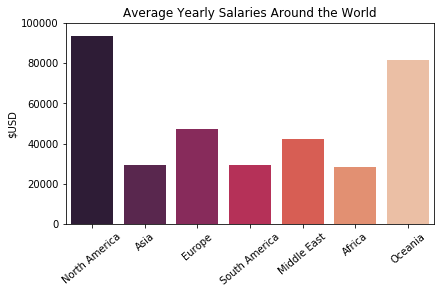

In [68]:
ax=sns.barplot(x=country_list, y=mean_annual_salary_continent,palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.tight_layout()
plt.title('Average Yearly Salaries Around the World')
plt.ylabel('$USD')
plt.ylim(0, 100000)
plt.show()

We can see that there is a clear trend in comparing the average salary with respect to the continent of residence. Particuarly, North American, Oceania, and European data scientists seem to earn more than their Asian, South American, and African counterparts. This indicates that the location of where you work contributes a great deal on the typical compensation of a data scientist. This is not surprising as most first world/developed countries are within these continents and hence, pay a lot of money for jobs. However, these locations also have a higher cost of living, which can also be attributed to why they get paid more. 

As a quick check, let's see how many people responded to the Kaggle survey online. 

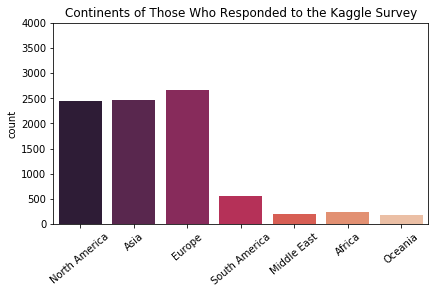

In [69]:
ax=sns.barplot(x=country_list, y=count_continent,palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.tight_layout()
plt.title('Continents of Those Who Responded to the Kaggle Survey')
plt.ylabel('count')
plt.ylim(0, 4000)
plt.show()

We can see that a lot of people from Asia, North America and Europe answered the Kaggle survey. On the contrary, only a few people responded to the survey in the other regions of the world. Hence, the average for both North America, Asia, and Europe have some credibility to it, as the sample size is high for these regions. 

Let's look at the age ranges of those who responded with respect to their salary. 

In [70]:
# age group and salaries
raw_data_text['Q2'].unique()

array(['30-34', '22-24', '40-44', '25-29', '35-39', '18-21', '60-69',
       '55-59', '50-54', '45-49', '80+', '70-79'], dtype=object)

In [71]:
# reorganize age brackets in ascending order
age_bracket_list = np.array(['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70-79', '80+'])

In [72]:
# Calculate average salaries for each age group
count_age_bracket = []
mean_annual_salary_age_bracket = []

for age_range in age_bracket_list: 
    count_age_bracket.append(raw_data_text[raw_data_text['Q2'] == age_range].describe()['Q9']['count'])
    mean_annual_salary_age_bracket.append(raw_data_text[raw_data_text['Q2'] == age_range].describe()['Q9']['mean'])

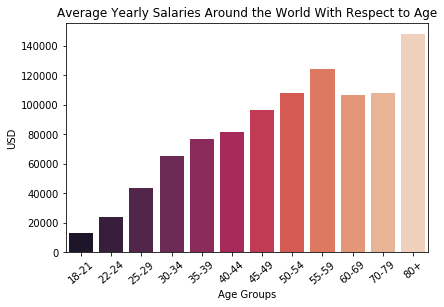

In [73]:
ax=sns.barplot(x=age_bracket_list, y=mean_annual_salary_age_bracket, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.tight_layout()
plt.title('Average Yearly Salaries Around the World With Respect to Age')
plt.ylabel('USD')
plt.xlabel('Age Groups')
plt.show()

Similarly, there is an increasing trend in comparing yearly salaries with age. Interestingly, as the person gets older, it is expected that their salary would also increase as they have more experience on the job. Interestingly, there are a few individuals that are 80 and above and earn a lot of money. These individuals could be founders of companies or may potentially be an outlier in the group. To investigate further, let's look into the count of how many responded to the survey with respect to age. 

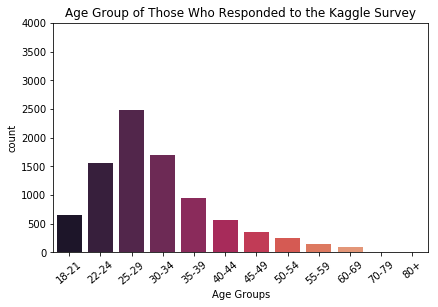

In [74]:
ax=sns.barplot(x=age_bracket_list, y=count_age_bracket, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.tight_layout()
plt.title('Age Group of Those Who Responded to the Kaggle Survey')
plt.ylabel('count')
plt.xlabel('Age Groups')
plt.ylim(0, 4000)
plt.show()

As expected, there are only a few individuals who responded to the survey that were aged 80+. Hence, some of these individuals are considered outliers and will be removed in the following section in Feature Selection as this person may skew the data. Furthermore, majority of the data scientists who responded to the survey are relatively young from ages 25-29. Let's look into the composition of each age group and their income distribution. 

We define a new variable to aid with this visualization. Income bracket essentially sorts through the salaries and categorizes an individual based on specific income ranges. This information will not be used in the modelling aspect of this project but is only used to aid with visualization. 

In [75]:
# Histogram of salaries
income_bracket = []
for element in raw_data_text['Q9']:
    if element <= 30000:
        income_bracket.append('<30K')
    elif element <= 100000 and element > 30000:
        income_bracket.append('30-100K')
    else:
        income_bracket.append('>100K')

In [76]:
raw_data_text['Income Bracket'] = income_bracket

In [77]:
lower_bracket = raw_data_text[raw_data_text['Income Bracket'] == '<30K'].groupby('Q2').describe()
middle_bracket = raw_data_text[raw_data_text['Income Bracket'] == '30-100K'].groupby('Q2').describe()
upper_bracket = raw_data_text[raw_data_text['Income Bracket'] == '>100K'].groupby('Q2').describe()

In [78]:
lower_income_list = lower_bracket['Q9']['count'].values
middle_income_list = middle_bracket['Q9']['count'].values
upper_income_list = upper_bracket['Q9']['count'].values

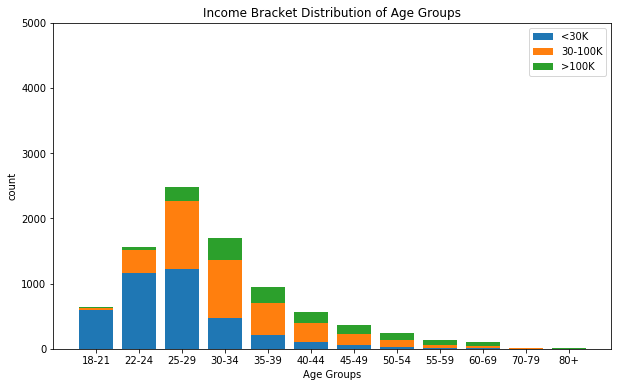

In [79]:
bar_height = lower_income_list + middle_income_list
plt.figure(figsize=(10,6))
p1 = plt.bar(age_bracket_list, lower_income_list)
p2 = plt.bar(age_bracket_list, middle_income_list, bottom=lower_income_list)
p3 = plt.bar(age_bracket_list, upper_income_list, bottom=bar_height)
plt.title('Income Bracket Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('count')
plt.ylim(0, 5000)
plt.legend((p1[0], p2[0], p3[0]), ('<30K', '30-100K', '>100K'))
plt.show()

From the above graph, we see that past 24 years old, a larger percentage of individuals in each age group earns more than 100K. This is expected as one individual gets older, they get more experienced in industry and hence, may get higher or senior positions. 

In summary, these trends presented comparing salaries with age and continent of residence is quite clear and will be helpful in predicting yearly compensation. Depending on one's age and continent of residence, it is clear that if you are older and live in a first-world country, then one's salary will be higher than those who are younger and live in developing countries. 

### 2.1b) Trends on Yearly Salaries vs Education and Years of Experience

In this section, we will look into trends of salary with respect to one's educational background and years of experience. This will provide any relationship or proportionality with respect to these variables. It is expected that those with higher education and more years of experience should get a higher paying job (or senior roles in the company). 

In [80]:
# We will again use the raw_data_text dataframe, which is the dataframe prior to encoding to easily sort through the data
educational_background_list = raw_data_text['Q4'].unique()

In [81]:
mean_annual_salary_education_bracket = []

for education in educational_background_list: 
    mean_annual_salary_education_bracket.append(raw_data_text[raw_data_text['Q4'] == education].describe()['Q9']['mean'])

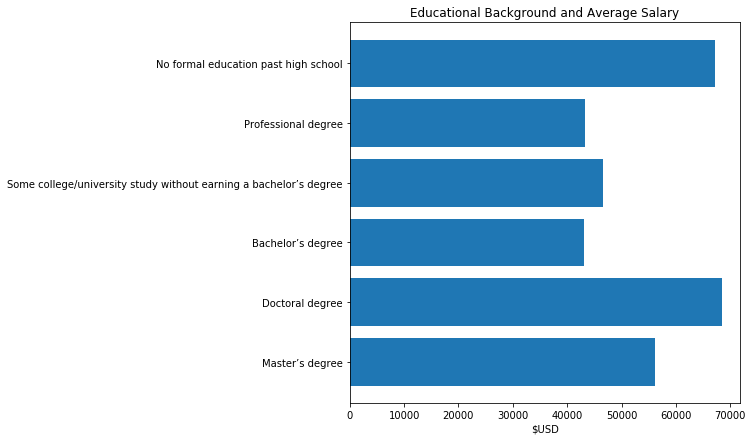

In [82]:
plt.figure(figsize=(7,7))
plt.barh(educational_background_list, mean_annual_salary_education_bracket)
plt.title('Educational Background and Average Salary')
plt.xlabel('$USD')
plt.show()

From first glance, it is surprising to see those with no post-secondary education to earn similar salaries as someone with a master's degree or even higher than a bachelor's degree. These individuals may be founders of startups that earn a large salary. Moreover, those who advanced degrees such as a doctorate earn the money which is expected. Similar to 2.1a), we will look into the income distribution among these categories. 

In [83]:
lower_bracket_education = raw_data_text[raw_data_text['Income Bracket'] == '<30K'].groupby('Q4').describe().reindex(index=educational_background_list)
middle_bracket_education = raw_data_text[raw_data_text['Income Bracket'] == '30-100K'].groupby('Q4').describe().reindex(index=educational_background_list)
upper_bracket_education = raw_data_text[raw_data_text['Income Bracket'] == '>100K'].groupby('Q4').describe().reindex(index=educational_background_list)

In [84]:
lower_bracket_education_list = lower_bracket_education['Q11_Part_1']['count'].values
middle_bracket_education_list = middle_bracket_education['Q11_Part_1']['count'].values
upper_bracket_education_list = upper_bracket_education['Q11_Part_1']['count'].values

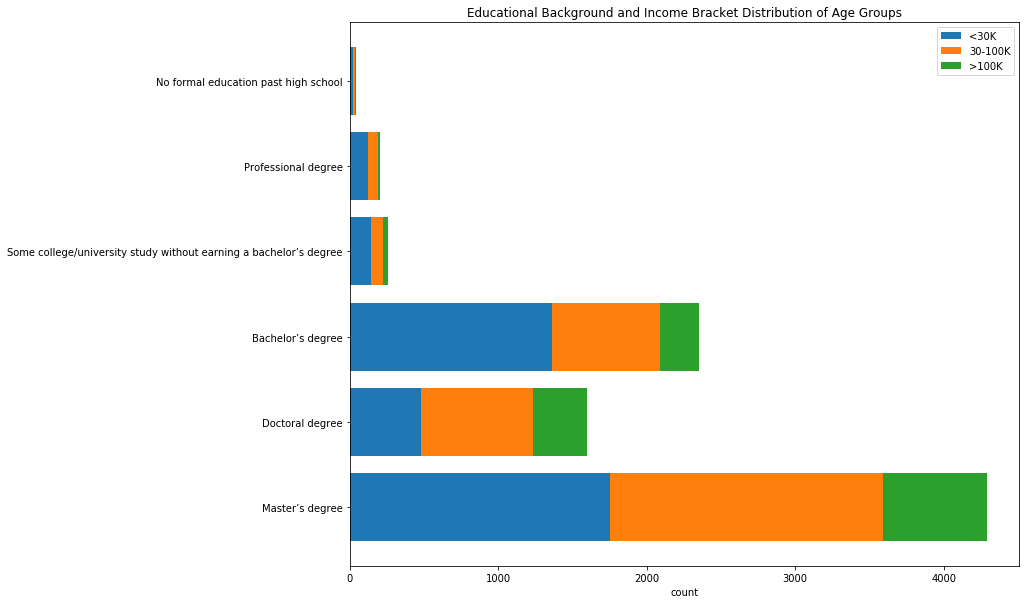

In [85]:
bar_height = lower_bracket_education_list + middle_bracket_education_list
plt.figure(figsize=(12,10))
p1 = plt.barh(educational_background_list, lower_bracket_education_list)
p2 = plt.barh(educational_background_list, middle_bracket_education_list, left=lower_bracket_education_list)
p3 = plt.barh(educational_background_list, upper_bracket_education_list, left=bar_height)
plt.title('Educational Background and Income Bracket Distribution of Age Groups')
plt.xlabel('count')
plt.legend((p1[0], p2[0], p3[0]), ('<30K', '30-100K', '>100K'))
plt.show()

Based on looking at those who responded, and their respective income brackets for each educational level, it is seen that those who more advanced degrees such as a doctoral, master's or bachelor's have a higher percentage of individuals that earn more than 100K and also range from 30-100K salaries. Interestingly, there are only a small number of individuals with no formal education that earn greater than 100K, indicating that they may be an outlier or special case as they may be the founder of their own startup. 

Let's look into the relationship between yearly salary and years of experience. 

In [86]:
raw_data_text['Q8'].unique()

array(['0-1', '3-4', '5-10', '1-2', '2-3', '10-15', '15-20', '4-5',
       '25-30', '20-25', '30 +'], dtype=object)

In [87]:
years_of_experience=['0-1', '1-2', '2-3', '3-4','4-5','5-10', '10-15', '15-20', '20-25', '25-30', '30 +']

In [88]:
mean_annual_salary_years_of_experience_bracket = []

for years in years_of_experience: 
    mean_annual_salary_years_of_experience_bracket.append(raw_data_text[raw_data_text['Q8'] == years].describe()['Q9']['mean'])

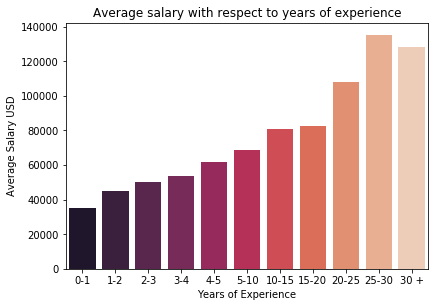

In [89]:
ax=sns.barplot(x=years_of_experience, y=mean_annual_salary_years_of_experience_bracket, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
plt.tight_layout()
plt.title('Average salary with respect to years of experience')
plt.ylabel('Average Salary USD')
plt.xlabel('Years of Experience')
plt.show()

As expected, those with more years of experience earn more money. Let's delve deeper into the composition of each years of experience and their respective income bracket distribution. 

In [90]:
lower_bracket_experience = raw_data_text[raw_data_text['Income Bracket'] == '<30K'].groupby('Q8').describe().reindex(index=years_of_experience)
middle_bracket_experience = raw_data_text[raw_data_text['Income Bracket'] == '30-100K'].groupby('Q8').describe().reindex(index=years_of_experience)
upper_bracket_experience = raw_data_text[raw_data_text['Income Bracket'] == '>100K'].groupby('Q8').describe().reindex(index=years_of_experience)

In [91]:
lower_bracket_experience_list = lower_bracket_experience['Q9']['count'].values
middle_bracket_experience_list = middle_bracket_experience['Q9']['count'].values
upper_bracket_experience_list = upper_bracket_experience['Q9']['count'].values

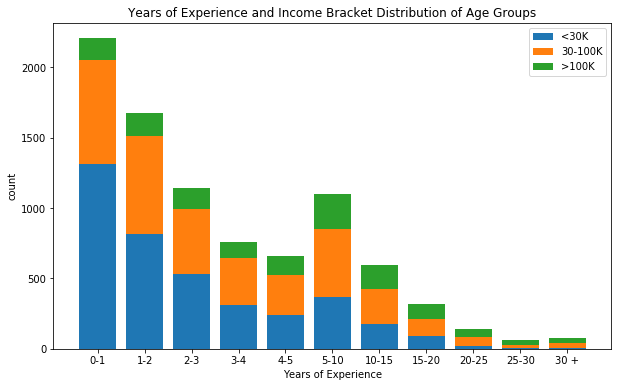

In [92]:
bar_height = lower_bracket_experience_list + middle_bracket_experience_list
plt.figure(figsize=(10,6))
p1 = plt.bar(years_of_experience, lower_bracket_experience_list)
p2 = plt.bar(years_of_experience, middle_bracket_experience_list, bottom=lower_bracket_experience_list)
p3 = plt.bar(years_of_experience, upper_bracket_experience_list, bottom=bar_height)
plt.title('Years of Experience and Income Bracket Distribution of Age Groups')
plt.xlabel('Years of Experience')
plt.ylabel('count')
plt.legend((p1[0], p2[0], p3[0]), ('<30K', '30-100K', '>100K'))
plt.show()

Shown in the above graph is the income bracket distribution of individuals based on their years of experience. We can see that those with a lower number of years of experience have a higher percentage of people earning less than 30K a year. As one gains more experience, the salaries tend to increase as shown by the diminishing percentage of <30K and 30-100K brackets and the increasing bar of > 100K as one gains more years of experience. The income bracket of those who earn <30K becomes smaller and smaller which is exhibited by those with more than 10-15 years of experience. 

### 2.1c) Trends on Yearly Salaries vs Programming Skills

In this section, we will look into the trends between one's salary with respect to one's proficiency and knowledge in a variety of programming languages as well as tools to analyze data. 

In [93]:
# lets look into the tools people use to analyze data
data_tools_list = raw_data_text['Q12_MULTIPLE_CHOICE'].unique()

In [94]:
mean_annual_salary_data_tools = []

for tools in data_tools_list: 
    mean_annual_salary_data_tools.append(raw_data_text[raw_data_text['Q12_MULTIPLE_CHOICE'] == tools].describe()['Q9']['mean'])

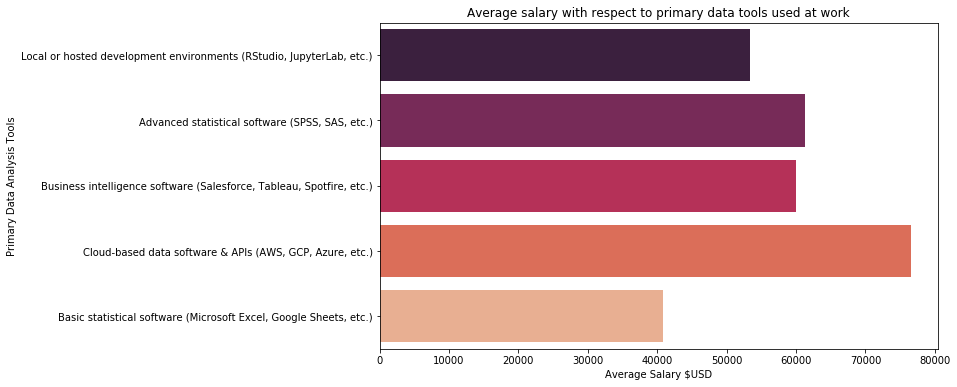

In [95]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=mean_annual_salary_data_tools, y=data_tools_list,palette="rocket")
plt.title('Average salary with respect to primary data tools used at work')
plt.xlabel('Average Salary $USD')
plt.ylabel('Primary Data Analysis Tools')
plt.show()

Based on the graph above, most people who deal with cloud computing earn the most money. Moreover, those individuals who use very basic software such as Excel and Spreadsheets, typically earn less. 

In [96]:
# Let's look into one's proficiency in programming with respect to salary
programming_languages = raw_data_text['Q17'].unique()

In [97]:
mean_annual_salary_languages = []

for languages in programming_languages: 
    mean_annual_salary_languages.append(raw_data_text[raw_data_text['Q17'] == languages].describe()['Q9']['mean'])

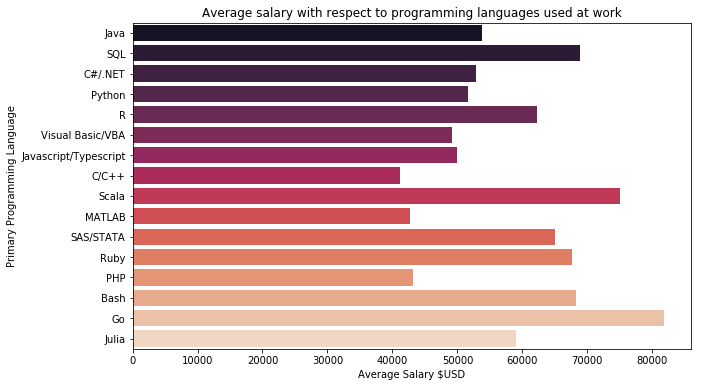

In [98]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=mean_annual_salary_languages, y=programming_languages, palette="rocket")
plt.title('Average salary with respect to programming languages used at work')
plt.xlabel('Average Salary $USD')
plt.ylabel('Primary Programming Language')
plt.show()

Shown above are the programming languages used with respect to annual average salary. We can see that those who use Go earns the most whereas those who code in older languages such as C/C++ earn the least. 

## 2.1  Summary

The previous sections highlighted a few trends that can be used to help with predicting yearly compnesation and understanding the data. 

- It was shown that the continent of residence is a large factor in estimating the income of an individual. Those who work in North America, Oceania, and in Europe (first world countries) earn the most, whereas the rest are lower. 
- Yearly salaries increase as one becomes older as they get more experience on the job. Furthermore, a higher percentage of each age group joins the higher income bracket whereas the percentage of those with lower income decreases as you get older and gain more years of experience. 
- Those with advanced degrees typically earn more money. 
- Those with more years of experience earn more money. 
- Those who deal with cloud computing and specific programming languages such as Go and Scala earn more money. 

These observations and trends may be useful in selecting features which indicate the level of expected compensations/salaries of certain individuals with these attributes. 

## 2.2 Feature Importance 

An indication of feature importance will aid in helping select or engineer features to be used to create the model. A feature importance analysis is presented here as a first pass for feature selection in the following section. Upon completion of engineering new features and selecting the optimal ones based on recursive feature elimination, another feature importance analysis will be performed in section 3.0. 

In this section we will use the cleaned_encoded_data to create a correlation matrix. 

In [99]:
corr_prelim = cleaned_encoded_data.corr()

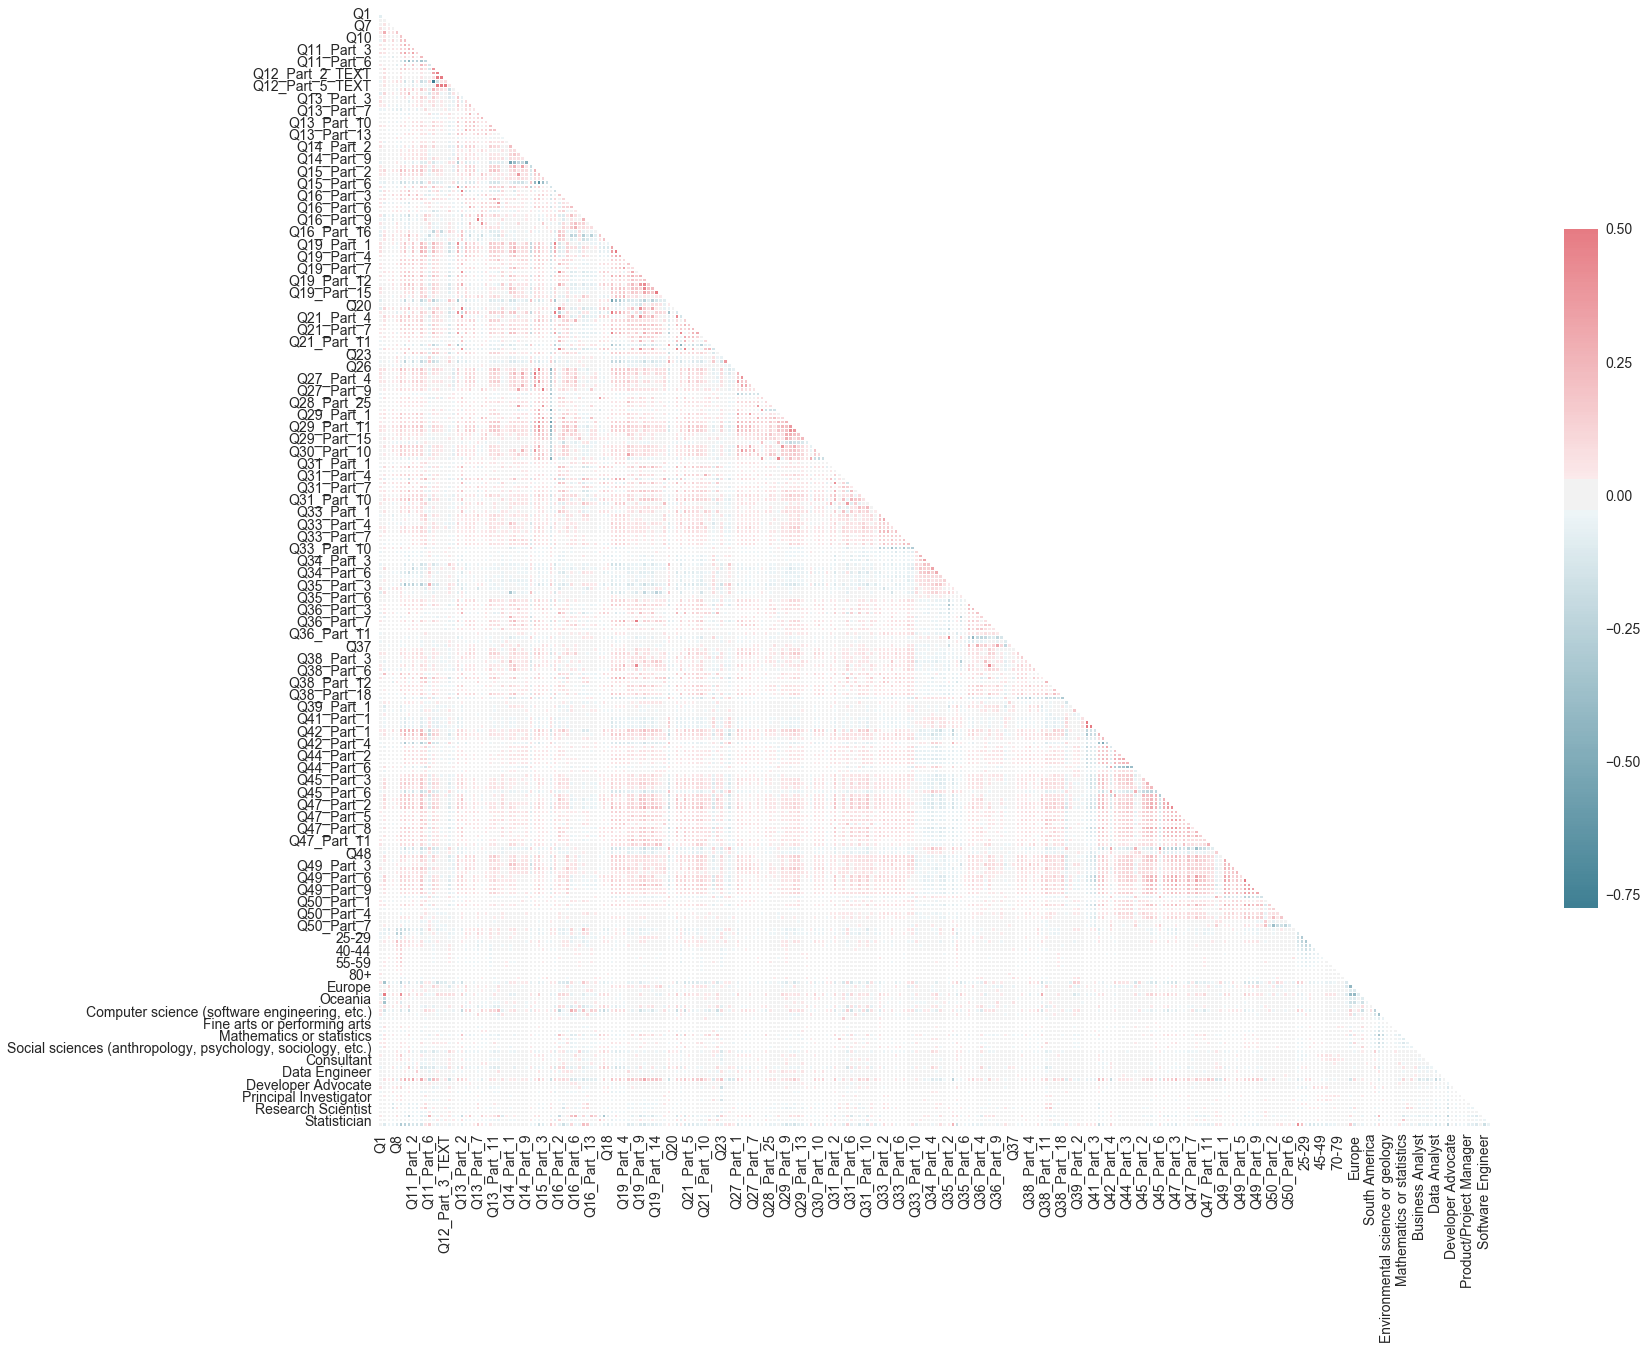

In [100]:
sns.set(style="white", font_scale = 1.4)
mask = np.zeros_like(corr_prelim, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_prelim, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Because of the sheer number of features used in the correlation matrix, we can barely see the correlations. Hence, we will only isolate for those that are correlated with Q9, salary information. 

In [101]:
# We will only need the values that are correlated with Q9 (Salary) information. 
correlations_prelim = corr_prelim['Q9']
indices_prelim = corr_prelim['Q9'].index

In [102]:
features = []
value_corr_feature = []

for value, index in zip(correlations_prelim, indices_prelim):
    if abs(value) > 0.2:
        features.append(index)
        value_corr_feature.append(value)

In [103]:
features

['Q3',
 'Q9',
 'Q11_Part_4',
 'Q15_Part_2',
 'Q27_Part_1',
 'Q30_Part_9',
 'Q42_Part_1',
 '22-24',
 'Asia',
 'North America',
 'Student']

In [104]:
value_corr_feature

[0.28602920162842815,
 1.0,
 0.2071996164323745,
 0.22115363073878505,
 0.21991041702571767,
 0.20045331911485956,
 0.2117294322871235,
 -0.2354519801977187,
 -0.25875379175006546,
 0.40993755169056495,
 -0.29249000450453816]

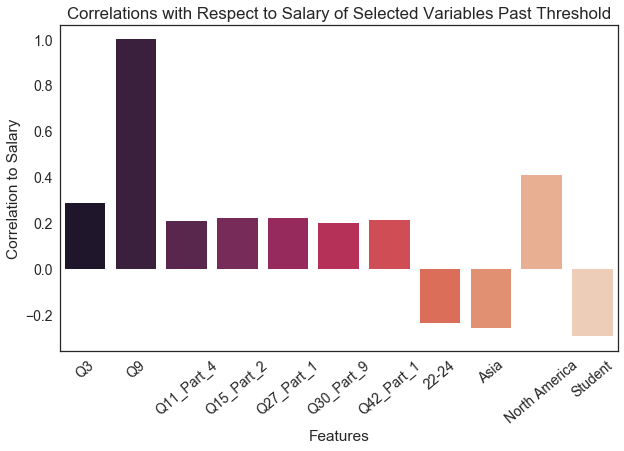

In [105]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=features, y=value_corr_feature, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.title('Correlations with Respect to Salary of Selected Variables Past Threshold')
plt.xlabel('Features')
plt.ylabel('Correlation to Salary')
plt.show()

Through looking at the correlations between Q9 (i.e. salary) and all the other features, we can see a small degree of correlation with certain prominent features. Notable features include: 
- Q3 - country of residence
- Q11_Part_4 - Job task of building prototypes to explore applying ML to new areas
- Q15_Part_2 - used amazon web services
- Q27_Part_1 - used AWS Elastic Compute Cloud (EC2)
- Q30_Part_9 - used AWS Redshift
- Q42_Part_1 - Used revenue as a metric to see whether models were successful
- Age group of 22-24
- Continent of Residence - Asia
- Continent of Residence - North America
- Being a student 

We can also quantify feature importance using a decision tree. The decision tree was applied to identify potential important features for the ML model comparison using its attribute feature_importances_. 

In [106]:
Salary_y_original = cleaned_encoded_data['Q9']
Salary_x_original= cleaned_encoded_data.drop('Q9', axis=1)

In [107]:
dtree = DecisionTreeRegressor(min_samples_leaf = 400)
dtree = dtree.fit(Salary_x_original, Salary_y_original)

In [108]:
print(pd.DataFrame(dtree.feature_importances_, columns =["Importance"], index = Salary_x_original.columns).sort_values(by = ["Importance"],ascending = False))

               Importance
North America    0.529202
Q10              0.134697
Q8               0.121996
Student          0.105505
Q42_Part_1       0.051018
25-29            0.029678
22-24            0.018479
Q11_Part_4       0.009014
Q24              0.000412
Q35_Part_5       0.000000
Q44_Part_3       0.000000
Q45_Part_1       0.000000
Q44_Part_6       0.000000
Q44_Part_4       0.000000
Q44_Part_2       0.000000
Q45_Part_3       0.000000
Q44_Part_1       0.000000
Q43              0.000000
Q42_Part_4       0.000000
Q42_Part_3       0.000000
Q42_Part_2       0.000000
Q45_Part_2       0.000000
Q45_Part_4       0.000000
Q41_Part_2       0.000000
Q45_Part_5       0.000000
Q45_Part_6       0.000000
Q46              0.000000
Q47_Part_1       0.000000
Q47_Part_2       0.000000
Q47_Part_3       0.000000
...                   ...
Q21_Part_2       0.000000
Q21_Part_4       0.000000
Q21_Part_5       0.000000
Q21_Part_6       0.000000
Q21_Part_7       0.000000
Q21_Part_8       0.000000
Q21_Part_10 

Through the feature importance attribute of the decision tree, features were ranked based on their importance. Interestingly, features presented by the tree had some similarities and differences from the result of the correlation matrix. Features that were ranked important were: 
- Continent of Residence - North America
- Q10 - If job uses ML methods
- Q8 - Years of experience
- Being a Student 
- Q42_Part_1 - Used revenue as a metric to see whether models were successful
- Age Group 25-29
- Age Group 22-24
- Q11_Part_4 - Building prototypes to explore applying ML to new areas
- Q24 - Years of experience of coding to analyze data


The features presented in the correlation matrix and decision tree feature importance analysis highlighted similar trends from the visualization section of the data and also presented potential features to use in the model. 

### Given the original attributes in the data, the following are most related: 
- Q3 - country of residence
- Q11_Part_4 - Job task of building prototypes to explore applying ML to new areas
- Q15_Part_2 - used amazon web services
- Q27_Part_1 - used AWS Elastic Compute Cloud (EC2)
- Q30_Part_9 - used AWS Redshift
- Q42_Part_1 - Used revenue as a metric to see whether models were successful
- Age group of 22-24
- Continent of Residence - Asia
- Continent of Residence - North America
- Being a student
- Q8 - Years of Experience
- Q24 - Years of experience writing code to analyze data

In summary, the following attributes are important and have a relationship with salary
- country and continent of residence
- current occupation
- specific age groups earn more money
- more years of experience earn more money 
- one may earn more money if the individual uses AWS archictecture
- one may earn more money if the ML models built are used to generate revenue at their respective job

# 3.0 Feature Engineering and Selection

In this main section, we will look into engineering new features, performing another feature importance analysis to determine optimal features, and perform RFE (recursive feature elimination) using lasso regression (regularized regression) to determine features to be used in the ML models in section 4.0. 

In [109]:
cleaned_encoded_data.head(5)

Q1  Q3  Q4  Q7  Q8      Q9  Q10  Q11_Part_1  Q11_Part_2  Q11_Part_3  \
1   0  54   2   7   0    2726    0           1           0           0   
2   1  20   2   7   0     682    0           0           0           0   
5   1  19   2  15   7   21152    3           0           1           1   
6   1  54   2  16  10  132826    4           0           1           0   
7   1  15   1   7   0   38246    3           0           0           0   

    ...     Manager  Marketing Analyst  Principal Investigator  \
1   ...           0                  0                       0   
2   ...           0                  0                       0   
5   ...           0                  0                       0   
6   ...           0                  0                       0   
7   ...           0                  0                       0   

   Product/Project Manager  Research Assistant  Research Scientist  \
1                        0                   0                   0   
2                        0                   0                   0   
5                        0                   0                   0   
6                        0                   0                   0   
7                        0                   0                   0   

   Salesperson  Software Engineer  Statistician  Student  
1            0                  0             0        0  
2            0                  0             0        0  
5            0                  1             0        0  
6            0                  0             0        0  
7            0                  0             0        1  

[5 rows x 275 columns]

## 3.1 Feature Engineering

### Explain how feature engineering is a useful tool in machine learning. 
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to predictive models. The features in the data are important to the predictive models and influence the output of the model. Dealing with a large number of features, especially in the context of this project, is difficult due to high dimensionality. More features tends to make models more complex and difficult to interpret the data. Feature engineering allows us to create new features from the raw data presented that may better represent the data. This makes it easier to create models, train these models, and potentially achieve decent accuracies. 

In the following sections, we will be presenting features that were created from existing raw data set. These include:
- Creation of a continent of residence based from country of residence
- Combine multiple part questions from the raw data set
- Target variable manipulation (square root transformation of the salary data to create a better distribution)
- Scaling the features to have a mean of 0 and a standard deviation of 1.0 to easily model it in certain ML models such as SVM, etc. 


### 3.1 a) Continent of Residence 

This feature was already created and was encoded in section 1.0. 

### 3.1 b) Combine Part Questions

Multiple question contains parts pertaining to specific tasks, programming languages, and cloud computing services used, etc. To reduce the number of features, the parts will be summed to account for the total number of of programming languages known, number of cloud computing services used, etc. 

Questions that contain potentially relevant information: 
- Q11_PartX: Select any activities that make up an important part of your role at work
- Q12_PartX: Number of tools used to analyze data
- Q13_PartX: Number of IDEs
- Q14_PartX: Hosted Notebooks
- Q15_PartX: Cloud computing services
- Q16_PartX: Programming languages
- Q19_PartX: ML Frameworks
- Q21_PartX: DataVisualization
- Q27_PartX: Cloud computing products
- Q28_PartX: ML products
- Q29_PartX: Relational database products used
- Q30_PartX: Big Data and Analytic Products
- Q31_PartX: Types of data interacted
- Q33_PartX: Public Datasets used
- Q36_PartX: Online platforms
- Q38_PartX: Media sources
- Q47_PartX: Preference for explaining decisions
- Q48_Part9: Tools and methods to make your work easy to reproduce
- Q50_PartX: Barriers

In [110]:
# Copy dataframes
cleaned_encoded_data_edited = cleaned_encoded_data.copy()

# Additional features
Q11_list = []
Q12_list = []
Q13_list = []
Q14_list = []
Q15_list = []
Q16_list = []
Q19_list = []
Q21_list = []
Q27_list = []
Q28_list = []
Q29_list = []
Q30_list = []
Q31_list = []
Q33_list = []
Q36_list = []
Q38_list = []
Q47_list = []
Q48_list = []
Q50_list = []

cleaned_encoded_data_edited_list = list(cleaned_encoded_data_edited)

for column in cleaned_encoded_data_edited_list:
    column = column.rstrip()
    if "Q11_Part" in column:
        Q11_list.append(column)
    elif "Q12_Part" in column:
        Q12_list.append(column)
    elif "Q13_Part" in column:
        Q13_list.append(column)
    elif "Q14_Part" in column:
        Q14_list.append(column)
    elif "Q15_Part" in column:
        Q15_list.append(column) 
    elif "Q16_Part" in column:
        Q16_list.append(column)
    elif "Q19_Part" in column:
        Q19_list.append(column)
    elif "Q21_Part" in column:
        Q21_list.append(column)
    elif "Q27_Part" in column:
        Q27_list.append(column)
    elif "Q28_Part" in column:
        Q28_list.append(column)
    elif "Q29_Part" in column:
        Q29_list.append(column) 
    elif "Q30_Part" in column:
        Q30_list.append(column)
    elif "Q31_Part" in column:
        Q31_list.append(column)
    elif "Q33_Part" in column:
        Q33_list.append(column)
    elif "Q36_Part" in column:
        Q36_list.append(column)
    elif "Q38_Part" in column:
        Q38_list.append(column)
    elif "Q47_Part" in column:
        Q47_list.append(column) 
    elif "Q48_Part" in column:
        Q48_list.append(column)
    elif "Q50_Part" in column:
        Q50_list.append(column)
    else:
        continue


In [111]:
# cleaned_encoded_data['Known Languages'] = cleaned_encoded_data[Q16_list].sum(axis=1)
cleaned_encoded_data_edited['Q11_sum'] = cleaned_encoded_data_edited[Q11_list].sum(axis=1)
cleaned_encoded_data_edited['Q12_sum'] = cleaned_encoded_data_edited[Q12_list].sum(axis=1)
cleaned_encoded_data_edited['Q13_sum'] = cleaned_encoded_data_edited[Q13_list].sum(axis=1)
cleaned_encoded_data_edited['Q14_sum'] = cleaned_encoded_data_edited[Q14_list].sum(axis=1)
cleaned_encoded_data_edited['Q15_sum'] = cleaned_encoded_data_edited[Q15_list].sum(axis=1)
cleaned_encoded_data_edited['Q16_sum'] = cleaned_encoded_data_edited[Q16_list].sum(axis=1)
cleaned_encoded_data_edited['Q19_sum'] = cleaned_encoded_data_edited[Q19_list].sum(axis=1)
cleaned_encoded_data_edited['Q21_sum'] = cleaned_encoded_data_edited[Q21_list].sum(axis=1)
cleaned_encoded_data_edited['Q27_sum'] = cleaned_encoded_data_edited[Q27_list].sum(axis=1)
cleaned_encoded_data_edited['Q28_sum'] = cleaned_encoded_data_edited[Q28_list].sum(axis=1)
cleaned_encoded_data_edited['Q29_sum'] = cleaned_encoded_data_edited[Q29_list].sum(axis=1)
cleaned_encoded_data_edited['Q30_sum'] = cleaned_encoded_data_edited[Q30_list].sum(axis=1)
cleaned_encoded_data_edited['Q31_sum'] = cleaned_encoded_data_edited[Q31_list].sum(axis=1)
cleaned_encoded_data_edited['Q33_sum'] = cleaned_encoded_data_edited[Q33_list].sum(axis=1)
cleaned_encoded_data_edited['Q36_sum'] = cleaned_encoded_data_edited[Q36_list].sum(axis=1)
cleaned_encoded_data_edited['Q38_sum'] = cleaned_encoded_data_edited[Q38_list].sum(axis=1)
cleaned_encoded_data_edited['Q47_sum'] = cleaned_encoded_data_edited[Q47_list].sum(axis=1)
cleaned_encoded_data_edited['Q48_sum'] = cleaned_encoded_data_edited[Q48_list].sum(axis=1)
cleaned_encoded_data_edited['Q50_sum'] = cleaned_encoded_data_edited[Q50_list].sum(axis=1)

In [112]:
cleaned_encoded_data_edited.head(5)

Q1  Q3  Q4  Q7  Q8      Q9  Q10  Q11_Part_1  Q11_Part_2  Q11_Part_3  \
1   0  54   2   7   0    2726    0           1           0           0   
2   1  20   2   7   0     682    0           0           0           0   
5   1  19   2  15   7   21152    3           0           1           1   
6   1  54   2  16  10  132826    4           0           1           0   
7   1  15   1   7   0   38246    3           0           0           0   

    ...     Q28_sum  Q29_sum  Q30_sum  Q31_sum  Q33_sum  Q36_sum  Q38_sum  \
1   ...           0        0        0        4        3        2        1   
2   ...           1        0        0        1        1        4        1   
5   ...           1        3        0        4        4        1        1   
6   ...           0        3        1        1        1        3        1   
7   ...           1        2        1        9        5        4        3   

   Q47_sum  Q48_sum  Q50_sum  
1        3      0.0        1  
2        1      0.0        2  
5        4      0.0        2  
6        1      0.0        2  
7        4      0.0        1  

[5 rows x 294 columns]

In [113]:
list(cleaned_encoded_data_edited.columns)

['Q1',
 'Q3',
 'Q4',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11_Part_1',
 'Q11_Part_2',
 'Q11_Part_3',
 'Q11_Part_4',
 'Q11_Part_5',
 'Q11_Part_6',
 'Q12_MULTIPLE_CHOICE',
 'Q12_Part_1_TEXT',
 'Q12_Part_2_TEXT',
 'Q12_Part_3_TEXT',
 'Q12_Part_4_TEXT',
 'Q12_Part_5_TEXT',
 'Q13_Part_1',
 'Q13_Part_2',
 'Q13_Part_3',
 'Q13_Part_4',
 'Q13_Part_6',
 'Q13_Part_7',
 'Q13_Part_8',
 'Q13_Part_9',
 'Q13_Part_10',
 'Q13_Part_11',
 'Q13_Part_12',
 'Q13_Part_13',
 'Q13_Part_15',
 'Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_5',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q15_Part_1',
 'Q15_Part_2',
 'Q15_Part_3',
 'Q15_Part_4',
 'Q15_Part_6',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_13',
 'Q16_Part_14',
 'Q16_Part_16',
 'Q17',
 'Q18',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_Part_6',
 'Q19_Part_7',
 'Q19_Part_9',
 'Q19_Part_10',
 'Q19_Part_12',
 'Q19_Part_13',
 'Q

In [114]:
# Drop all of the parts columns for each question listed in this subsection while retaining the summation
colsToDrop = Q11_list + Q12_list + Q13_list + Q14_list + Q15_list + Q16_list + Q19_list + Q21_list + Q27_list + Q28_list + Q29_list + Q30_list + Q31_list + Q33_list + Q36_list + Q38_list + Q47_list + Q48_list + Q50_list 


In [115]:
cleaned_encoded_data_edited = cleaned_encoded_data_edited.drop(colsToDrop, axis=1)

In [116]:
cleaned_encoded_data_edited.head(5)

Q1  Q3  Q4  Q7  Q8      Q9  Q10  Q12_MULTIPLE_CHOICE  Q17  Q18   ...     \
1   0  54   2   7   0    2726    0                    4    4    7   ...      
2   1  20   2   7   0     682    0                    0   13    8   ...      
5   1  19   2  15   7   21152    3                    4    1    7   ...      
6   1  54   2  16  10  132826    4                    2    4    7   ...      
7   1  15   1   7   0   38246    3                    3    9    7   ...      

   Q28_sum  Q29_sum  Q30_sum  Q31_sum  Q33_sum  Q36_sum  Q38_sum  Q47_sum  \
1        0        0        0        4        3        2        1        3   
2        1        0        0        1        1        4        1        1   
5        1        3        0        4        4        1        1        4   
6        0        3        1        1        1        3        1        1   
7        1        2        1        9        5        4        3        4   

   Q48_sum  Q50_sum  
1      0.0        1  
2      0.0        2  
5      0.0        2  
6      0.0        2  
7      0.0        1  

[5 rows x 133 columns]

### 3.1 c) Target Variable Manipulation (Remove Outliers and SQRT Transform)

In this section, we will look into the salaries found in the data set. Based on a histogram plot of the salaries, we can see that it is skewed with a right tail. Based on visual observation, we can see that there are potential outliers found for those individuals who earn more than USD350,000. While this may be a realistic value for certain senior individuals, this is not typically the case for an average data scientist. Hence, we will be removing individuals who earn more than USD350,000. 

Afterwards, we will be performing a square root transformation to the salaries data to create a better distribution closer to a normal distribution as it will provide better predictions and estimates and thus, achieve better accuracies overall. 

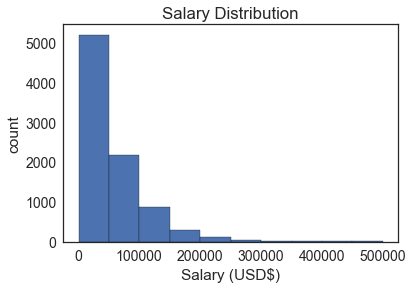

In [117]:
plt.hist(cleaned_encoded_data_edited['Q9'], edgecolor='black')
plt.title('Salary Distribution')
plt.ylabel('count')
plt.xlabel('Salary (USD$)')
plt.show()

In [118]:
# print how many individuals earned more than USD$350,000
len(cleaned_encoded_data_edited[cleaned_encoded_data_edited['Q9'] > 350000])

50

In [119]:
# remove outliers
cleaned_encoded_data_edited=cleaned_encoded_data_edited[cleaned_encoded_data_edited['Q9'] < 350000]

In [120]:
# Perform Square Root transformation
Salary_Y = np.sqrt(cleaned_encoded_data_edited['Q9'])

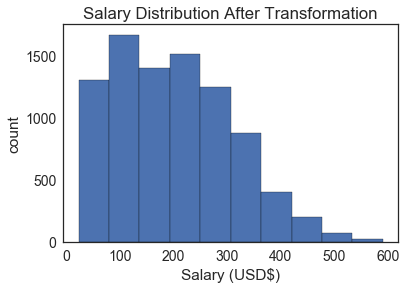

In [121]:
plt.hist(Salary_Y, edgecolor='black')
plt.title('Salary Distribution After Transformation')
plt.ylabel('count')
plt.xlabel('Salary (USD$)')
plt.show()

After performing a sqrt transformation to the output variable (salary), it is evident that this transformation reduced the skewness of the outut variable's distribution, thus making it closer to a normal distribution. This will aid in predicting the output variable. If this model is to be used to predict a salary, an inverse sqrt transformation needs to be applied as will be shown in section 6.0. 

### 3.1 d) Scaling Features

Prior to using any ML model, the data needs to be scaled. Each column will be scaled to have a mean of zero and a standard deviation of one. This is to ensure that all features and data used are within the same order of magnitude. Providing data with different scales will skew the data and thus, affect the performance of the models. 

In [122]:
# Drop Q9 - Salary information as it does not need to be scaled. 
cleaned_encoded_data_edited = cleaned_encoded_data_edited.drop('Q9', axis=1)

In [123]:
# use standardscaler to scale all the features
scaled_features = StandardScaler().fit_transform(cleaned_encoded_data_edited.values)
scaled_features_df = pd.DataFrame(scaled_features, index=cleaned_encoded_data_edited.index, columns = cleaned_encoded_data_edited.columns)

In [124]:
scaled_features_df.head(5)

Q1        Q3        Q4        Q7        Q8       Q10  \
1 -2.267122  1.214164  0.510578  0.150663 -1.009823 -1.806408   
2  0.350710 -0.645927  0.510578  0.150663 -1.009823 -1.806408   
5  0.350710 -0.700636  0.510578  1.672119  0.905009  0.213894   
6  0.350710  1.214164  0.510578  1.862301  1.725652  0.887328   
7  0.350710 -0.919470 -0.371597  0.150663 -1.009823  0.213894   

   Q12_MULTIPLE_CHOICE       Q17       Q18       Q20    ...      Q28_sum  \
1             0.723560 -1.943413 -0.112558  0.109923    ...    -0.882701   
2            -2.042188  1.680069  0.660590  0.109923    ...     0.967821   
5             0.723560 -3.151240 -0.112558  0.109923    ...     0.967821   
6            -0.659314 -1.943413 -0.112558  0.109923    ...    -0.882701   
7             0.032123  0.069632 -0.112558  0.109923    ...     0.967821   

    Q29_sum   Q30_sum   Q31_sum   Q33_sum   Q36_sum   Q38_sum   Q47_sum  \
1 -0.970136 -0.906549  0.257388  0.066820 -0.269981 -0.869581 -0.007712   
2 -0.970136 -0.906549 -1.400161 -1.008235  1.044184 -0.869581 -0.856662   
5  0.987091 -0.906549  0.257388  0.604348 -0.927064 -0.869581  0.416763   
6  0.987091  0.796854 -1.400161 -1.008235  0.387101 -0.869581 -0.856662   
7  0.334682  0.796854  3.019969  1.141876  1.044184  0.369462  0.416763   

   Q48_sum   Q50_sum  
1      0.0 -0.318910  
2      0.0  0.723661  
5      0.0  0.723661  
6      0.0  0.723661  
7      0.0 -0.318910  

[5 rows x 132 columns]

## 3.2 Feature Selection

In this section, we will discuss methods to select optimal features to be used in our models. We will first define a function that was modified from tutorial to perform kfold cross validation for the training sets. After, we will use RFE using linear regression, followed by RFE using lasso regression to see any changes/improvements. Upon selected features, another feature importance analysis is performed similar to section 2.2.    

In [125]:
def run_kfold(X, Y, model):
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        
        accuracy = r2_score(Y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    var_outcome = np.var(outcomes)
    print("Mean r2: {0}".format(mean_outcome)) 
    print("Standard Deviation: {0}".format(std_outcome)) 
    print("Variance: {0}".format(var_outcome)) 
    
    return {'mean': mean_outcome, 'std': std_outcome, 'var': var_outcome, 'outcomes': outcomes}

In [126]:
# Define inputs and output of the models 
Salaries_Y = Salary_Y # transformed salaries
Salaries_X = scaled_features_df # scaled dataframe

In [127]:
Salaries_X.head(5)

Q1        Q3        Q4        Q7        Q8       Q10  \
1 -2.267122  1.214164  0.510578  0.150663 -1.009823 -1.806408   
2  0.350710 -0.645927  0.510578  0.150663 -1.009823 -1.806408   
5  0.350710 -0.700636  0.510578  1.672119  0.905009  0.213894   
6  0.350710  1.214164  0.510578  1.862301  1.725652  0.887328   
7  0.350710 -0.919470 -0.371597  0.150663 -1.009823  0.213894   

   Q12_MULTIPLE_CHOICE       Q17       Q18       Q20    ...      Q28_sum  \
1             0.723560 -1.943413 -0.112558  0.109923    ...    -0.882701   
2            -2.042188  1.680069  0.660590  0.109923    ...     0.967821   
5             0.723560 -3.151240 -0.112558  0.109923    ...     0.967821   
6            -0.659314 -1.943413 -0.112558  0.109923    ...    -0.882701   
7             0.032123  0.069632 -0.112558  0.109923    ...     0.967821   

    Q29_sum   Q30_sum   Q31_sum   Q33_sum   Q36_sum   Q38_sum   Q47_sum  \
1 -0.970136 -0.906549  0.257388  0.066820 -0.269981 -0.869581 -0.007712   
2 -0.970136 -0.906549 -1.400161 -1.008235  1.044184 -0.869581 -0.856662   
5  0.987091 -0.906549  0.257388  0.604348 -0.927064 -0.869581  0.416763   
6  0.987091  0.796854 -1.400161 -1.008235  0.387101 -0.869581 -0.856662   
7  0.334682  0.796854  3.019969  1.141876  1.044184  0.369462  0.416763   

   Q48_sum   Q50_sum  
1      0.0 -0.318910  
2      0.0  0.723661  
5      0.0  0.723661  
6      0.0  0.723661  
7      0.0 -0.318910  

[5 rows x 132 columns]

Split the data between training and testing sets with a test size of 0.3. 

In [128]:
# Train Test Split
Salaries_X_train, Salaries_X_test, Salaries_Y_train, Salaries_Y_test = train_test_split(Salaries_X,Salaries_Y,test_size=0.3, random_state=101)


Let's fit a quick linear regression model to the data. 

In [129]:
model_lr = LinearRegression()
#run_kfold(Salaries_X, Salaries_Y, model_lr)
model_lr.fit(Salaries_X_train, Salaries_Y_train)
predictions = model_lr.predict(Salaries_X_test)
Test_Score = r2_score(Salaries_Y_test, predictions)

print ("------------------\nTest Score: " + str(Test_Score))

model_lr.fit(Salaries_X_train, Salaries_Y_train)

------------------
Test Score: 0.5672261272436862


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
mean_absolute_error(Salaries_Y_test,predictions)

54.114425345002175

In [131]:
print(sorted(list(zip(model_lr.coef_, Salaries_X)))[0:10])

[(-11279682506986.51, '25-29'), (-9892979485520.861, '30-34'), (-9582509774996.31, '22-24'), (-7766523627155.982, '35-39'), (-7563292098759.392, 'Computer science (software engineering, etc.)'), (-6540593635931.675, '18-21'), (-6129425672504.903, '40-44'), (-5823348750003.569, 'Engineering (non-computer focused)'), (-5665564978175.786, 'Mathematics or statistics'), (-4929493749012.608, '45-49')]


Using a basic linear regression model, the $R^{2}$ was found to be 0.57. However, the coefficients in front of certain features are large. Large coefficients place more emphasis on certain features in the data. Hence, this may skew the model to certain features. To mitigate this, we will use lasso regression (which puts a constraints on the coefficients) and RFE to identify only the high ranking and important features. 

In [132]:
rfe = RFE(model_lr)
fit = rfe.fit(Salaries_X_train, Salaries_Y_train) 

In [133]:
# sorted(list(zip(fit.ranking_,Salaries_X))[0:10])
sorted(list(zip(fit.ranking_,Salaries_X)))

[(1, '18-21'),
 (1, '22-24'),
 (1, '25-29'),
 (1, '30-34'),
 (1, '35-39'),
 (1, '40-44'),
 (1, '45-49'),
 (1, '50-54'),
 (1, '55-59'),
 (1, '60-69'),
 (1, '70-79'),
 (1, '80+'),
 (1, 'A business discipline (accounting, economics, finance, etc.)'),
 (1, 'Africa'),
 (1, 'Asia'),
 (1, 'Business Analyst'),
 (1, 'Chief Officer'),
 (1, 'Computer science (software engineering, etc.)'),
 (1, 'Consultant'),
 (1, 'DBA/Database Engineer'),
 (1, 'Data Analyst'),
 (1, 'Data Engineer'),
 (1, 'Data Journalist'),
 (1, 'Data Scientist'),
 (1, 'Developer Advocate'),
 (1, 'Europe'),
 (1, 'Humanities (history, literature, philosophy, etc.)'),
 (1, 'Manager'),
 (1, 'Marketing Analyst'),
 (1, 'Middle East'),
 (1, 'North America'),
 (1, 'Oceania'),
 (1, 'Principal Investigator'),
 (1, 'Product/Project Manager'),
 (1, 'Q10'),
 (1, 'Q11_sum'),
 (1, 'Q14_sum'),
 (1, 'Q19_sum'),
 (1, 'Q27_sum'),
 (1, 'Q28_sum'),
 (1, 'Q29_sum'),
 (1, 'Q3'),
 (1, 'Q30_sum'),
 (1, 'Q33_sum'),
 (1, 'Q34_Part_6'),
 (1, 'Q35_Part_3')

Using a linear regression model, the goal of recursive feature elimination is to select features by recursively considering smaller and smaller sets of features. The estimator is first trained on an initial set of features and the importance of each feature is obtained through a coef_ attribute or through a feature_importances_attribute. The least important features are removed from the current set and this process is repeated until a desired number of features to select is reached or the algorithm yielded no more improvement. 

From the list above, we can see that age, location, job title, gender, and a set skills of programming languages/tools are among those features that are ranked high. We will use regularized regression as well to see if it yielded similar results. 

### 3.2.1 Feature Selection: Lasso Regularization

In this subsection, we will use lasso along with RFE to select features. We will first fit the data using lasso regression, and then use RFE's ranking system to determine ideal features. 

In [134]:
reg = Lasso(alpha = 0.5,max_iter=10000)
reg.fit(Salaries_X_train, Salaries_Y_train)
reg.score(Salaries_X_train, Salaries_Y_train)

0.6096204116027862

In [135]:
# perform a small gridsearch to find ideal alphas
reg_gridsearch = Lasso(random_state=125)
#Parameters to test
parameters = {'alpha':[0.2, 0.5,1,3,5, 10], # Constant that multiplies the L1 term. Defaults to 1.0.
             'normalize':[True,False]} #

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, scoring=acc_scorer_lm)
grid_obj_lm = grid_obj_lm.fit(Salaries_X_train, Salaries_Y_train)

reg_gridsearch = grid_obj_lm.best_estimator_  #Select best parameter combination

In [136]:
reg_gridsearch # print out the optimal params so grid search does not need to be rerun

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=125,
   selection='cyclic', tol=0.0001, warm_start=False)

In [137]:
print('alpha (Constant that multiplies the L1 term):',grid_obj_lm.best_estimator_.alpha) 
print('normalize:',grid_obj_lm.best_estimator_.normalize)

alpha (Constant that multiplies the L1 term): 0.5
normalize: False


In [138]:
predictions_lasso=reg_gridsearch.predict(Salaries_X_test)

In [139]:
mean_absolute_error(Salaries_Y_test,predictions_lasso)

53.93318634472131

In [140]:
result_lasso_fs = run_kfold(Salaries_X_train, Salaries_Y_train, reg_gridsearch)
Test_Score = r2_score(Salaries_Y_test, predictions_lasso)

print ("------------------\nTest Score: " + str(Test_Score))

Fold 1 accuracy: 0.6480211728629076
Fold 2 accuracy: 0.5964595350095312
Fold 3 accuracy: 0.5992876203109074
Fold 4 accuracy: 0.5956269029800352
Fold 5 accuracy: 0.5871298574922075
Fold 6 accuracy: 0.5967583231256474
Fold 7 accuracy: 0.5748746740212834
Fold 8 accuracy: 0.5775407383530129
Fold 9 accuracy: 0.5649383499173162
Fold 10 accuracy: 0.6135985391681209
Mean r2: 0.595423571324097
Standard Deviation: 0.022033727451363845
Variance: 0.00048548514540098473
------------------
Test Score: 0.5693969284067644


In [141]:
# result_lasso_fs['mean']
# result_lasso_fs['std']
# result_lasso_fs['var']

In [142]:
sorted(list(zip(reg.coef_, Salaries_X)),reverse=True)[0:10]

[(32.732368502032394, 'North America'),
 (8.899686269687821, 'Oceania'),
 (8.38511972614554, 'Q42_Part_1'),
 (8.065665153891086, '55-59'),
 (7.98176415734151, '50-54'),
 (7.59603824058693, '40-44'),
 (7.591623255319754, 'Q11_sum'),
 (7.5123557263312835, '45-49'),
 (6.02183399624262, 'Q10'),
 (5.382000443251552, '35-39')]

We can see that with lasso regularization, the coefficients in the model are significantly less than those of linear regression. 

In [143]:
rfe_lasso = RFE(reg)
fit_lasso = rfe_lasso.fit(Salaries_X_train, Salaries_Y_train) #Sampling because of slow run time

In [144]:
sorted(list(zip(fit_lasso.ranking_,Salaries_X)))

[(1, '18-21'),
 (1, '22-24'),
 (1, '25-29'),
 (1, '35-39'),
 (1, '40-44'),
 (1, '45-49'),
 (1, '50-54'),
 (1, '55-59'),
 (1, '60-69'),
 (1, '70-79'),
 (1, 'A business discipline (accounting, economics, finance, etc.)'),
 (1, 'Africa'),
 (1, 'Asia'),
 (1, 'Business Analyst'),
 (1, 'Chief Officer'),
 (1, 'Computer science (software engineering, etc.)'),
 (1, 'Data Analyst'),
 (1, 'Humanities (history, literature, philosophy, etc.)'),
 (1, 'Manager'),
 (1, 'Middle East'),
 (1, 'North America'),
 (1, 'Oceania'),
 (1, 'Principal Investigator'),
 (1, 'Q10'),
 (1, 'Q11_sum'),
 (1, 'Q12_sum'),
 (1, 'Q14_sum'),
 (1, 'Q15_sum'),
 (1, 'Q19_sum'),
 (1, 'Q22'),
 (1, 'Q23'),
 (1, 'Q27_sum'),
 (1, 'Q28_sum'),
 (1, 'Q29_sum'),
 (1, 'Q3'),
 (1, 'Q30_sum'),
 (1, 'Q32'),
 (1, 'Q33_sum'),
 (1, 'Q34_Part_3'),
 (1, 'Q34_Part_6'),
 (1, 'Q35_Part_2'),
 (1, 'Q35_Part_3'),
 (1, 'Q35_Part_6'),
 (1, 'Q36_sum'),
 (1, 'Q39_Part_1'),
 (1, 'Q39_Part_2'),
 (1, 'Q41_Part_1'),
 (1, 'Q42_Part_1'),
 (1, 'Q43'),
 (1, 'Q44_

Similar to RFE using linear regression, lasso regression yielded the same feature ranking as with RFE using linear regression. Hence, the features selected for this project will be based on the ranking system produced by the RFE algorithm from the lasso regression. 

## 3.3 Modifying Dataset with Selected Features

Based on the selected features, those features that were ranked 1 were kept in the dataset. All other columns were dropped as they did not rank high from the aforementioned section. 

In [145]:
selected_features = sorted(list(zip(fit_lasso.ranking_,Salaries_X_train)))

In [146]:
len(selected_features)

132

In [147]:
# Select only the features that were ranked the highest
ranking = []
selected_columns = []
for i in selected_features:
    if i[0] < 2:
        ranking.append(i[0])
        selected_columns.append(i[1])
    else:
        continue

In [148]:
# print number of features to keep
len(ranking)

66

In [149]:
# create subset of dataframe with selected columns
# Subset data is the dataframe that contains selected columns from the feature selection algorithm
subset_data = Salaries_X.copy()
subset_data = subset_data[selected_columns]

In [150]:
# include Q9 back into main data to get correlation matrix
subset_data['Salary'] = Salaries_Y

In [151]:
subset_data.head()
print(len(subset_data))

8696


Using only the selected features, we are left with around 8696 data points. If 70% of this data will be used as training data points, we will be left with around 6087 points for training. This satisfies the constraint of the assignment to have more than 5000 training points. 

### 3.3.1 Feature Importance of Selected Features

We will again look into the correlation matrix to visualize feature importance among the selected features. 

In [152]:
corr_subset = subset_data.corr()

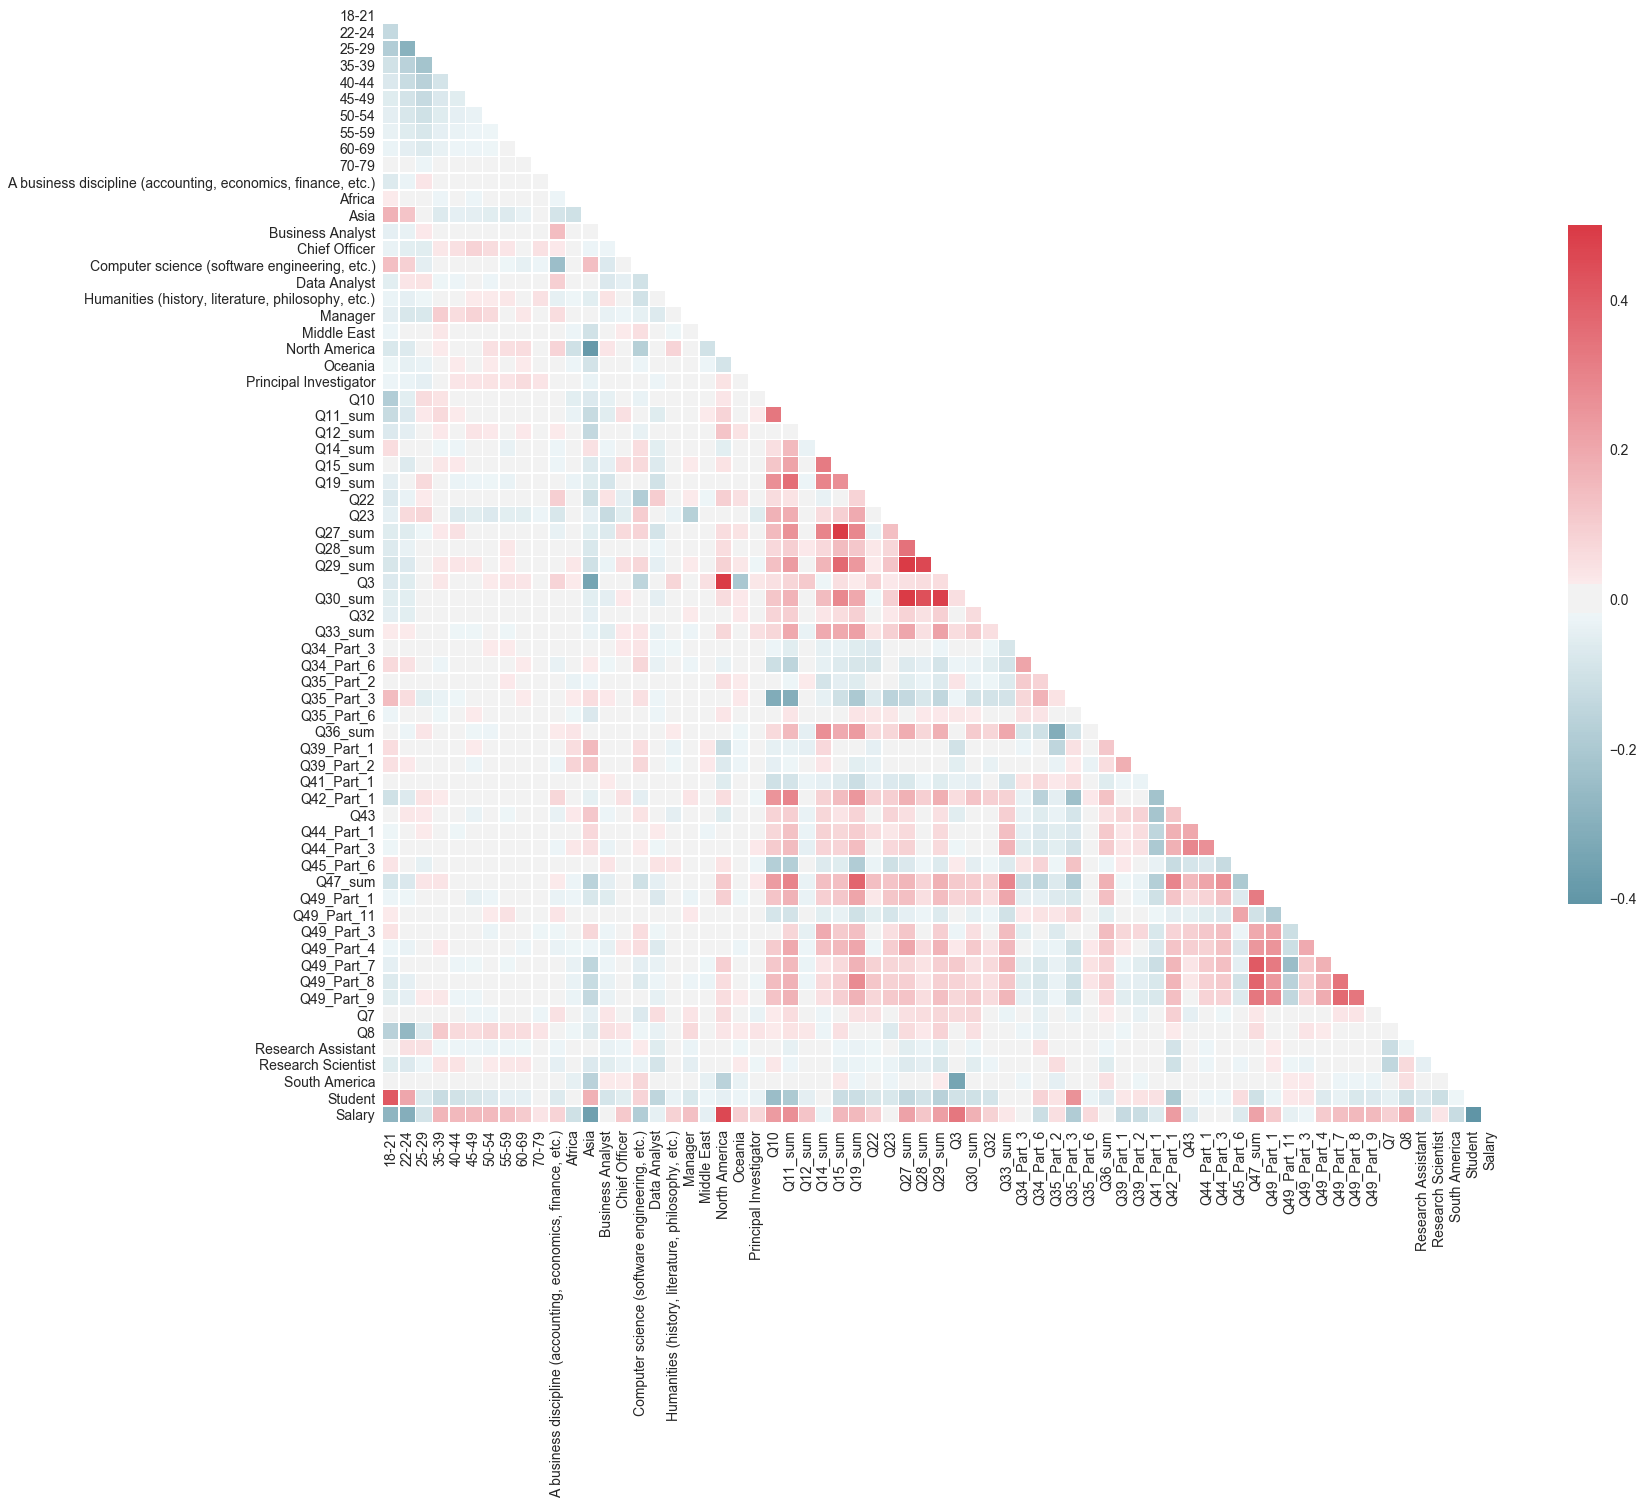

In [153]:
sns.set(style="white", font_scale=1.4)
mask = np.zeros_like(corr_subset, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_subset, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Let's look into the specific correlations between the selected features and the salary. 

In [154]:
corr_subset_Salary = corr_subset['Salary']
indices_subset = corr_subset['Salary'].index

In [155]:
features_edited = []
value_corr_feature_edited = []

for value, index in zip(corr_subset_Salary, indices_subset):
    if abs(value) > 0.2:
        features_edited.append(index)
        value_corr_feature_edited.append(value)

In [156]:
features_edited

['18-21',
 '22-24',
 'Asia',
 'North America',
 'Q10',
 'Q11_sum',
 'Q27_sum',
 'Q29_sum',
 'Q3',
 'Q42_Part_1',
 'Q47_sum',
 'Q8',
 'Student',
 'Salary']

In [157]:
value_corr_feature_edited

[-0.27971696904384863,
 -0.30849809886637014,
 -0.36497722076951145,
 0.4572453162664826,
 0.2348078910990154,
 0.2686864847969615,
 0.21771533172194638,
 0.22605922761884042,
 0.33089364400672533,
 0.23352375771833184,
 0.2190000923649021,
 0.2007669405094973,
 -0.4080742858856483,
 1.0]

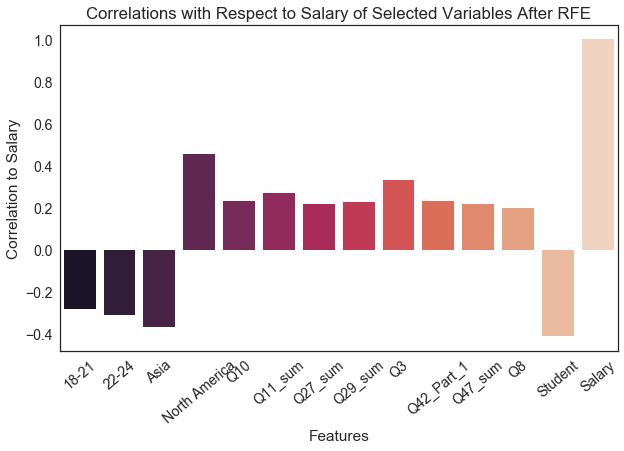

In [158]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=features_edited, y=value_corr_feature_edited, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.title('Correlations with Respect to Salary of Selected Variables After RFE')
plt.xlabel('Features')
plt.ylabel('Correlation to Salary')
plt.show()

Features with the highest correlation: 
- Age group ('18-21', '22-24') are negatively correlated with Salary - makes sense since the younger you are, the less experience you have. Hence, your pay will be less than someone who has more job experience. 
- Q3 (Country) and Continent ('Asia', 'North America') - data scientists working in North America earn more than those in Asia
- Q10 - Do you use ML at work? - if ML is being used at work, then it is positively correlated to salary
- Q11 - Number of tasks done in their respective job - the more responsibilities and roles one has, the higher the pay
- Q27 - Number of cloud computing products used in the last 5 years - the more experience with a variety of cloud computing tools used, the higher the salary
- Q30 - Number of big data and analytics products used in the last 5 years - the more experience with a variety of big data and analytics products used, the higher the salary
- Q29 - Number of database products used - more database products used, higher salary
- Q42_Part_1 - If the models developed are related to revenue of the business, then the individual will be paid more
- Q47_sum - Preference for explaining and intrepreting ML models - paid more if you explain models
- Student - If the individual is a student, then they will be paid less. 

In [159]:
# Assign Salaries_x to the new subset data containing selected features 
Salaries_Y = subset_data['Salary']
Salaries_X = subset_data.drop(['Salary'], axis=1)

# Train Test Split
Salaries_X_train, Salaries_X_test, Salaries_Y_train, Salaries_Y_test = train_test_split(Salaries_X,Salaries_Y,test_size=0.3, random_state=101)


## 3.0 Summary
In this section, new features were created from existing features from the raw data set. A feature selection algorithm, RFE applied on a lasso regularized regression model, was applied to select the ideal features among the newly created ones and among the existing features from the data set. Features were ranked based on their performance on the RFE algorithm and those that ranked the highest were chosen to be used for implementation with the model. 

Feature dimensionality reduction such as PCA was not used as it yielded lower accuracies than keeping all the features in the model. PCA will aid in helping make the data set easier to model by reducing its dimensionality at the expense of explainable variance. Hence, PCA was not chosen for this application. 

# 4.0 Model Implementation

In this project, we will be using four different types of regression algorithms:
- Lasso Linear Regression
- Gradient Boosting Regressor
- Random Forest Regressor
- Support Vector Regressor

Each model will be explained and compared with one another in terms of their accuracies across the folds, average accuracies and variances across the folds. 

A comparison between all models will also be explained in terms of their accuracies and from the perspective of the bias-variance trade-off. 

#### Note:  Error Term
The error terms shown in the bias-variance trade-off graphs depict the error of the SQRT transformed output variable indicated in the feature engineering section of this notebook. The inverse transform of the predicted variables are shown in section 6.0. 

#### Note: Metrics Used
The metrics used in the models are the coefficient of determination $R^{2}$, which is interpreted as the proportion of the variance of the dependent variable (output -salary) and the features. A coefficient of 1 indicates that the salary can be predicted without error from the features. A coefficient of 0 indicates that it cannot be predicted. A coefficient ranging between 0 and 1 indicates the extent to which the salary is predictable from the inputs. A coefficient of 0.1 means that 10% of the variance in the output is predictable from the inputs, and so on. 

Another metric used in the latter sections is the mean squared error (MSE) and the root mean squared error (RMSE). These metrics measure the averages of the square of the errors between the predicted and actual values. Ideally, these values should be minimial and close to zero for perfect prediction accuracy. 

## 4.1 Lasso Linear Regression

### 4.1.1. Model Description, Pros, Cons, and Justification
Lasso linear regression is a form of linear regression which performs L1 regularization (adds penalty equivalent to the absolute value of the magnitude of coefficients). Its minimzation objective is to minimize MSE similar to linear regression in addition to alpha * L1 norm of the value of the coefficients. Doing so allows the algorithm to avoid using large coefficients in the model, which avoids model complexity and placing a lot of emphasis on specific features. Large coefficients will fail to model intricate relations between all features and thus, tend to overfit to select features in the data. 

Pros: 
- Lasso regularization reduces tendency to overfit data by placing a constraint on the coefficients

Cons: 
- Automatic method that does not have many parameters for a data scientist to play with. The only parameter would be alpha which is the constant multipled by the L1 term. 

Justification:
- Linear regression is one of the most commonly used regression techniques in ML. Adding lasso regularization will allow the use of multiple features in the linear regression model with constraint on the coefficients of the regression model. This will aid with the model's application to higher dimensionality, such as the case for this project, by constraining the size of the coefficients in the model. By doing so, the tendency to overfit models by emphasizing certain features are reduced. Lasso regularization seems to be suitable for this data set as it contains multiple features. By adding the L1 norm constraint, certain features will not emphasized over others, thus utilizing all the features in the data set to be used for prediction. 

In this section, we will use a arbitrary (not-tuned) lasso regression to see its performance on the data set. 

In [160]:
model_lasso_lr = Lasso(alpha = 5.0)
result_model_lasso_lr = run_kfold(Salaries_X_train, Salaries_Y_train, model_lasso_lr)

predictions_lasso = model_lasso_lr.predict(Salaries_X_test)
Test_Score_lasso = r2_score(Salaries_Y_test, predictions_lasso)

print ("------------------\nTest Score: " + str(Test_Score_lasso))

Fold 1 accuracy: 0.6015477081668649
Fold 2 accuracy: 0.5454241446945802
Fold 3 accuracy: 0.5595011808540522
Fold 4 accuracy: 0.5636535844418118
Fold 5 accuracy: 0.5469305811713265
Fold 6 accuracy: 0.5390565533247941
Fold 7 accuracy: 0.5416957290091665
Fold 8 accuracy: 0.535243335183615
Fold 9 accuracy: 0.5208692243266205
Fold 10 accuracy: 0.5587274609110127
Mean r2: 0.5512649502083845
Standard Deviation: 0.02068687405101074
Variance: 0.0004279467580023816
------------------
Test Score: 0.527418183966192


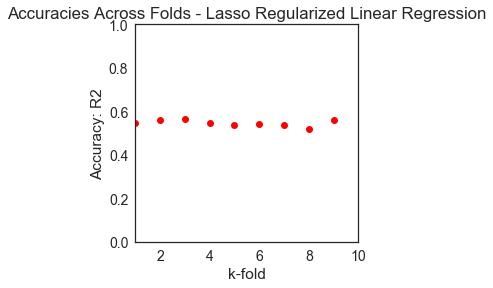

In [161]:
plt.figure(figsize=(4,4))
plt.plot(result_model_lasso_lr['outcomes'], 'ro')
plt.axis([1, 10, 0, 1])
plt.ylabel('Accuracy: R2')
plt.xlabel('k-fold')
plt.title('Accuracies Across Folds - Lasso Regularized Linear Regression')
plt.show()

In [162]:
model_lasso_lr

Lasso(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Across the folds, the average accuracy in the form of $R^{2}$ is 0.55, and the variance is 0.00043. Based on the plot, it does not seem to change significantly. 

The test score of the lasso regularized linear regression is 0.53. 

### 4.1.2. Bias-Variance Trade-off

In this section, we will discuss bias-variance trade-off by changing the value of alpha. 

In [163]:
def bias(y_predict,y):
    y_predict = np.array(y_predict)
    return np.average(np.power((y_predict-y),2))

def variance(y_predict):
    y_predict = np.array(y_predict)
    return np.var(y_predict)


In [164]:
# Bias and variance trade off by tuning hyperparameter alpha
alpha_range = np.arange(0.25, 50, 0.5)
accuracy_lasso_list = []
bias_lasso_list = []
var_lasso_list = []
total_lasso_list = []
err_lasso_regression_test = []
err_lasso_regression_training = []
err_tot_lasso_regression_list = []
score_lasso_regression_test = []
score_lasso_regression_training = []

model_lasso_lr = Lasso(random_state = 42)

for entry in alpha_range:
    model_lasso_lr.set_params(alpha=entry)
    model_lasso_lr.fit(Salaries_X_train, Salaries_Y_train)
    predicted_y_lasso_regressor_test = model_lasso_lr.predict(Salaries_X_test)
    predicted_y_lasso_regressor_train = model_lasso_lr.predict(Salaries_X_train)
    
    # Bias and variance estimate
    bias_variable = bias(predicted_y_lasso_regressor_test, Salaries_Y_test)
    variance_variable = variance(predicted_y_lasso_regressor_test)
    
    bias_lasso_list.append(bias_variable)
    var_lasso_list.append(variance_variable)
    
    total_lasso_regression = bias_variable + variance_variable
    total_lasso_list.append(total_lasso_regression)
    
    # Training and test estimate
    err_lasso_variable_test = mean_squared_error(Salaries_Y_test, predicted_y_lasso_regressor_test)
    err_lasso_variable_train = mean_squared_error(Salaries_Y_train, predicted_y_lasso_regressor_train)
    err_lasso_tot = err_lasso_variable_test+err_lasso_variable_train
    err_lasso_regression_test.append(err_lasso_variable_test)
    err_lasso_regression_training.append(err_lasso_variable_train)
    err_tot_lasso_regression_list.append(err_lasso_tot)

    # Score
    predictions_test = model_lasso_lr.predict(Salaries_X_test)
    predictions_training = model_lasso_lr.predict(Salaries_X_train)
    
    score_lasso_regression_test.append(r2_score(Salaries_Y_test, predictions_test))
    score_lasso_regression_training.append(r2_score(Salaries_Y_train, predictions_training))
    # accuracy = r2_score(Y_test, predictions)

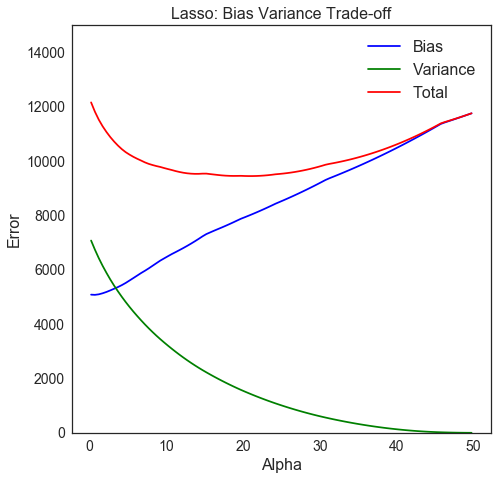

In [165]:
# Plot bias and variance on the test set
plt.figure(figsize=(7.5,7.5))
plt.plot(alpha_range, bias_lasso_list,color = 'b')
plt.plot(alpha_range, var_lasso_list,color = 'g')
plt.plot(alpha_range, total_lasso_list,color = 'r')
plt.legend(['Bias', 'Variance', 'Total'], loc='upper right',fontsize = 16)
plt.title('Lasso: Bias Variance Trade-off',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('Alpha',fontsize = 16)
plt.ylim(0,15000)
plt.show()

From the graph above, we see that as alpha increases, the bias increases and the variance decreases. This indicates that model is underfitting for higher values of alpha. On the other hand, as alpha is small, the bias is small whereas the variance is large, indicating some degree of overfitting. 

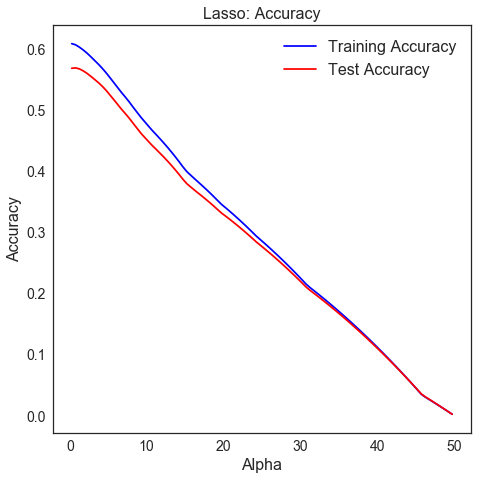

In [166]:
plt.figure(figsize=(7.5,7.5))
plt.plot(alpha_range, score_lasso_regression_training,color = 'b')
plt.plot(alpha_range, score_lasso_regression_test,color = 'r')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right',fontsize = 16)
plt.title('Lasso: Accuracy',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.xlabel('Alpha',fontsize = 16)
# plt.ylim(0,1.5)
plt.show()

From the comparison graph, as alpha increases, the training and test accuracies decrease. Hence, an optimal alpha is expected to be really small. 

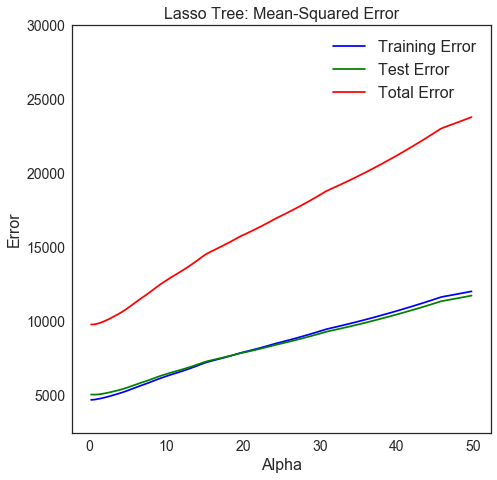

In [167]:
# Plot test error and training error with respect to depth of the tree
plt.figure(figsize=(7.5,7.5))
plt.plot(alpha_range, err_lasso_regression_training,color = 'b')
plt.plot(alpha_range, err_lasso_regression_test,color = 'g')
plt.plot(alpha_range, err_tot_lasso_regression_list,color = 'r')
plt.legend(['Training Error', 'Test Error', 'Total Error'], loc='upper right',fontsize = 16)
plt.title('Lasso Tree: Mean-Squared Error',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('Alpha',fontsize = 16)
plt.ylim(2500,30000)
plt.show()

Based on the error and bias-variance trade off plots, the optimal alpha chosen for lasso should be approximately really small. Higher alphas add a higher penalty to the summation of coefficients which inherently results in a model that fails to represent the data in both training and test sets. Hence, a smaller penalty (smaller alpha) is preferred to achieve better accuracies. 

## 4.2 Gradient Boosting Regressor

### 4.2.1 Model Description, Pros, Cons, and Justification
Gradient Boosting is an additive model in a forward-stage wise fashion. It is an ensemble technique that allows for the optimization of differentiable loss functions. In sklearn, this type of model utilizes a sequence of decision trees. For every iteration, a new tree is fit on the negative gradient of the specified loss function. With each tree added, the model is improved over time. Unlike random forest, each tree built is generally shallow (hence there is high bias but low variance for shallow trees).  

Pros:
- Ensemble technique that builds on its model predecessors
- Since boosted trees are derived by optimizing an objective function, gradient boosting can be used to solve almost all functions that can be differentiated. 

Cons:
- Takes longer due to the fact that trees are built sequentially. 
- More sensitive to overfitting if the data is noisy 
- Harder to tune as there are more parameters unlike in RF. 

Justification: 
- Gradient Boosting Regressors have been known to have one of the best performances in ML. Implementing gradient boosting instead of an individual tree will allow us to sequentially improve the model over time. If a single decision tree were used, it would tend to overfit and fail to predict other data sets. With gradient boosting, we can sequentially build shallow trees and improve upon them. This will provide us with a sufficient model that can handle varying high dimensionality data despite its increased computational complexity, which is suitable for this data set. 

In this section, we will implement a basic gradient boosting regressor prior to tuning. 

In [168]:
model_GB = GradientBoostingRegressor()

In [169]:
model_GB.fit(Salaries_X_train, Salaries_Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [170]:
result_model_GB = run_kfold(Salaries_X_train, Salaries_Y_train, model_GB)

predictions_GB = model_GB.predict(Salaries_X_test)
Test_Score_GB = r2_score(Salaries_Y_test, predictions_GB)

print ("------------------\nTest Score: " + str(Test_Score_GB))

Fold 1 accuracy: 0.690635448811739
Fold 2 accuracy: 0.655785421237803
Fold 3 accuracy: 0.6351170315373812
Fold 4 accuracy: 0.6635334572020162
Fold 5 accuracy: 0.6462131663746142
Fold 6 accuracy: 0.6558760121925205
Fold 7 accuracy: 0.6468340034743296
Fold 8 accuracy: 0.6170076232823569
Fold 9 accuracy: 0.5939200363419977
Fold 10 accuracy: 0.6552098617400757
Mean r2: 0.6460132062194834
Standard Deviation: 0.024999831666534734
Variance: 0.0006249915833550728
------------------
Test Score: 0.625002839881404


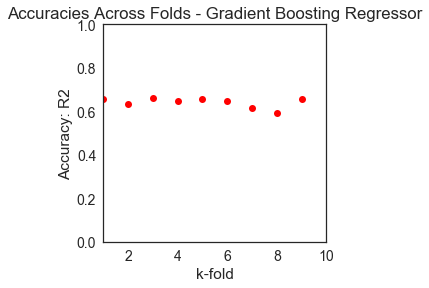

In [171]:
plt.figure(figsize=(4,4))
plt.plot(result_model_GB['outcomes'], 'ro')
plt.axis([1, 10, 0, 1])
plt.ylabel('Accuracy: R2')
plt.xlabel('k-fold')
plt.title('Accuracies Across Folds - Gradient Boosting Regressor')
plt.show()

Across the folds, the average accuracy in the form of $R^{2}$ is 0.65, and the variance is 0.0006. Based on the plot, the accuracies of the folds seems to be fluctuating around 0.625.

The test score of the gradient boosting regressor is 0.63. 

### 4.2.2. Bias-Variance Trade-off

In this section, we will discuss bias-variance trade-off by changing the value of the maximum depth of each sequential tree. 

In [172]:
max_depth_GB = [3, 10, 20, 40, 50] # selected only a few points due to computational complexity
accuracy_GB_list = []
bias_GB_list = []
var_GB_list = []
total_GB_list = []
err_GB_regression_test = []
err_GB_regression_training = []
err_tot_GB_regression_list = []
score_GB_regression_test = []
score_GB_regression_training = []

model_GB = GradientBoostingRegressor()

for entry in max_depth_GB:
    model_GB.set_params(max_depth=entry)
    model_GB.fit(Salaries_X_train, Salaries_Y_train)
    predicted_y_GB_regressor_test = model_GB.predict(Salaries_X_test)
    predicted_y_GB_regressor_train = model_GB.predict(Salaries_X_train)
    
    # Bias and variance estimate
    bias_variable = bias(predicted_y_GB_regressor_test, Salaries_Y_test)
    variance_variable = variance(predicted_y_GB_regressor_test)
    
    bias_GB_list.append(bias_variable)
    var_GB_list.append(variance_variable)
    
    total_GB_regression = bias_variable + variance_variable
    total_GB_list.append(total_GB_regression)
    
    # Training and test estimate
    err_GB_variable_test = mean_squared_error(Salaries_Y_test, predicted_y_GB_regressor_test)
    err_GB_variable_train = mean_squared_error(Salaries_Y_train, predicted_y_GB_regressor_train)
    err_GB_tot = err_GB_variable_test+err_GB_variable_train
    err_GB_regression_test.append(err_GB_variable_test)
    err_GB_regression_training.append(err_GB_variable_train)
    err_tot_GB_regression_list.append(err_GB_tot)

    # Score
    predictions_test = model_GB.predict(Salaries_X_test)
    predictions_training = model_GB.predict(Salaries_X_train)
    
    score_GB_regression_test.append(r2_score(Salaries_Y_test, predictions_test))
    score_GB_regression_training.append(r2_score(Salaries_Y_train, predictions_training))

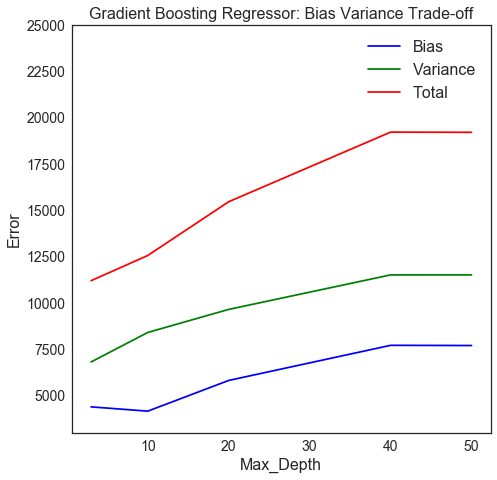

In [173]:
# Plot bias vs variance from changing the depth of the tree
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_GB, bias_GB_list,color = 'b')
plt.plot(max_depth_GB, var_GB_list,color = 'g')
plt.plot(max_depth_GB, total_GB_list,color = 'r')
plt.legend(['Bias', 'Variance', 'Total'], loc='upper right',fontsize = 16)
plt.title('Gradient Boosting Regressor: Bias Variance Trade-off',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('Max_Depth',fontsize = 16)
plt.ylim(3000,25000)
plt.show()

Based on the graph above, we can see that as the depth of the tree of the GB regressor increases, the bias and variance also increase. Noticeably, the bias dips at around 10 depth then increases again. We will look into the accuracy and training graphs to determine the optimal parameters for depth. 

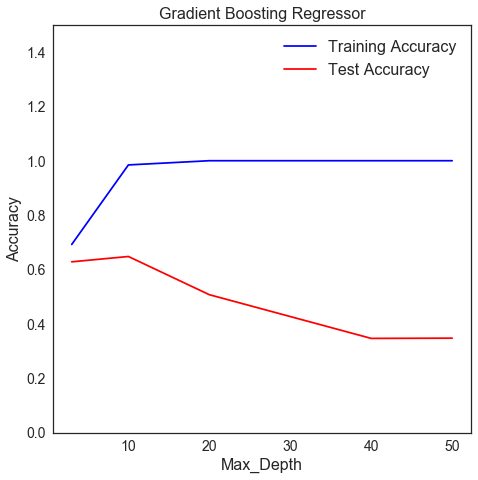

In [174]:
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_GB, score_GB_regression_training,color = 'b')
plt.plot(max_depth_GB, score_GB_regression_test,color = 'r')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right',fontsize = 16)
plt.title('Gradient Boosting Regressor',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.xlabel('Max_Depth',fontsize = 16)
plt.ylim(0,1.5)
plt.show()

From what we can quickly see, as the depth increases, the model will tend to overfit as shown by the training accuracy going closer to 1.0. At the same time, the training accuracy decreases as the depth of the tree increases. An optimal depth of the tree would be to select a tree closer to where the test accuracy is at its maximum or where the total error is at its minimum. 

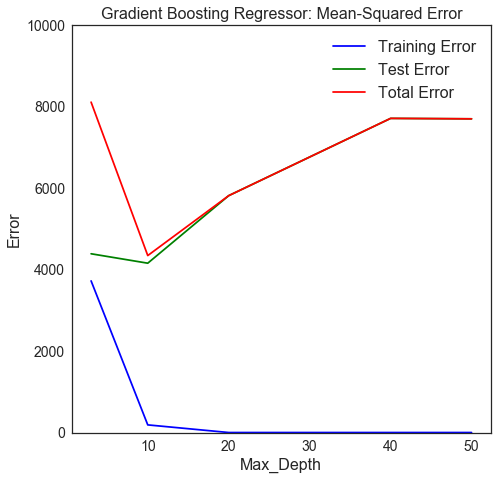

In [175]:
# Plot test error and training error with respect to depth of the tree
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_GB, err_GB_regression_training,color = 'b')
plt.plot(max_depth_GB, err_GB_regression_test,color = 'g')
plt.plot(max_depth_GB, err_tot_GB_regression_list,color = 'r')
plt.legend(['Training Error', 'Test Error', 'Total Error'], loc='upper right',fontsize = 16)
plt.title('Gradient Boosting Regressor: Mean-Squared Error',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('Max_Depth',fontsize = 16)
plt.ylim(0,10000)
plt.show()

A similar observation can be seen in the graph above. As the depth increases, the training error decreases, showing a sign of overfitting. Moreover, as the depth increases, the test error also increases. Hence, an optimal depth would be at a depth of 10 where the total error is at its minimum. 

## 4.3 Random Forest Regressor

### 4.3.1. Model Description, Pros, Cons, and Justification
Random Forest is an ensemble technique that utilizes multiple decision trees. It is a versatile ML method capable of performing both regression and classification. As an ensemble technique, it uses multiple trees which then provide an output for each tree. The output of all the trees are then averaged and this becomes the output of the forest.  


Pros:
- can solve both classification and regression
- can handle data sets with large dimensionality
- can estimate missing data 
- balancing error where classes are imbalanced
- reduces variance and correlation between trees as an ensemble technique

Cons:
- similar to decision trees, it is not that great for regression
- feels like a black box approach
- computationally expensive

Justification:
- As an ensemble technique applied on decision trees, it reduces the variance of decision trees. Thus, making it a better model than a single tree, especially in the context of high dimensionality such as the case in this assignment. Furthermore, due to the nature of using multiple models, it can handle higher dimensional data sets better compared to other models including the decision tree. 

In this section, we will be using a random forest to gauge the performance of the model prior to tuning. 

In [176]:
model_RF = RandomForestRegressor(random_state = 42)
model_RF

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [177]:
model_RF.fit(Salaries_X_train, Salaries_Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [178]:
result_model_RF = run_kfold(Salaries_X_train, Salaries_Y_train, model_RF)

predictions_RF = model_RF.predict(Salaries_X_test)
Test_Score_RF = r2_score(Salaries_Y_test, predictions_RF)

print ("------------------\nTest Score: " + str(Test_Score_RF))

Fold 1 accuracy: 0.6444067870620745
Fold 2 accuracy: 0.6081408755909123
Fold 3 accuracy: 0.6318993942926195
Fold 4 accuracy: 0.6544321099318564
Fold 5 accuracy: 0.6055487872829608
Fold 6 accuracy: 0.639819771685312
Fold 7 accuracy: 0.6013860319774439
Fold 8 accuracy: 0.5629734664312249
Fold 9 accuracy: 0.5475842897509242
Fold 10 accuracy: 0.6193255732382326
Mean r2: 0.6115517087243562
Standard Deviation: 0.03285485624371929
Variance: 0.0010794415787954606
------------------
Test Score: 0.594172856815746


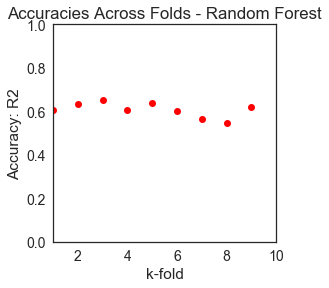

In [179]:
plt.figure(figsize=(4,4))
plt.plot(result_model_RF['outcomes'], 'ro')
plt.axis([1, 10, 0, 1])
plt.ylabel('Accuracy: R2')
plt.xlabel('k-fold')
plt.title('Accuracies Across Folds - Random Forest')
plt.show()

Across the folds, the average accuracy in the form of $R^{2}$ is 0.61, and the variance is 0.0011. Based on the plot above, the accuracies seems to be fluctuating around 0.60. 

The test score of the random forest regressor is 0.59.

### 4.3.2. Bias-Variance Trade-off

In this section, we will discuss bias-variance trade-off by changing the value of max_depth of the trees in the forest.

In [180]:
max_depth_RF_regression = np.arange(2,50)
accuracy_RF_list = []
bias_RF_list = []
var_RF_list = []
total_RF_list = []
err_RF_regression_test = []
err_RF_regression_training = []
err_tot_RF_regression_list = []
score_RF_regression_test = []
score_RF_regression_training = []
score_RF_r2_score = []

model_RF = RandomForestRegressor(random_state = 42)

for entry in max_depth_RF_regression:
    model_RF.set_params(max_depth=entry)
    model_RF.fit(Salaries_X_train, Salaries_Y_train)
    predicted_y_RF_regressor_test = model_RF.predict(Salaries_X_test)
    predicted_y_RF_regressor_train = model_RF.predict(Salaries_X_train)
    
    # Bias and variance estimate
    bias_variable = bias(predicted_y_RF_regressor_test, Salaries_Y_test)
    variance_variable = variance(predicted_y_RF_regressor_test)
    
    bias_RF_list.append(bias_variable)
    var_RF_list.append(variance_variable)
    
    total_RF_regression = bias_variable + variance_variable
    total_RF_list.append(total_RF_regression)
    
    # Training and test estimate
    err_RF_variable_test = mean_squared_error(Salaries_Y_test, predicted_y_RF_regressor_test)
    err_RF_variable_train = mean_squared_error(Salaries_Y_train, predicted_y_RF_regressor_train)
    err_RF_tot = err_RF_variable_test+err_RF_variable_train
    err_RF_regression_test.append(err_RF_variable_test)
    err_RF_regression_training.append(err_RF_variable_train)
    err_tot_RF_regression_list.append(err_RF_tot)

    # Score
    predictions_test = model_RF.predict(Salaries_X_test)
    predictions_training = model_RF.predict(Salaries_X_train)
    
    score_RF_regression_test.append(r2_score(Salaries_Y_test, predictions_test))
    score_RF_regression_training.append(r2_score(Salaries_Y_train, predictions_training))

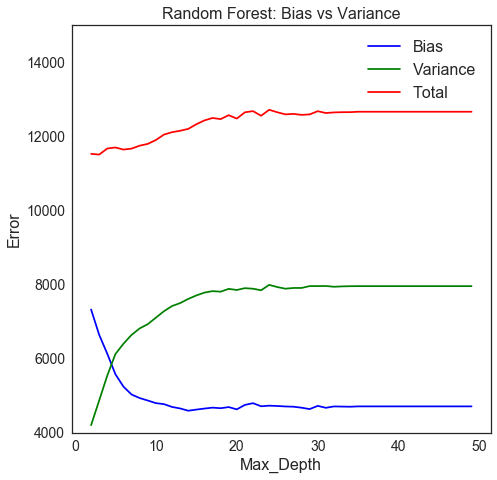

In [181]:
# Plot bias vs variance from changing the depth of the tree
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_RF_regression, bias_RF_list,color = 'b')
plt.plot(max_depth_RF_regression, var_RF_list,color = 'g')
plt.plot(max_depth_RF_regression, total_RF_list,color = 'r')
plt.legend(['Bias', 'Variance', 'Total'], loc='upper right',fontsize = 16)
plt.title('Random Forest: Bias vs Variance',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('Max_Depth',fontsize = 16)
plt.ylim(4000, 15000)
plt.show()

From the bias-variance graph, we see that as the depth increases, the bias decreases and the variance increases. The optimal depth of the random forest then is the region where the total error is at its minimum as we will see in the following graphs. 

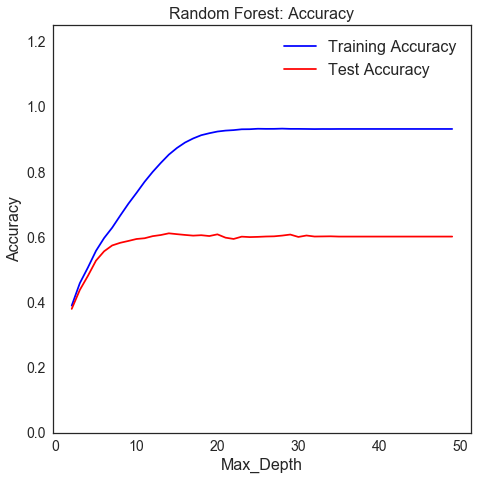

In [182]:
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_RF_regression, score_RF_regression_training,color = 'b')
plt.plot(max_depth_RF_regression, score_RF_regression_test,color = 'r')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right',fontsize = 16)
plt.title('Random Forest: Accuracy',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.xlabel('Max_Depth',fontsize = 16)
plt.ylim(0,1.25)
plt.show()

Based on the graph above, as the depth of the tree increases, the accuracies also increases. However, it is seen that as a certain depth of around 20 or more, the training accuracies tend to be close 1.0 which indicates some extent of overfitting. 

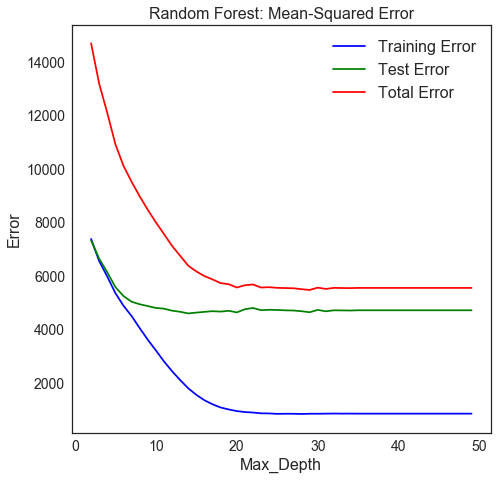

In [183]:
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_RF_regression, err_RF_regression_training,color = 'b')
plt.plot(max_depth_RF_regression, err_RF_regression_test,color = 'g')
plt.plot(max_depth_RF_regression, err_tot_RF_regression_list,color = 'r')
plt.legend(['Training Error', 'Test Error', 'Total Error'], loc='upper right',fontsize = 16)
plt.title('Random Forest: Mean-Squared Error',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('Max_Depth',fontsize = 16)
#plt.ylim(0,0.01)
plt.show()

Based on the graph above, the optimal depth for the forest would be the parameter that yields the minimum total error, which is approximately around 15. As the depth becomes greater than 15, the training error goes to zero while the test error remains constant at a fixed error. Thus, indicating that the model is overfitting. 

## 4.4 Epsilon-Support Vector Regression

### 4.4.1. Model Description, Pros, Cons, and Justification
Support Vector Regression is a supervised ML algorithm that can be employed for both classification and regression. SVRs are based on the idea of finding a hyperplane that best divides the set into classes. In its regression case, SVR is applied to continuous values instead of classification which is for SVM. In simple regression, we try to minimize an objective function, typically MSE. In SVR, we try to fit the error within a certain threshold, which is defined with a hyperplane. 

Pros:
- High accuracy 
- Typically works better on smaller cleaner data sets
- Can apply different types of kernels (to fit hyperplane) to aid with complicated models 

Cons: 
- Not suited for larger data sets as the training time may be long
- Less effective on noiser datasets with overlapping data. 

Justification:
- While SVMs are typically used in classification models, SVR (the regression variant of SVM) can also be used for regression applications. With different types of kernels available, SVMs can fit complicated data with the use of kernels such as poly (if it looks like a polynomial), linear, or even with a radial basis function.
- Given this data set, we can try a variety of kernels to see if the SVR will produce a reasonable accuracy given the high dimensionality data provided. 

For now, we will try a SVR with a linear kernel without tuning to see its performance on the data set. 

In [184]:
model_SVR = SVR(kernel = 'linear')
model_SVR

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [185]:
model_SVR.fit(Salaries_X_train, Salaries_Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [186]:
result_model_SVR = run_kfold(Salaries_X_train, Salaries_Y_train, model_SVR)

predictions_SVR = model_SVR.predict(Salaries_X_test)
Test_Score_SVR = r2_score(Salaries_Y_test, predictions_SVR)

print ("------------------\nTest Score: " + str(Test_Score_SVR))

Fold 1 accuracy: 0.6523200564607403
Fold 2 accuracy: 0.6015131167783861
Fold 3 accuracy: 0.5975210651979488
Fold 4 accuracy: 0.5975236742718055
Fold 5 accuracy: 0.5838921269138905
Fold 6 accuracy: 0.595527862604672
Fold 7 accuracy: 0.5672697314691109
Fold 8 accuracy: 0.5858518107101099
Fold 9 accuracy: 0.5679846159650358
Fold 10 accuracy: 0.6141461506305033
Mean r2: 0.5963550211002203
Standard Deviation: 0.023227354874374606
Variance: 0.0005395100144601338
------------------
Test Score: 0.5680338615212682


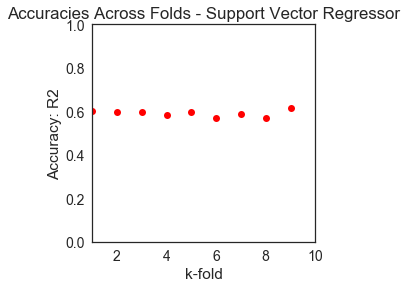

In [187]:
plt.figure(figsize=(4,4))
plt.plot(result_model_SVR['outcomes'], 'ro')
plt.axis([1, 10, 0, 1])
plt.ylabel('Accuracy: R2')
plt.xlabel('k-fold')
plt.title('Accuracies Across Folds - Support Vector Regressor')
plt.show()

Across the folds, the average accuracy in the form of $R^{2}$ is 0.60, and the variance is 0.0005. Based on the plot above, the accuracies of the folds seems to be fluctuating around 0.6.

The test score of the random forest regressor is 0.57.

### 4.4.2. Bias-Variance Trade-off

In this section, we will discuss bias-variance trade-off by changing the value of C of SVR, which corresponds to the penalty of the error term. 

In [188]:
C_SVR_regression = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
accuracy_SVR_list = []
bias_SVR_list = []
var_SVR_list = []
total_SVR_list = []
err_SVR_regression_test = []
err_SVR_regression_training = []
err_tot_SVR_regression_list = []
score_SVR_regression_test = []
score_SVR_regression_training = []
score_SVR_r2_score = []

model_SVR = SVR(kernel = 'linear')

for entry in C_SVR_regression:
    model_SVR.set_params(C=entry)
    model_SVR.fit(Salaries_X_train, Salaries_Y_train)
    predicted_y_SVR_regressor_test = model_SVR.predict(Salaries_X_test)
    predicted_y_SVR_regressor_train = model_SVR.predict(Salaries_X_train)
    
    # Bias and variance estimate
    bias_variable = bias(predicted_y_SVR_regressor_test, Salaries_Y_test)
    variance_variable = variance(predicted_y_SVR_regressor_test)
    
    bias_SVR_list.append(bias_variable)
    var_SVR_list.append(variance_variable)
    
    total_SVR_regression = bias_variable + variance_variable
    total_SVR_list.append(total_SVR_regression)
    
    # Training and test estimate
    err_SVR_variable_test = mean_squared_error(Salaries_Y_test, predicted_y_SVR_regressor_test)
    err_SVR_variable_train = mean_squared_error(Salaries_Y_train, predicted_y_SVR_regressor_train)
    err_SVR_tot = err_SVR_variable_test+err_SVR_variable_train
    err_SVR_regression_test.append(err_SVR_variable_test)
    err_SVR_regression_training.append(err_SVR_variable_train)
    err_tot_SVR_regression_list.append(err_SVR_tot)

    # Score
    predictions_test = model_SVR.predict(Salaries_X_test)
    predictions_training = model_SVR.predict(Salaries_X_train)
    
    score_SVR_regression_test.append(r2_score(Salaries_Y_test, predictions_test))
    score_SVR_regression_training.append(r2_score(Salaries_Y_train, predictions_training))

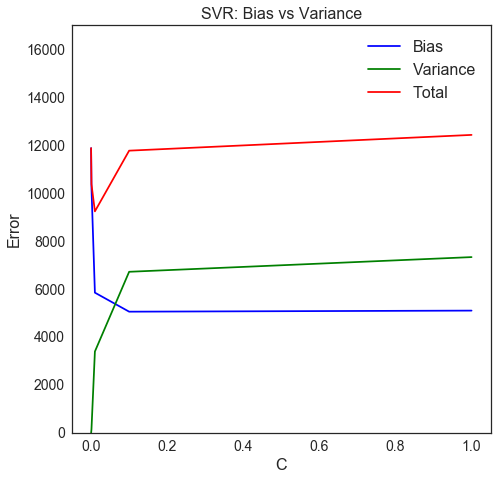

In [189]:
# Plot bias vs variance from changing the depth of the tree
plt.figure(figsize=(7.5,7.5))
plt.plot(C_SVR_regression, bias_SVR_list,color = 'b')
plt.plot(C_SVR_regression, var_SVR_list,color = 'g')
plt.plot(C_SVR_regression, total_SVR_list,color = 'r')
plt.legend(['Bias', 'Variance', 'Total'], loc='upper right',fontsize = 16)
plt.title('SVR: Bias vs Variance',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('C',fontsize = 16)
plt.ylim(0, 17000)
plt.show()

Based on the bias-variance curve, as the C value is increased, the bias curve decreases, while the variance increases. This presents a local minimum at the total error of the model at lower values of C. We will look into this in detail in the following graphs. 

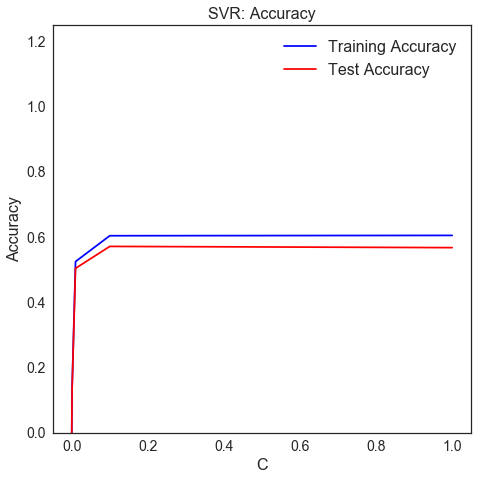

In [190]:
plt.figure(figsize=(7.5,7.5))
plt.plot(C_SVR_regression, score_SVR_regression_training,color = 'b')
plt.plot(C_SVR_regression, score_SVR_regression_test,color = 'r')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right',fontsize = 16)
plt.title('SVR: Accuracy',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.xlabel('C',fontsize = 16)
plt.ylim(0,1.25)
plt.show()

The training and testing accuracies increased as C increased but reached a steady constant value past 0.1. This may indicate some extent of overfitting despite the training accuracies not being close to 1.0. This may be inherent of the data provided as there could be potential overlap in the data that prevents the SVR model to properly split the data using the linear kernel provided. 

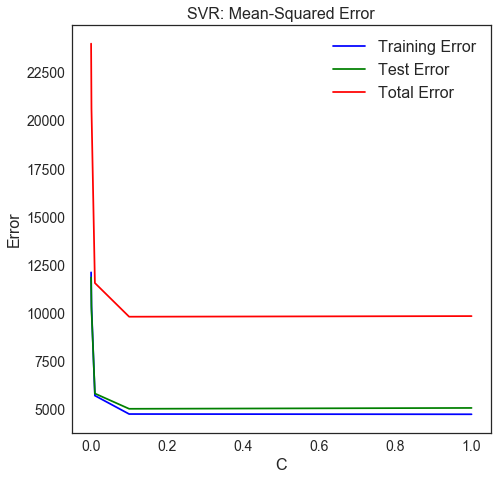

In [191]:
plt.figure(figsize=(7.5,7.5))
plt.plot(C_SVR_regression, err_SVR_regression_training,color = 'b')
plt.plot(C_SVR_regression, err_SVR_regression_test,color = 'g')
plt.plot(C_SVR_regression, err_tot_SVR_regression_list,color = 'r')
plt.legend(['Training Error', 'Test Error', 'Total Error'], loc='upper right',fontsize = 16)
plt.title('SVR: Mean-Squared Error',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('C',fontsize = 16)
#plt.ylim(0,0.01)
plt.show()

Based on the errors for both training and testing, the smallest amount of error occured when C was 0.1 and reached a steady value as C is increased. Based on the MSE graph, there seems to be a fixed error occuring for both the training and test sets which indicate some characteristics of the SVR model that prevent it from properly representing the data. This can be attributed to the kernel selected for the model or from noisy or overlapping data points in the data set. 

### 4.5 Comparison

In this section, we present plots that compare the average accuracies, variances and test scores across the four different models used in this assignment. 

In [192]:
model = ['Lasso Linear', 'GB', 'RF', 'SVR']
mean_r2_folds = [result_model_lasso_lr['mean'], result_model_GB['mean'], result_model_RF['mean'], result_model_SVR['mean']]
var_r2_folds = [result_model_lasso_lr['var'], result_model_GB['var'], result_model_RF['var'], result_model_SVR['var']]
test_scores = [Test_Score_lasso, Test_Score_GB, Test_Score_RF, Test_Score_SVR]


In [193]:
mean_r2_folds

[0.5512649502083845,
 0.6460132062194834,
 0.6115517087243562,
 0.5963550211002203]

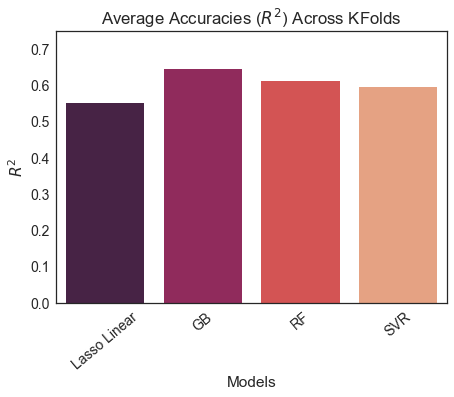

In [194]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=model, y=mean_r2_folds, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.title('Average Accuracies ($R^{2}$) Across KFolds')
plt.xlabel('Models')
plt.ylabel('$R^{2}$')
plt.ylim(0, 0.75)
plt.show()

Based on the average accuracies across the folds, gradient boosting regressor yielded the best accuracies followed by RF and SVR. The worst performing ML model among those selected was the lasso linear regression.  

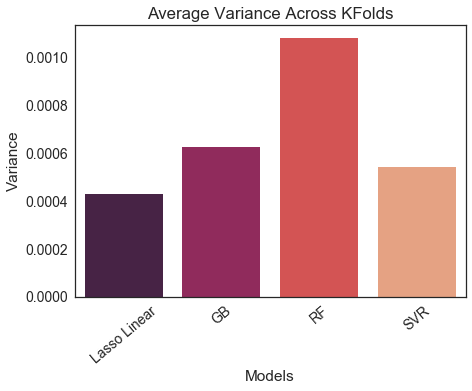

In [195]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=model, y=var_r2_folds, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.title('Average Variance Across KFolds')
plt.xlabel('Models')
plt.ylabel('Variance')
# plt.ylim(0, 1)
plt.show()

Based on the variance plots, lasso linear regression had the least variance followed by SVR. RF had the highest variance which was expected as decision trees tends to overfit the data. Random Forest mitigates this using multiple trees and would have yielded a lower variance than if a single DT was used alone. 

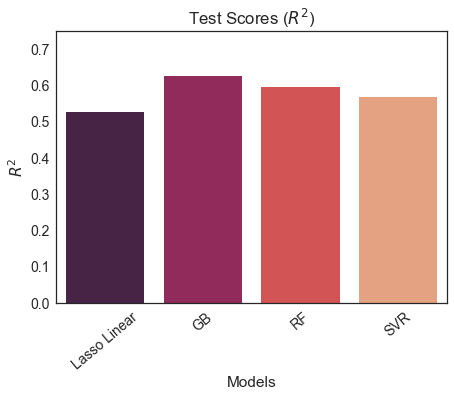

In [196]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x=model, y=test_scores, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.title('Test Scores ($R^{2}$)')
plt.xlabel('Models')
plt.ylabel('$R^{2}$')
plt.ylim(0, 0.75)
plt.show()

In [197]:
test_scores

[0.527418183966192, 0.625002839881404, 0.594172856815746, 0.5680338615212682]

Based on the test scores, gradient boosting regressor achieved the highest accuracy overall, followed by random forest then SVR. 

### Best Model Performance Without Tuning: Gradient Boosting Regressor (GB)

While considering bias and variance between the models from the graphs presented above in each respective section as well as the accuracies attained from k-fold and testing, GB was selected as the best model as it achieved a high average training accuracy, relatively low variance compared to other models used, and a decent test score accuracy.  

Looking at the bias-variance trade-off for all models, ideal models to use would be SVR and GB as they exhibited a low bias and low variance for specific hyperparameters in their respective models. Due to the higher accuracy achieved by GB, it was selected as the model with the best performance prior to tuning. 

# 5.0 Model Tuning

In this section, we will tune each of the presented models in section 4.0 using GridSearchCV. The GridSearch sections were commented out as part of the submission. The output of the GridSearch was stored to be used past this section/re-run this section. 

We will be comparing the average R2 value to determine optimal parameters for each model in the GridSearchCV. 

Once optimal hyperparameters were found, each of the models would be compared to one another to determine the optimal model for this data set by using R2 and RMSE using the test set (unseen data). 

In [198]:
# Random State of 101 was selected for repeatability
Salaries_X_train, Salaries_X_test, Salaries_Y_train, Salaries_Y_test = train_test_split(Salaries_X,Salaries_Y,test_size=0.3, random_state=101)


## 5.1 Lasso Linear Regression Tuning

For tuning the lasso regression, the hyperparameter alpha, representing the scalar penalty to the L1 norm to the coefficients of linear regression, is varied to different amounts to see the best performance. The GridSearchCV code is commented out as per the assignment instructions. 

In [202]:
# model_lasso_lr = Lasso()
# lasso_param = {
#     "alpha": [0.0001, 0.01, 0.1, 0.5, 1, 2.5, 5, 7.5, 10, 20, 50]
# }

# # cv of 5 was chosen to reduce computational time
# cv_model_lasso = GridSearchCV(model_lasso_lr, cv = 5, param_grid = lasso_param, n_jobs=-1)
# cv_model_lasso.fit(Salaries_X_train, Salaries_Y_train)

# print('Optimal parameters found: ')
# print(cv_model_lasso.best_params_)
# print(cv_model_lasso.best_estimator_)

# optimal_lasso = cv_model_lasso.best_estimator_

# result_model_lasso_tuned = run_kfold(Salaries_X_train, Salaries_Y_train, optimal_lasso)
# predictions_lasso_tuned = optimal_lasso.predict(Salaries_X_test)
# Test_Score_lasso_tuned = r2_score(Salaries_Y_test, predictions_lasso_tuned)

# print("Test Score: ")
# print(Test_Score_lasso_tuned)


Optimal parameters found: 
{'alpha': 0.0001}
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Fold 1 accuracy: 0.6504345294104372
Fold 2 accuracy: 0.6025962109663692
Fold 3 accuracy: 0.6005492421536337
Fold 4 accuracy: 0.6008797269644726
Fold 5 accuracy: 0.5918968116669716
Fold 6 accuracy: 0.6035166198297162
Fold 7 accuracy: 0.5794170312695748
Fold 8 accuracy: 0.5805174632945632
Fold 9 accuracy: 0.5692045131339875
Fold 10 accuracy: 0.6189660174783991
Mean r2: 0.5997978166168124
Standard Deviation: 0.021772406431615352
Variance: 0.00047403768182344554
Test Score: 
0.5686107586497983


In [203]:
# # Results for training set
# means_lasso = cv_model_lasso.cv_results_['mean_test_score']
# stds_lasso = cv_model_lasso.cv_results_['std_test_score']

# # Print all training cases
# for mean, std, params in zip(means_lasso, stds_lasso, cv_model_lasso.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))


0.599 (+/-0.030) for {'alpha': 0.0001}
0.599 (+/-0.030) for {'alpha': 0.01}
0.599 (+/-0.030) for {'alpha': 0.1}
0.598 (+/-0.030) for {'alpha': 0.5}
0.595 (+/-0.031) for {'alpha': 1}
0.582 (+/-0.029) for {'alpha': 2.5}
0.549 (+/-0.027) for {'alpha': 5}
0.512 (+/-0.024) for {'alpha': 7.5}
0.474 (+/-0.023) for {'alpha': 10}
0.341 (+/-0.023) for {'alpha': 20}
0.002 (+/-0.007) for {'alpha': 50}


In [199]:
# Final Result of GridSearchCV
optimal_lasso = Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

result_model_lasso_tuned = run_kfold(Salaries_X_train, Salaries_Y_train, optimal_lasso)
predictions_lasso_tuned = optimal_lasso.predict(Salaries_X_test)
Test_Score_lasso_tuned = r2_score(Salaries_Y_test, predictions_lasso_tuned)

print("Test Score: ")
print(Test_Score_lasso_tuned)


Fold 1 accuracy: 0.6504345294104372
Fold 2 accuracy: 0.6025962109663692
Fold 3 accuracy: 0.6005492421536337
Fold 4 accuracy: 0.6008797269644726
Fold 5 accuracy: 0.5918968116669716
Fold 6 accuracy: 0.6035166198297162
Fold 7 accuracy: 0.5794170312695748
Fold 8 accuracy: 0.5805174632945632
Fold 9 accuracy: 0.5692045131339875
Fold 10 accuracy: 0.6189660174783991
Mean r2: 0.5997978166168124
Standard Deviation: 0.021772406431615352
Variance: 0.00047403768182344554
Test Score: 
0.5686107586497983


In [200]:
# Compare to old Lasso linear regression model: 
print("Average Accuracy Across Folds Before Tuning: ")
print(result_model_lasso_lr['mean'])
print("Average Variance Across Folds Before Tuning: ")
print(result_model_lasso_lr['var'])
print("Test Score Before Tuning: ")
print(Test_Score_lasso)
print("\n")
print("Average Accuracy Across Folds After Tuning: ")
print(result_model_lasso_tuned['mean'])
print("Average Variance Across Folds After Tuning: ")
print(result_model_lasso_tuned['var'])
print("Test Score After Tuning: ")
print(Test_Score_lasso_tuned)

Average Accuracy Across Folds Before Tuning: 
0.5512649502083845
Average Variance Across Folds Before Tuning: 
0.0004279467580023816
Test Score Before Tuning: 
0.527418183966192


Average Accuracy Across Folds After Tuning: 
0.5997978166168124
Average Variance Across Folds After Tuning: 
0.00047403768182344554
Test Score After Tuning: 
0.5686107586497983


Based on a comparison before and after tuning, the accuracies after tuning increased from 0.55 to 0.60 and the variance increased marginally by around 0.00003. The test scores increased from 0.53 to 0.57 showing some improvement from the tuning process. 

## 5.2 Gradient Booting Regression Tuning

For tuning the gradient boosting regression, hyperparameters such as the learning rate, number of estimators (number of boosting stages to perform), and the maximum depths of the individual trees are varied using GridSearchCV. 

The learning rate parameter defines the contribution of each tree in the series of iterations. The number of estimators defines the number of boosting stages or iterations to perform. Gradient boosting is fairly robust to over-fitting, hence a larger number usually results in better performance. On the other hand, training deeper trees may allow better performance but may also potentially overfit to the data. Hence, a trade-off must be made between each of the three hyperparameters. 

In [393]:
# model_GB = GradientBoostingRegressor()
# GB_param = {    
#         "learning_rate": [0.1, 0.5, 1, 5],
#         "n_estimators": [50, 100, 250],
#         "max_depth": [3, 20, 30, 40 , 50],
#         }


# cv_model_GB = GridSearchCV(model_GB, cv = 5, param_grid = GB_param, n_jobs=-1, verbose=100)
# cv_model_GB.fit(Salaries_X_train, Salaries_Y_train)

# print('Optimal parameters found: ')
# print(cv_model_GB.best_params_)
# print(cv_model_GB.best_estimator_)

# optimal_GB = cv_model_GB.best_estimator_

# result_model_GB_tuned = run_kfold(Salaries_X_train, Salaries_Y_train, optimal_GB)
# predictions_GB_tuned = optimal_GB.predict(Salaries_X_test)
# Test_Score_GB_tuned = r2_score(Salaries_Y_test, predictions_GB_tuned)

# print("Test Score: ")
# print(Test_Score_GB_tuned)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to new file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.6s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.7s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  4.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:  4.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:  7.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 10.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed: 10.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 11.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 11.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed: 12.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 12.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 13.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed: 13.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed: 13.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 13.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 14.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 14.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed: 14.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 14.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed: 14.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed: 14.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed: 14.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed: 14.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed: 14.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed: 14.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 209 tasks      | elapsed: 14.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed: 15.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 223 tasks      | elapsed: 15.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed: 15.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed: 15.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed: 17.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 251 tasks      | elapsed: 18.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 20.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 20.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 24.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 25.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed: 29.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed: 29.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831494858960\5076-1831496821168-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

C:\Users\cruzfran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:675: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
C:\Users\cruzfran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:675: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Optimal parameters found: 
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
Fold 1 accuracy: 0.723641437592061
Fold 2 accuracy: 0.694580056156094
Fold 3 accuracy: 0.6727661580714408
Fold 4 accuracy: 0.7046943200071751
Fold 5 accuracy: 0.6732555325639918
Fold 6 accuracy: 0.7007577592707616
Fold 7 accuracy: 0.6819431379014218
Fold 8 accuracy: 0.6418202241333038
Fold 9 accuracy: 0.628461865965231
Fold 10 accuracy: 0.6929486928318831
Mean r2: 0.6814869184493364
Standard Deviation: 0.027420563714928674
Variance: 0.000751887314444463


In [394]:
# # Results for training set
# means_GB = cv_model_GB.cv_results_['mean_test_score']
# stds_GB = cv_model_GB.cv_results_['std_test_score']

# # Print all training cases
# for mean, std, params in zip(means_GB, stds_GB, cv_model_GB.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))


0.614 (+/-0.030) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.647 (+/-0.033) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.682 (+/-0.036) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
0.465 (+/-0.093) for {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 50}
0.465 (+/-0.091) for {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}
0.465 (+/-0.093) for {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 250}
0.322 (+/-0.069) for {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 50}
0.320 (+/-0.070) for {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 100}
0.322 (+/-0.072) for {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 250}
0.322 (+/-0.076) for {'learning_rate': 0.1, 'max_depth': 40, 'n_estimators': 50}
0.318 (+/-0.069) for {'learning_rate': 0.1, 'max_depth': 40, 'n_estimators': 100}
0.317 (+/-0.071) for {'learning_rate': 0.1, 'max_depth': 40, 'n_estimators': 250}
0.321 (+/-0.076) for {'

In [201]:
# Final Result of GridSearchCV
optimal_GB = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

result_model_GB_tuned = run_kfold(Salaries_X_train, Salaries_Y_train, optimal_GB)
predictions_GB_tuned = optimal_GB.predict(Salaries_X_test)
Test_Score_GB_tuned = r2_score(Salaries_Y_test, predictions_GB_tuned)

print("Test Score: ")
print(Test_Score_GB_tuned)


Fold 1 accuracy: 0.7244769834021276
Fold 2 accuracy: 0.6938229413197189
Fold 3 accuracy: 0.6734651767647699
Fold 4 accuracy: 0.7049950773201848
Fold 5 accuracy: 0.6730494783500138
Fold 6 accuracy: 0.7007054264712076
Fold 7 accuracy: 0.6816388815720442
Fold 8 accuracy: 0.6406887348808836
Fold 9 accuracy: 0.627813039110393
Fold 10 accuracy: 0.6929332686973451
Mean r2: 0.681358900788869
Standard Deviation: 0.027810252985948573
Variance: 0.0007734101711424616
Test Score: 
0.6586583420579306


In [202]:
# Compare to old Lasso linear regression model: 
print("Average Accuracy Across Folds Before Tuning: ")
print(result_model_GB['mean'])
print("Average Variance Across Folds Before Tuning: ")
print(result_model_GB['var'])
print("Test Score Before Tuning: ")
print(Test_Score_GB)
print("\n")
print("Average Accuracy Across Folds After Tuning: ")
print(result_model_GB_tuned['mean'])
print("Average Variance Across Folds After Tuning: ")
print(result_model_GB_tuned['var'])
print("Test Score After Tuning: ")
print(Test_Score_GB_tuned)

Average Accuracy Across Folds Before Tuning: 
0.6460132062194834
Average Variance Across Folds Before Tuning: 
0.0006249915833550728
Test Score Before Tuning: 
0.625002839881404


Average Accuracy Across Folds After Tuning: 
0.681358900788869
Average Variance Across Folds After Tuning: 
0.0007734101711424616
Test Score After Tuning: 
0.6586583420579306


Comparing before and after tuning, the accuracy across the folds increased from 0.65 to 0.68 while the average variance increased marginally from 0.0006 to 0.0008. The test score improved from 0.57 to 0.66 after tuning. 

## 5.3 Random Forest Regressor Tuning

For tuning the random forest regression, the hyperparameter n_estimators, min_samples_leaf, max_depth, and max_features are varied to determine the optimal parameters for the model. N_estimators represent the number of trees to grow in the forest. Higher n_estimators tend to lead to higher results at the cost of higher computational time. Min_samples leaf is the minimum number of samples required to split an internal node. Max_depth is the depth of each tree in the forest. Higher depths allow for a better accuracy but may potentially overfit. Max_features parameter determines the number of features to consider when looking for the best split in the nodes. 

In [292]:
# model_RF = RandomForestRegressor()
# RF_param = { 
#         "n_estimators" : [10, 20, 40, 80, 100],
#         "min_samples_leaf": [1, 2, 4, 8, 10],
#         "max_depth": [10, 20, 30, 40 , 50, None],
#         "max_features" : ["auto", "sqrt", "log2"],

#         }


# cv_model_RF = GridSearchCV(model_RF, cv = 5, param_grid = RF_param, n_jobs=-1, verbose=100)
# cv_model_RF.fit(Salaries_X_train, Salaries_Y_train)

# print('Optimal parameters found: ')
# print(cv_model_RF.best_params_)
# print(cv_model_RF.best_estimator_)

# optimal_RF = cv_model_RF.best_estimator_

# result_model_RF_tuned = run_kfold(Salaries_X_train, Salaries_Y_train, optimal_RF)
# predictions_RF_tuned = optimal_RF.predict(Salaries_X_test)
# Test_Score_RF_tuned = r2_score(Salaries_Y_test, predictions_RF_tuned)

# print("Test Score: ")
# print(Test_Score_RF_tuned)


Fitting 5 folds for each of 450 candidates, totalling 2250 fits
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to new file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sh

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.4s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.7s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.8s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   11.8s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   12.9s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   16.4s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:   16.6s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   20.1s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   21.1s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   23.6s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   23.8s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   28.3s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   28.3s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   30.9s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   31.0s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 127 tasks      | elapsed:   35.3s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   35.4s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   37.0s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:   38.3s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   38.3s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed:   39.9s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   41.0s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:   41.2s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 211 tasks      | elapsed:   42.2s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   42.2s
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:   43.5s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 229 tasks      | elapsed:   43.6s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 245 tasks      | elapsed:   44.8s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:   45.7s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   45.8s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   46.9s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   46.9s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   47.6s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:   47.7s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   48.6s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   48.6s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:   49.4s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 321 tasks      | elapsed:   49.6s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   50.1s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
[Parallel(n_jobs=-1)]: Done 337 tasks      | elapsed:   50.1s
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 355 tasks      | elapsed:   51.3s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed:   52.1s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   52.1s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:   54.7s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:  1.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  1.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  1.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 427 tasks      | elapsed:  1.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 441 tasks      | elapsed:  1.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 455 tasks      | elapsed:  1.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:  1.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 469 tasks      | elapsed:  1.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:  1.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:  1.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 485 tasks      | elapsed:  1.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 499 tasks      | elapsed:  1.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:  1.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 513 tasks      | elapsed:  1.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:  1.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed:  1.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:  1.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  1.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  1.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 561 tasks      | elapsed:  1.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:  1.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed:  1.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 591 tasks      | elapsed:  1.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:  1.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 609 tasks      | elapsed:  1.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 610 tasks      | elapsed:  1.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 641 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 655 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:  2.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 715 tasks      | elapsed:  2.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 732 tasks      | elapsed:  2.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 733 tasks      | elapsed:  2.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 747 tasks      | elapsed:  2.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:  2.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 761 tasks      | elapsed:  2.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 774 tasks      | elapsed:  2.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 775 tasks      | elapsed:  2.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 789 tasks      | elapsed:  2.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  2.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:  2.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  2.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed:  2.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 831 tasks      | elapsed:  2.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:  2.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 845 tasks      | elapsed:  2.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 859 tasks      | elapsed:  2.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 860 tasks      | elapsed:  2.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 875 tasks      | elapsed:  2.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 890 tasks      | elapsed:  2.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 891 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 906 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 907 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 921 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 966 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 967 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 979 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 980 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 995 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 996 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1011 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:  3.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1039 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1053 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1054 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1071 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1089 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1105 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1106 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:  3.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1121 tasks      | elapsed:  3.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1135 tasks      | elapsed:  3.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  3.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1149 tasks      | elapsed:  3.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1150 tasks      | elapsed:  3.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1163 tasks      | elapsed:  3.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:  3.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1177 tasks      | elapsed:  3.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1178 tasks      | elapsed:  3.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1191 tasks      | elapsed:  3.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1192 tasks      | elapsed:  3.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed:  3.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (

[Parallel(n_jobs=-1)]: Done 1219 tasks      | elapsed:  3.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:  3.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1249 tasks      | elapsed:  3.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:  3.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1264 tasks      | elapsed:  4.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:  4.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1279 tasks      | elapsed:  4.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1293 tasks      | elapsed:  4.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1294 tasks      | elapsed:  4.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1309 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1310 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1327 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1357 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1370 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1371 tasks      | elapsed:  4.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  4.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1403 tasks      | elapsed:  4.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1404 tasks      | elapsed:  4.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1419 tasks      | elapsed:  4.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1420 tasks      | elapsed:  4.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1436 tasks      | elapsed:  4.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  4.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1455 tasks      | elapsed:  4.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  4.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:  4.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1486 tasks      | elapsed:  4.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:  4.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1501 tasks      | elapsed:  4.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1514 tasks      | elapsed:  4.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1515 tasks      | elapsed:  4.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1529 tasks      | elapsed:  4.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1530 tasks      | elapsed:  4.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1543 tasks      | elapsed:  4.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  4.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1558 tasks      | elapsed:  4.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1559 tasks      | elapsed:  4.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1572 tasks      | elapsed:  4.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1573 tasks      | elapsed:  4.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1586 tasks      | elapsed:  4.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1587 tasks      | elapsed:  4.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:  5.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed:  5.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1615 tasks      | elapsed:  5.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:  5.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1629 tasks      | elapsed:  5.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1630 tasks      | elapsed:  5.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1643 tasks      | elapsed:  5.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:  5.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1657 tasks      | elapsed:  5.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1658 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1672 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1673 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1686 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1687 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1702 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1703 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1716 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1717 tasks      | elapsed:  5.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  5.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1737 tasks      | elapsed:  5.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1755 tasks      | elapsed:  5.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1769 tasks      | elapsed:  5.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1770 tasks      | elapsed:  5.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1785 tasks      | elapsed:  5.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1814 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1815 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1829 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 1845 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1846 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1861 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1862 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1875 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1876 tasks      | elapsed:  5.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1889 tasks      | elapsed:  5.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1890 tasks      | elapsed:  5.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:  5.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1905 tasks      | elapsed:  5.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1918 tasks      | elapsed:  5.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1919 tasks      | elapsed:  5.8min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1933 tasks      | elapsed:  5.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1934 tasks      | elapsed:  5.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1947 tasks      | elapsed:  6.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1948 tasks      | elapsed:  6.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  6.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1962 tasks      | elapsed:  6.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1975 tasks      | elapsed:  6.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1976 tasks      | elapsed:  6.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 1990 tasks      | elapsed:  6.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 1991 tasks      | elapsed:  6.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2005 tasks      | elapsed:  6.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2006 tasks      | elapsed:  6.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2019 tasks      | elapsed:  6.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2020 tasks      | elapsed:  6.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2034 tasks      | elapsed:  6.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2035 tasks      | elapsed:  6.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2050 tasks      | elapsed:  6.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2051 tasks      | elapsed:  6.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2064 tasks      | elapsed:  6.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2065 tasks      | elapsed:  6.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2081 tasks      | elapsed:  6.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (sha

[Parallel(n_jobs=-1)]: Done 2095 tasks      | elapsed:  6.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:  6.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2111 tasks      | elapsed:  6.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed:  6.4min
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2129 tasks      | elapsed:  6.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2130 tasks      | elapsed:  6.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2144 tasks      | elapsed:  6.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2145 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2158 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2159 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2172 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2173 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2186 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2187 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2204 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2205 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2220 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 2221 tasks      | elapsed:  6.5min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

[Parallel(n_jobs=-1)]: Done 2236 tasks      | elapsed:  6.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
[Parallel(n_jobs=-1)]: Done 2237 tasks      | elapsed:  6.6min
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496720848\5076-1831524264592-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
P

In [293]:
# # Results for training set
# means_RF = cv_model_RF.cv_results_['mean_test_score']
# stds_RF = cv_model_RF.cv_results_['std_test_score']

# # Print all training cases
# for mean, std, params in zip(means_RF, stds_RF, cv_model_RF.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))


0.601 (+/-0.054) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}
0.610 (+/-0.058) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20}
0.614 (+/-0.054) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40}
0.614 (+/-0.057) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 80}
0.615 (+/-0.057) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
0.606 (+/-0.061) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 10}
0.610 (+/-0.056) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 20}
0.614 (+/-0.059) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 40}
0.616 (+/-0.058) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 80}
0.618 (+/-0.054) for {'max_depth': 10, 'max_f

In [203]:
# Final Result of GridSearchCV
optimal_RF = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

result_model_RF_tuned = run_kfold(Salaries_X_train, Salaries_Y_train, optimal_RF)
predictions_RF_tuned = optimal_RF.predict(Salaries_X_test)
Test_Score_RF_tuned = r2_score(Salaries_Y_test, predictions_RF_tuned)

print("Test Score: ")
print(Test_Score_RF_tuned)


Fold 1 accuracy: 0.6976336901444299
Fold 2 accuracy: 0.658418441205546
Fold 3 accuracy: 0.6710703874190462
Fold 4 accuracy: 0.6873860491326316
Fold 5 accuracy: 0.6418331047744392
Fold 6 accuracy: 0.6749759417424903
Fold 7 accuracy: 0.6378798258316749
Fold 8 accuracy: 0.6037143154702703
Fold 9 accuracy: 0.5916904349777655
Fold 10 accuracy: 0.6484849399086337
Mean r2: 0.6513087130606927
Standard Deviation: 0.032475296802429915
Variance: 0.0010546449024059147
Test Score: 
0.6328404111576549


In [204]:
# Compare to old Lasso linear regression model: 
print("Average Accuracy Across Folds Before Tuning: ")
print(result_model_RF['mean'])
print("Average Variance Across Folds Before Tuning: ")
print(result_model_RF['var'])
print("Test Score Before Tuning: ")
print(Test_Score_RF)
print("\n")
print("Average Accuracy Across Folds After Tuning: ")
print(result_model_RF_tuned['mean'])
print("Average Variance Across Folds After Tuning: ")
print(result_model_RF_tuned['var'])
print("Test Score After Tuning: ")
print(Test_Score_RF_tuned)

Average Accuracy Across Folds Before Tuning: 
0.6115517087243562
Average Variance Across Folds Before Tuning: 
0.0010794415787954606
Test Score Before Tuning: 
0.594172856815746


Average Accuracy Across Folds After Tuning: 
0.6513087130606927
Average Variance Across Folds After Tuning: 
0.0010546449024059147
Test Score After Tuning: 
0.6328404111576549


Comparing before and after tuning, the accuracy across the folds increased from 0.61 to 0.65 while the average variance increased marginally by 0.0001. The test score improved from 0.59 to 0.63 after tuning. This indicates some improvement from tuning. 

## 5.4 Epsilon-Support Vector Regression Tuning

For tuning the SVR, the hyperparameters: kernel, C, and gamma are varied to determine the optimal parameters for the model. Kernel specifies the type of kernel to be used in the algorithm to split/classify the dataset. C is the penalty parameter of the error term. Gamma is the kernel coefficient for a kernel selection of 'rbf', or 'poly'. 

In [297]:
# model_SVR = SVR()
# SVR_param = [{'kernel': ['linear'], 'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]},
#              {'kernel': ['rbf'],'gamma': [0.05, 0.1, 1], 'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}, 
#             {'kernel':['poly'], 'degree' : [2, 3], 'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}]

# cv_model_SVR = GridSearchCV(model_SVR, cv = 5, param_grid = SVR_param, n_jobs=-1, verbose=100)
# cv_model_SVR.fit(Salaries_X_train, Salaries_Y_train)

# print('Optimal parameters found: ')
# print(cv_model_SVR.best_params_)
# print(cv_model_SVR.best_estimator_)

# optimal_SVR = cv_model_SVR.best_estimator_

# result_model_SVR_tuned = run_kfold(Salaries_X_train, Salaries_Y_train, optimal_SVR)
# predictions_SVR_tuned = optimal_SVR.predict(Salaries_X_test)
# Test_Score_SVR_tuned = r2_score(Salaries_Y_test, predictions_SVR_tuned)

# print("Test Score: ")
# print(Test_Score_SVR_tuned)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to new file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shap

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.5s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   13.1s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.5s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.7s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   42.0s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:   43.3s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   58.4s
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.0min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  1.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:  1.3min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:  1.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:  1.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.2min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:  2.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:  2.4min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  2.6min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.7min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4869,), dtype=int32).
Pickling array (shape=(1218,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  2.9min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(6087,), dtype=float64).
Pickling array (shape=(6087,), dtype=int64).
Pickling array (shape=(4870,), dtype=int32).
Pickling array (shape=(1217,), dtype=int32).
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  3.1min
Pickling array (shape=(66,), dtype=object).
Pickling array (shape=(6087,), dtype=int64).
Memmaping (shape=(66, 6087), dtype=float64) to old file C:\Users\cruzfran\AppData\Local\Temp\joblib_memmaping_pool_5076_1831496722024\5076-1831613497472-adb17fdcac0ef8137ca4386e52029870.pkl
Pickling array (shape=(66,), dtype=object).
Pic

In [298]:
# # Results for training set
# means_SVR = cv_model_SVR.cv_results_['mean_test_score']
# stds_SVR = cv_model_SVR.cv_results_['std_test_score']

# # Print all training cases
# for mean, std, params in zip(means_SVR, stds_SVR, cv_model_RF.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))


-0.007 (+/-0.013) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}
0.005 (+/-0.013) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20}
0.111 (+/-0.014) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40}
0.493 (+/-0.024) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 80}
0.596 (+/-0.029) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
0.596 (+/-0.032) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 10}
-0.008 (+/-0.013) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 20}
-0.008 (+/-0.013) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 40}
-0.008 (+/-0.013) for {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 80}
-0.008 (+/-0.013) for {'max_depth': 10, '

In [205]:
# Final Result of GridSearchCV
optimal_SVR = SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

result_model_SVR_tuned = run_kfold(Salaries_X_train, Salaries_Y_train, optimal_SVR)
predictions_SVR_tuned = optimal_SVR.predict(Salaries_X_test)
Test_Score_SVR_tuned = r2_score(Salaries_Y_test, predictions_SVR_tuned)

print("Test Score: ")
print(Test_Score_SVR_tuned)


Fold 1 accuracy: 0.6529574393618532
Fold 2 accuracy: 0.5988923421335475
Fold 3 accuracy: 0.5957973012969784
Fold 4 accuracy: 0.5969207747476784
Fold 5 accuracy: 0.582954748826289
Fold 6 accuracy: 0.5980821413975457
Fold 7 accuracy: 0.5743026701933253
Fold 8 accuracy: 0.5839028722999229
Fold 9 accuracy: 0.5718410192328214
Fold 10 accuracy: 0.6135253745127773
Mean r2: 0.5969176684002739
Standard Deviation: 0.022197763210482318
Variance: 0.0004927406915486423
Test Score: 
0.5710599149965822


In [206]:
# Compare to old Lasso linear regression model: 
print("Average Accuracy Across Folds Before Tuning: ")
print(result_model_SVR['mean'])
print("Average Variance Across Folds Before Tuning: ")
print(result_model_SVR['var'])
print("Test Score Before Tuning: ")
print(Test_Score_SVR)
print("\n")
print("Average Accuracy Across Folds After Tuning: ")
print(result_model_SVR_tuned['mean'])
print("Average Variance Across Folds After Tuning: ")
print(result_model_SVR_tuned['var'])
print("Test Score After Tuning: ")
print(Test_Score_SVR_tuned)

Average Accuracy Across Folds Before Tuning: 
0.5963550211002203
Average Variance Across Folds Before Tuning: 
0.0005395100144601338
Test Score Before Tuning: 
0.5680338615212682


Average Accuracy Across Folds After Tuning: 
0.5969176684002739
Average Variance Across Folds After Tuning: 
0.0004927406915486423
Test Score After Tuning: 
0.5710599149965822


Comparing before and after tuning, the accuracy across the folds increased marginally from 0.5964 to 0.5970 while the average variance decreased from 0.00054 to 0.00049. The test score improved from 0.568 to 0.571 after tuning.

## 5.5 Selecting Optimal Model

We will select the optimal model based on its coefficient of determination ($R^{2}$) and its RMSE (root mean square error) on the fixed and common test set defined in the beginning of section 5.0. 

In [207]:
predictions_lasso_tuned_test = optimal_lasso.predict(Salaries_X_test)
predictions_GB_tuned_test = optimal_GB.predict(Salaries_X_test)
predictions_RF_tuned_test = optimal_RF.predict(Salaries_X_test)
predictions_SVR_tuned_test = optimal_SVR.predict(Salaries_X_test)

# Coefficient of Determination
R2_Lasso = r2_score(Salaries_Y_test, predictions_lasso_tuned_test)
R2_GB = r2_score(Salaries_Y_test, predictions_GB_tuned_test)
R2_RF = r2_score(Salaries_Y_test, predictions_RF_tuned_test)
R2_SVR = r2_score(Salaries_Y_test, predictions_SVR_tuned_test)

# MSE - mean squared error
MSE_Lasso = mean_squared_error(Salaries_Y_test, predictions_lasso_tuned_test)
MSE_GB = mean_squared_error(Salaries_Y_test, predictions_GB_tuned_test)
MSE_RF = mean_squared_error(Salaries_Y_test, predictions_RF_tuned_test)
MSE_SVR = mean_squared_error(Salaries_Y_test, predictions_SVR_tuned_test)

#RMSE - root mean squared error
RMSE_Lasso = np.sqrt(MSE_Lasso)
RMSE_GB = np.sqrt(MSE_GB)
RMSE_RF = np.sqrt(MSE_RF)
RMSE_SVR = np.sqrt(MSE_SVR)

In [208]:
# define lists to aid with plotting
model = ['Lasso', 'GB', 'RF', 'SVR']
R2_test = [R2_Lasso, R2_GB, R2_RF, R2_SVR]
RMSE_test = [RMSE_Lasso, RMSE_GB, RMSE_RF, RMSE_SVR]

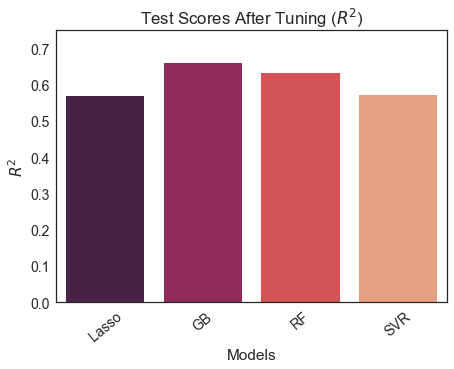

In [209]:
# Plot R2
plt.figure(figsize=(7,5))
ax=sns.barplot(x=model, y=R2_test, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.title('Test Scores After Tuning ($R^{2}$)')
plt.xlabel('Models')
plt.ylabel('$R^{2}$')
plt.ylim(0, 0.75)
plt.show()

In [210]:
R2_test

[0.5686107586497983,
 0.6586583420579306,
 0.6328404111576549,
 0.5710599149965822]

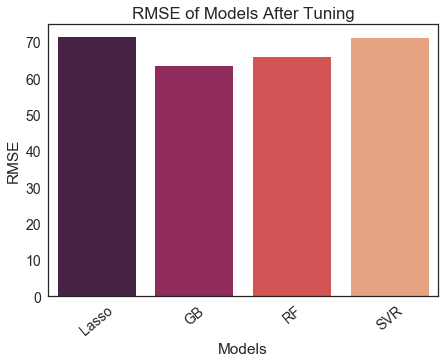

In [211]:
# Plot RMSE
plt.figure(figsize=(7,5))
ax=sns.barplot(x=model, y=RMSE_test, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="center")
plt.title('RMSE of Models After Tuning')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

In [212]:
RMSE_test

[71.30510428864241, 63.42794067183991, 65.78295858087621, 71.1024034464477]

Based on the above plots of $R^{2}$ and RMSE among all the tuned models, the best performing model is the Gradient Boosting Regressor as it achieved the highest coefficient of determination ($R^{2}$) and the smallest RMSE. 

Hence, the models were ranked based on their test $R^{2}$ score and RMSE in descending order:
- Gradient Boosting - BEST
- Random Forest
- SVR
- Lasso Linear Regression

#### Explain how the chosen algorithm applies to the data
Gradient Boosting first creates a decision tree that is shallow to model the provided data. Depending on the decision tree's performance, another tree is made to improve some of the areas that were missed from the previous iteration. The new model (i.e. tree) is made in a sequential pattern by using the gradient of MSE to change the model's structure (coefficients in the form of linear regression, node splits for decision trees). By trying to minimize the objective function (typically MSE or LS (least squares) in the case of sklearn's Gradient Boosting), the new model will converge to an optimal model capable of representing the data set. 

For this data set, a tree was first created and was assigned equal weights to each of the features in the data set (i.e. no preference for which node is which feature - can use decision tree feature importance but it is not necessary). If there were any prediction error created by the first tree, more emphasis is placed to observations with residuals/prediction errors, which will be applied to the new iteration of the model in the form of the negative gradient. The negative gradient of the loss function, associated with the whole ensemble, will be used to converge to an optimal model (tree) that best represents the data.  

# 6.0 Testing & Discussion

In this section, we will be using the optimal Gradient Boosting Regressor model to compare its performance on the training and test sets. We will also briefly discuss whether the optimal model is overfitting or underfitting. Methods to potentially increase the accuracy of the test and training sets are also shown.

In [213]:
# print optimal GB
optimal_GB

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [214]:
# Use model Test Set
predictions_GB_tuned_test = optimal_GB.predict(Salaries_X_test)
R2_GB_test = r2_score(Salaries_Y_test, predictions_GB_tuned_test)
MSE_GB_test = mean_squared_error(Salaries_Y_test, predictions_GB_tuned_test)
RMSE_GB_test = np.sqrt(MSE_GB_test)

In [215]:
print('Coefficient of Determination from Test Set: ')
print(R2_GB_test)
print('MSE from Test Set: ')
print(MSE_GB_test)
print('RMSE from Test Set: ')
print(RMSE_GB_test)

Coefficient of Determination from Test Set: 
0.6586583420579306
MSE from Test Set: 
4023.103657870444
RMSE from Test Set: 
63.42794067183991


In [216]:
# Use model on Training Set
predictions_GB_tuned_train = optimal_GB.predict(Salaries_X_train)
R2_GB_train = r2_score(Salaries_Y_train, predictions_GB_tuned_train)
MSE_GB_train = mean_squared_error(Salaries_Y_train, predictions_GB_tuned_train)
RMSE_GB_train = np.sqrt(MSE_GB_train)

In [217]:
print('Coefficient of Determination from Training Set: ')
print(R2_GB_train)
print('MSE from Training Set: ')
print(MSE_GB_train)
print('RMSE from Training Set: ')
print(RMSE_GB_train)

Coefficient of Determination from Training Set: 
0.7548005891920464
MSE from Training Set: 
2960.5225209193463
RMSE from Training Set: 
54.41068388578981


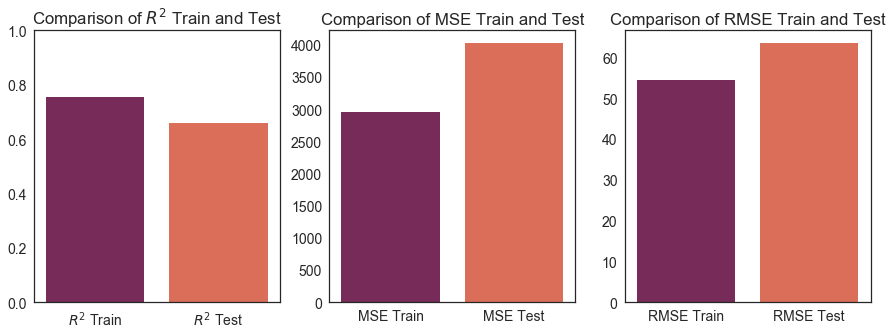

In [218]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,3,1)
sns.barplot(['$R^{2}$ Train', '$R^{2}$ Test'], [R2_GB_train, R2_GB_test], palette = "rocket")
# plt.bar(['$R^{2}$ Train', '$R^{2}$ Test'], [R2_GB_train, R2_GB_test], color=['green', 'red'])
plt.ylim([0, 1])
plt.title('Comparison of $R^{2}$ Train and Test')

fig.add_subplot(1,3,2)
sns.barplot(['MSE Train', 'MSE Test'], [MSE_GB_train, MSE_GB_test], palette = "rocket")
# plt.bar(['MSE Train', 'MSE Test'], [MSE_GB_train, MSE_GB_test], color=['green', 'red'])
plt.title('Comparison of MSE Train and Test')

fig.add_subplot(1,3,3)
sns.barplot(['RMSE Train', 'RMSE Test'], [RMSE_GB_train, RMSE_GB_test], palette = "rocket")
# plt.bar(['RMSE Train', 'RMSE Test'], [RMSE_GB_train, RMSE_GB_test], color=['green', 'red'])
plt.title('Comparison of RMSE Train and Test')
plt.show()


#### How does the model perform on the test set vs the training set? 
From the graphs above, we can see that the model performs better on the training set than on the test set, which is expected as the models were trained on the training set. The model is slightly overfitting as indicated by the decrease in performance in $R^{2}$ and the increase in both MSE and RMSE when comparing the training to the test set. If the model was overfitting, there would be a decrease in performance when the model is applied to the test set. However, this was not the case as it only slightly decreased. 

A visual plot comparing the predictions of the optimal model for both the training and test set relative to the actual salaries for the training and test sets are shown below. 

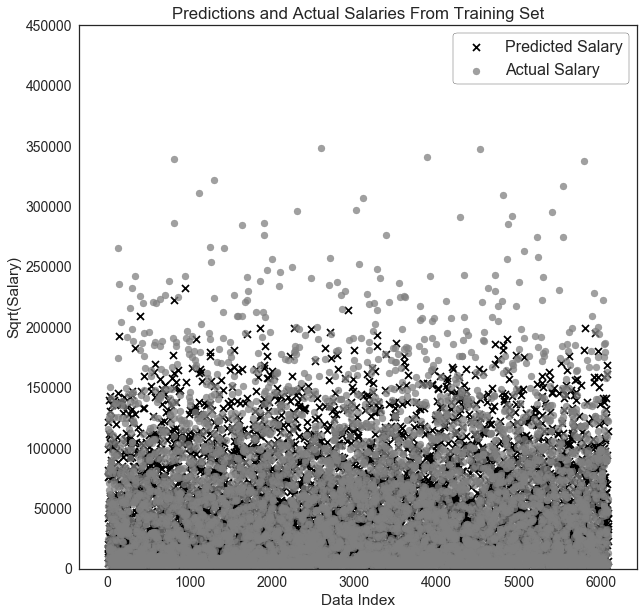

In [219]:
# Plot prediction vs actual y values from the training set after inverse sqrt transformation

# Revert data back to salaries by performing inverse transform
predictions_GB_tuned_train_inv_sqrt = np.square(predictions_GB_tuned_train)
Salaries_Y_train_inv_sqrt = np.square(Salaries_Y_train)

x_plot_train = np.arange(len(predictions_GB_tuned_train_inv_sqrt))
plt.figure(figsize=(10,10))
plt.scatter(x_plot_train, predictions_GB_tuned_train_inv_sqrt,color = 'black', marker = 'x')
plt.scatter(x_plot_train, Salaries_Y_train_inv_sqrt,color = 'grey', alpha = 0.75)
plt.title('Predictions and Actual Salaries From Training Set')
plt.legend(['Predicted Salary', 'Actual Salary'],fontsize = 16, frameon = True, framealpha = 10, edgecolor='black')
plt.ylabel('Sqrt(Salary)')
plt.xlabel('Data Index')
plt.ylim(0, 450000)
plt.show()

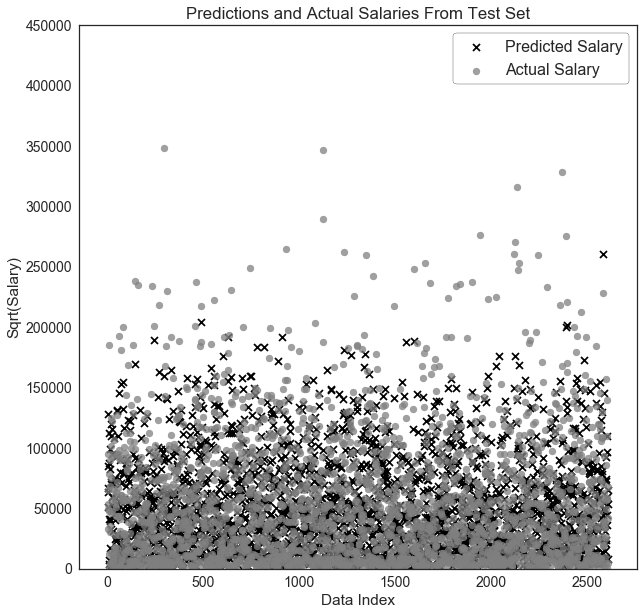

In [220]:
# Plot prediction vs actual y values from the training set after inverse sqrt transformation

# Revert data back to salaries by performing inverse transform
predictions_GB_tuned_test_inv_sqrt = np.square(predictions_GB_tuned_test)
Salaries_Y_test_inv_sqrt = np.square(Salaries_Y_test)

x_plot_test = np.arange(len(predictions_GB_tuned_test_inv_sqrt))
plt.figure(figsize=(10,10))
plt.scatter(x_plot_test, predictions_GB_tuned_test_inv_sqrt,color = 'black', marker = 'x' )
plt.scatter(x_plot_test, Salaries_Y_test_inv_sqrt,color = 'grey', alpha = 0.75)
plt.title('Predictions and Actual Salaries From Test Set')
plt.legend(['Predicted Salary', 'Actual Salary'],fontsize = 16, frameon = True, framealpha = 10, edgecolor='black')
plt.ylabel('Sqrt(Salary)')
plt.xlabel('Data Index')
plt.ylim(0, 450000)
plt.show()

#### Discussion on Overfitting and Underfitting
From the graphs comparing the predictions and actuals for both the training and test set respectively, if the model were to be overfitting, the model would be able to accurately predict all of the training sets and fail to predict the test set. Similarly, if the model were to underfit, then the training and test set would yield a poor accuracy. This was not the case as shown in both the $R^{2}$, MSE, RMSE as well as the visual plots above. The accuracies of the test set were slightly smaller than that of the test set, which indicated a very small degree of overfitting. Moreover, by looking at the plots above, we can see that the model made mistakes in both the training and test set indicating a balance between bias and variance. 

Measures to avoid overfitting and underfitting were employed in the form of gridsearch. If the total error is high for the test case (which is the case for under and over fitting), the hyperparameters would be discarded and gridsearch would iteratively find the next set of hyperparameters that would yield the highest accuracy for both the test and training set. If the set of parameters were to overfit, then the parameters would perform well for the training but not for the test set. By performing this process, the model would end up with the optimal parameters balancing both bias and variance. 

#### How to increase the accuracy (testing and training)? 
There are a variety of ways to increase the accuracy of testing and training using this model. First, we can look into performing a more extensive parametric gridsearch to determine if there are more optimal hyperparameters that can be used with the model. Second, we can also look into the data again to see if there were any features that could be re-engineered to better represent the data (be it from the encoding process or even from combining new features to one new feature). Lastly, we could also look into reducing the complexity of the model by decreasing the data's dimensionality through dimensional reduction techniques such as PCA or LDA. However, performing dimensionality reduction may lose some representation of the data in the form of explained variance. Hence, a trade-off study should be made between reducing the dimensions of the data in order to ease the complexity of the model. A less complex model, with a fewer and better features, along with an extensive parameter gridsearch would yield the optimal model for this or any data.  

## 6.1 Conclusion and Summary
Four different types of regressors were implemented in this assignment. Among the four, models that yielded high accuracies for both the test and training scores were the Gradient Boosting Regressor and the Random Forest Regressor. The performance of the other two models (SVR and Lasso Linear Regression) were not far off from the best performing models. 

After hyperparameter tuning using GridSearchCV, the Gradient Boosting Regresspr was selected as it yielded the best R2 score for the training and test cases as well as yielded the lowest MSE and RMSE among all the models optimized. The validation accuracy of Gradient Boosting Regressor on the training set was 0.75, and achieved an accuracy of 0.66 on the test set. The difference between both accuracy values is approximately 9%. Delving deeper into the performance of the model for both training and test set, it was apparent that the model was slightly overr fitting as shown in the graphs comparing its respective score and predictions for both the test and training cases. Moreover, the model is also fairly good in terms of its bias-variance trade off as shown in a previous section of this notebook. The hyperparameters used in the optimal model were situated in a low bias and low variance region of the plot, which indicates an ideal model that is capable for good prediction and also flexible in the face of new and unseen data sets. 